#Code for Generating an Electronically-Balanced Phosphine Database  

Additionally, this Jupyter notebook  contains code to run UMAP and PCA analysis on the chemical space in Kraken and our DFT-calculated SMILES strings.


##Setup

In [ ]:
!pip install rdkit-pypi --quiet
!pip install lightgbm==3.3.5
!pip install umap-learn
import sys
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=b435cfe19bde710a8f338c196b33500c34c266ebcc3ec4d0b87ad1d905e5a15c
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=ad2b63b41cf6ff08fa217fafe2e2028c67f8ec94cababd7831449b9601b876f6
  Stored in d

In [ ]:
#Take a smileString,
#Extract the needed features using morded,
#Run through features through our ML model to predict a Tolman's parameter
#Return this predicted Tolman's parameter as a print statement to app.js
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

modelPath= "LGBMReg_model.pkl"
#Load the model (takes a second)

model = pickle.load(open(modelPath, "rb"))


# In the list add the names of the descriptors required
listOfRdKITDescriptors = [
    'EState_VSA9',
    'BCUT2D_CHGLO',
    'VSA_EState1',
    'Ipc',
    'BCUT2D_MRHI',
    'SlogP_VSA12',
    'EState_VSA1',
    'VSA_EState3',
    'VSA_EState10',
    'fr_halogen',
    'EState_VSA10',
    'BCUT2D_LOGPHI',
    'VSA_EState8',
    'BCUT2D_CHGHI',
    'MolMR',
    'MaxPartialCharge',
    'Kappa1',
    'NumRotatableBonds',
    'SlogP_VSA6'
]

calculator = MolecularDescriptorCalculator(listOfRdKITDescriptors)


def findParameters(row):
  smileString =row["SMILES"]
  try:
    mol = Chem.MolFromSmiles(smileString)
    mol = Chem.AddHs(mol)
    descrip = list(calculator.CalcDescriptors(mol))
    return descrip
  except:
    print(smileString)
    return np.nan

In [ ]:
model = pickle.load(open(modelPath, "rb"))

def findTEP(row):
  smileString =row["SMILES"]

  descrip = list(row[listOfRdKITDescriptors])
  #Run these features (descript) through our model to predict our Tolman's parameter.
  output = model.predict([descrip])

  return output[0]


In [ ]:
def makeCanonical(row):
  smile= row["SMILES"]

  try:
    return Chem.MolToSmiles(Chem.MolFromSmiles(smile))
  except:
    return np.nan

##Run with Kraken SMILES

In [ ]:
df = pd.read_csv("SMILES.csv")
#sample_df = df.sample(n = 3000)


In [ ]:
df["value"] = df.apply(findParameters,axis=1)

[03:33:24] Explicit valence for atom # 7 B, 6, is greater than permitted


C1CCC(CC1)P([B]1234[BH]567[BH]891[BH]1%102[BH]2%114[BH]435[CH]357[BH]768[CH]691[BH]1%102[BH]%1143[BH]5761)C1CCCCC1


[03:57:25] Explicit valence for atom # 7 C, 6, is greater than permitted


c1ccc(cc1)P([C]1234[BH]567[BH]891[BH]1%103[BH]3%112[BH]245[BH]456[CH]678[BH]791[BH]1%10%11[BH]324[BH]5671)c1ccccc1


[04:02:16] Explicit valence for atom # 7 B, 6, is greater than permitted


c1ccc(cc1)P([B]1234[BH]567[BH]891[BH]1%102[BH]2%114[BH]435[CH]357[BH]768[CH]691[BH]1%102[BH]%1143[BH]5761)c1ccccc1


[04:20:48] Explicit valence for atom # 7 C, 6, is greater than permitted


c1ccc(cc1)P([C]1234[CH]567[BH]893[BH]3%102[BH]2%111[BH]145[BH]456[BH]678[BH]79%10[BH]83%11[BH]214[BH]5678)c1ccccc1
BrCCCCCCCP(CCc1ccccc1)CCc1ccccc1
Cc1cc(C)c(C(c2cc(C)cc(C)c2P(c2ccc(/C=N/N(C)C)s2)c2c(C)cc(C)cc2C(c2c(C)cc(C)cc2C)c2c(C)cc(C)cc2C)c2c(C)cc(C)cc2C)c(C)c1


In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = df['value'].apply(pd.Series)
updated_df = pd.concat([df["SMILES"],split],axis=1).dropna()
updated_df.head()

SMILES  EState_VSA9  \
0   Cc1cn(P(c2ccccc2C(C)C)n2cc(C)c3ccccc32)c2ccccc12    34.268964   
1                CC(=O)P(C(C)=O)c1ccc([Si](C)(C)C)s1    23.302895   
2                   C#CP(CNc1ccc(C)cc1)CNc1ccc(C)cc1    28.868097   
3  CCC(=C(c1ccccc1)c1ccccc1)P(C(C)=C(c1ccccc1OC)c...    54.587174   
4  CCCCc1ccc(P(c2cc(-c3cccs3)sc2-c2cccs2)c2cc(-c3...    28.785930   

   BCUT2D_CHGLO  VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  \
0     -2.546897   231.601406  3.847120e+11  1.629791e+00     8.223040   
1     -2.596574   127.642335  1.943328e+06  5.343396e-17    19.258374   
2     -2.532959   167.522813  2.096750e+08  5.782606e-16     7.921588   
3     -2.517499   465.573633  6.765496e+29  1.815547e+00     7.921588   
4     -2.593273   233.949116  1.768151e+14  3.002086e+00    75.942303   

   EState_VSA1  VSA_EState3  VSA_EState10  fr_halogen  EState_VSA10  \
0   170.180126    -3.097901      0.000000         0.0      2.741517   
1    81.376905     0.000000     -0.135460         0.0      9.589074   
2   104.942294    -0.600136      0.000000         0.0      0.000000   
3   309.145534    -8.000486      0.000000         0.0     31.527447   
4   150.778566    -3.137330      3.729921         0.0      8.224551   

   BCUT2D_LOGPHI  VSA_EState8  BCUT2D_CHGHI     MolMR  MaxPartialCharge  \
0   1.163015e-16   -15.022169  1.894345e-16  131.2310          0.137498   
1  -3.623847e-17   -18.146760 -1.821369e-47   75.2150          0.163722   
2   3.198351e-17    -6.247708  9.267487e-18   95.0904          0.160463   
3   1.066118e-16   -15.316165  2.202855e-17  231.4850          0.126216   
4   5.048627e-01    -3.829598  3.177278e-01  192.7660          0.073964   

      Kappa1  NumRotatableBonds  SlogP_VSA6  
0   5.499193                8.0   84.854815  
1   3.167006                9.0   12.084837  
2   3.674745                8.0   48.339350  
3  10.718812               21.0  173.045465  
4  10.781253               11.0  106.018320

In [ ]:
updated_df["TEP"] = updated_df.apply(findTEP,axis=1)


In [ ]:
updated_df.sort_values("TEP",ascending=False)

SMILES  EState_VSA9  BCUT2D_CHGLO  \
221286                                N#CP(F)C#N    10.523783     -1.659348   
211395                              N#CP(C#N)C#N    15.785675     -1.682624   
217296                                  N#CP(F)F     5.261892     -1.633992   
239842                         N#CP(C#N)C(F)(F)F    10.523783     -2.014518   
142337                             FP(F)C(F)(F)F     0.000000     -1.980708   
...                                          ...          ...           ...   
111215          C=CCCCCP([Si](C)(C)C)[Si](C)(C)C    39.751998     -2.795751   
69200   C=CCCCC(C)(C)CCP([Si](C)(C)C)[Si](C)(C)C    47.976549     -2.828023   
82799            CCCCCCP([Si](C)(C)C)[Si](C)(C)C    42.493515     -2.799258   
13593   CC(C)CC(CC(C)C)P([Si](C)(C)C)[Si](C)(C)C    49.347308     -2.846645   
205480    CC(C)C(C(C)C)P([Si](C)(C)C)[Si](C)(C)C    43.864274     -2.850688   

        VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  EState_VSA1  \
221286    11.203704  1.980027e+01  7.618451e+00     8.232296     8.232296   
211395     0.000000  3.439946e+01  7.715934e+00     7.921588     7.921588   
217296    20.935185  9.651484e+00  7.512884e+00     8.543004     8.543004   
239842    33.913642  5.941115e+01  7.678991e+00     7.921588    13.838975   
142337    52.334105  1.708617e+01  7.469274e+00     8.543004    14.460391   
...             ...           ...           ...          ...          ...   
111215   234.088295  7.017848e+07 -3.993995e-16     7.017438    99.166913   
69200    307.068902  7.544598e+09 -4.761895e-16     7.017438   124.658613   
82799    250.097719  1.259866e+08 -6.474069e-16     7.017438    99.808620   
13593    308.646443  4.220447e+09 -5.196162e-16     7.017438   118.927394   
205480   272.921622  3.754695e+08 -4.615395e-16     7.017438   106.181544   

        VSA_EState3  VSA_EState10  ...  EState_VSA10  BCUT2D_LOGPHI  \
221286    15.032150           0.0  ...      4.196906   2.314231e+00   
211395    23.579475           0.0  ...      0.000000   2.275150e+00   
217296     7.172325           0.0  ...      8.393811   2.351661e+00   
239842    15.395900           0.0  ...     13.171245   2.502989e+00   
142337     0.000000           0.0  ...     21.565056   2.549816e+00   
...             ...           ...  ...           ...            ...   
111215     0.000000           0.0  ...      0.000000  -6.278889e-16   
69200      0.000000           0.0  ...      2.741517  -4.865193e-16   
82799      0.000000           0.0  ...      0.000000  -6.196738e-16   
13593      0.000000           0.0  ...      1.370759  -4.458497e-16   
205480     0.000000           0.0  ...      1.370759  -5.229606e-16   

        VSA_EState8  BCUT2D_CHGHI    MolMR  MaxPartialCharge    Kappa1  \
221286     0.000000  1.960556e+00   19.254          0.292383  5.340000   
211395     0.000000  1.978660e+00   23.759          0.215696  5.900000   
217296     0.000000  1.937836e+00   14.749          0.370595  4.780000   
239842     0.000000  2.402962e+00   24.201          0.432074  8.200000   
142337     0.000000  2.419627e+00   15.191          0.468041  7.080000   
...             ...           ...      ...               ...       ...   
111215   -29.548771 -3.216375e-16   82.527          0.067873  1.750295   
69200    -42.149303 -4.853678e-16  100.925          0.067873  2.194486   
82799    -32.360624 -3.660402e-16   82.621          0.067873  1.666190   
13593    -50.632684 -3.760036e-16   96.310          0.068212  1.999877   
205480   -49.993865 -3.731549e-16   87.076          0.068235  1.777433   

        NumRotatableBonds  SlogP_VSA6          TEP  
221286                0.0    0.000000  2110.754565  
211395                0.0    0.000000  2110.738034  
217296                0.0    0.000000  2109.655540  
239842                0.0    0.000000  2108.780493  
142337                0.0    0.000000  2107.773005  
...                   ...         ...          ...  
111215               13.0   12.583111  2051.850025  
69

In [ ]:
updated_df.to_csv("kraken_with_tep.csv")

##UMAP, and PCA Analysis on RDKIT features

In [ ]:
updated_df = pd.read_csv("kraken_with_tep.csv")
sample_df = updated_df.sample(4000)

In [ ]:
from sklearn.decomposition import PCA

data = sample_df.dropna().drop(["SMILES","TEP"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
pca.fit(scaled_df_data)

principalComponents = pca.fit_transform(scaled_df_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, sample_df.dropna().reset_index()[['TEP']]], axis = 1)

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=data.columns.values)
abs_loadings = loadings.abs()


In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns.values)

abs_loadings_matrix = loading_matrix.abs()

In [ ]:
pc1_max_loadings = abs_loadings_matrix.sort_values(by=['PC1'], ascending=False).PC1
pc1_max_loadings

VSA_EState1          0.208220
EState_VSA1          0.195775
MolMR                0.189071
NumRotatableBonds    0.175339
VSA_EState8          0.169910
VSA_EState3          0.119030
EState_VSA9          0.110029
BCUT2D_CHGLO         0.108456
BCUT2D_MRHI          0.103760
EState_VSA10         0.103315
BCUT2D_LOGPHI        0.091428
SlogP_VSA6           0.084695
BCUT2D_CHGHI         0.084606
SlogP_VSA12          0.055826
VSA_EState10         0.052626
Kappa1               0.045126
MaxPartialCharge     0.030841
Ipc                  0.025069
fr_halogen           0.020915
Unnamed: 0           0.011749
Name: PC1, dtype: float64

In [ ]:
pc2_max_loadings = abs_loadings_matrix.sort_values(by=['PC2'], ascending=False).PC2
pc2_max_loadings

Kappa1               0.204566
BCUT2D_LOGPHI        0.187544
BCUT2D_CHGHI         0.181767
BCUT2D_MRHI          0.166480
fr_halogen           0.165299
EState_VSA10         0.151377
MaxPartialCharge     0.095515
SlogP_VSA6           0.090905
BCUT2D_CHGLO         0.087253
MolMR                0.082865
EState_VSA1          0.073966
VSA_EState1          0.064996
EState_VSA9          0.061544
VSA_EState3          0.040483
VSA_EState8          0.032564
VSA_EState10         0.025720
SlogP_VSA12          0.024024
Ipc                  0.011980
NumRotatableBonds    0.003959
Unnamed: 0           0.000993
Name: PC2, dtype: float64

Text(0.5, 1.0, 'PC1 Features')

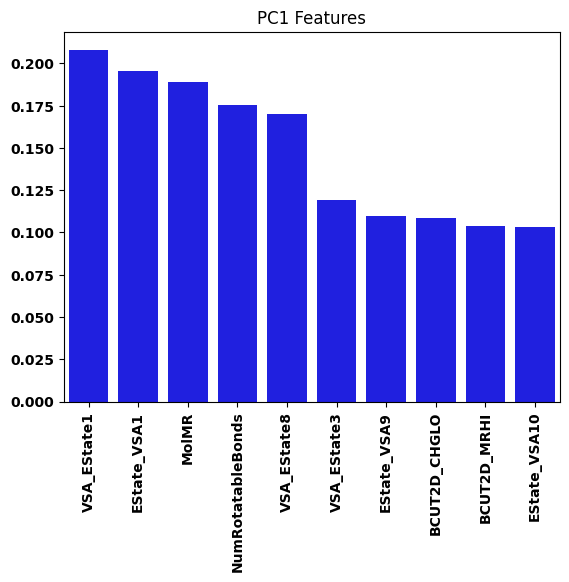

In [ ]:
head = pc1_max_loadings.head(10)
g =sns.barplot(x=head.index,y=head.values, color="b")
g.set_xticklabels(labels=head.index, rotation=90)
g.set_title("PC1 Features")

Text(0.5, 1.0, 'PC2 Features')

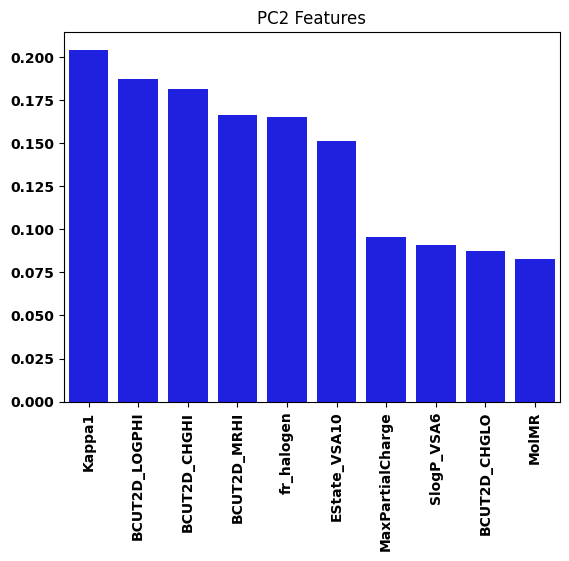

In [ ]:
head = pc2_max_loadings.head(10)
g =sns.barplot(x=head.index,y=head.values, color="b")
g.set_xticklabels(labels=head.index, rotation=90)
g.set_title("PC2 Features")

[0.2692896  0.50675074]


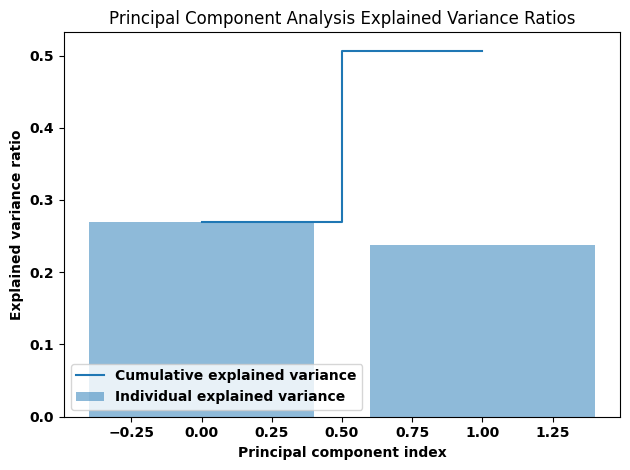

In [ ]:
import matplotlib.pyplot as plt

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print(cum_sum_eigenvalues)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Principal Component Analysis Explained Variance Ratios")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

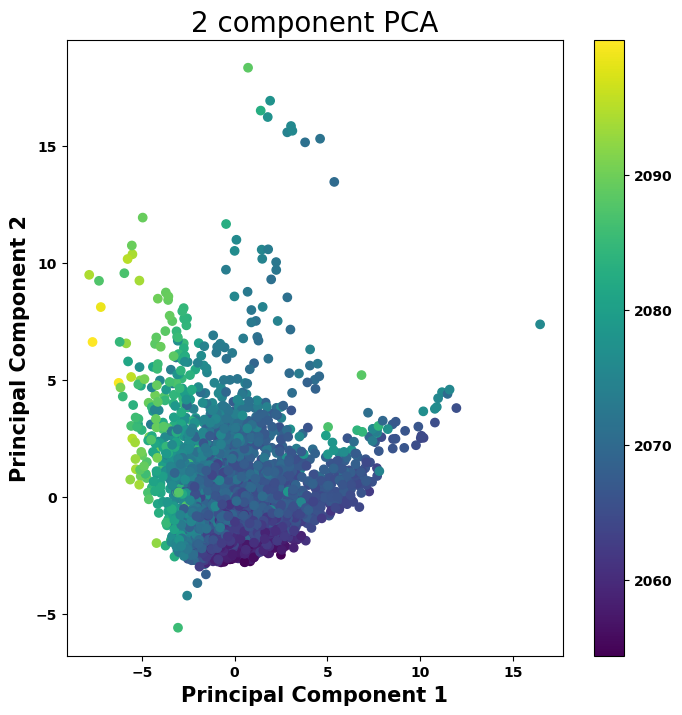

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

im = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'],c=finalDf['TEP'] )

fig.colorbar(im)
plt.savefig("PCA_kraken",dpi=500)

In [ ]:
import umap
reducer = umap.UMAP(random_state=42)


data = sample_df.dropna().drop(["SMILES"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(4000, 2)

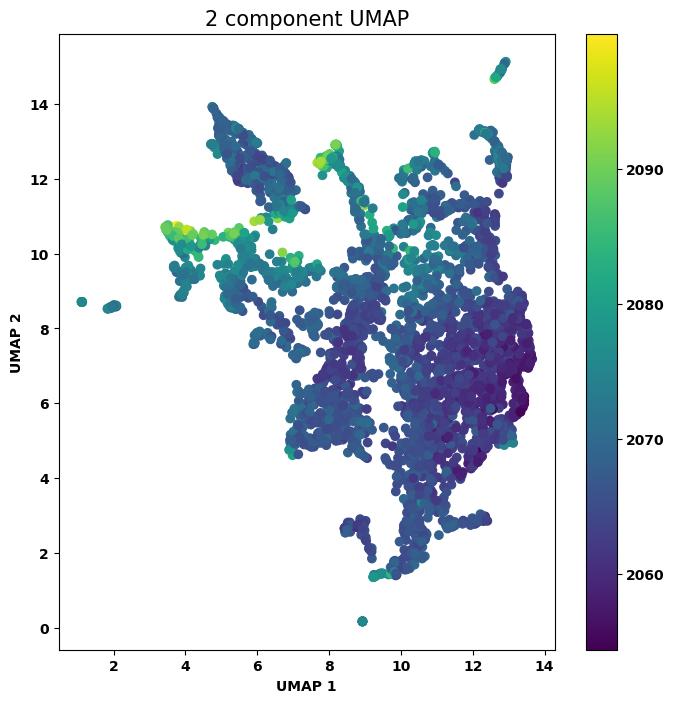

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('UMAP 1', fontsize = 10)
ax.set_ylabel('UMAP 2', fontsize = 10)
ax.set_title('2 component UMAP', fontsize = 15)


im = ax.scatter(embedding[:, 0], embedding[:, 1],
                c=finalDf['TEP'])

fig.colorbar(im)

plt.savefig("UMAP_kraken.png",dpi=500)

##UMAP Ablations

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(scaled_df_data);

    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        im= ax.scatter(u[:,0], range(len(u)), c=sampleDf['TEP'])
        fig.colorbar(im)
    if n_components == 2:
        ax = fig.add_subplot(111)
        im = ax.scatter(u[:,0], u[:,1], c=sampleDf['TEP'])
        fig.colorbar(im)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        im= ax.scatter(u[:,0], u[:,1], u[:,2], c=sampleDf['TEP'], s=100)
        fig.colorbar(im)
    ax.set_xlabel('UMAP 1', fontsize = 10)
    ax.set_ylabel('UMAP 2', fontsize = 10)
    ax.set_title(title, fontsize = 18)

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


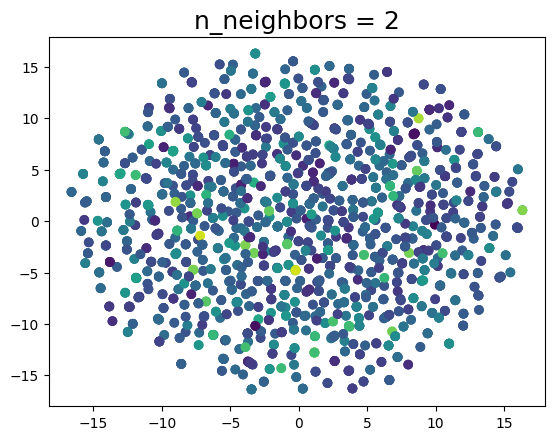

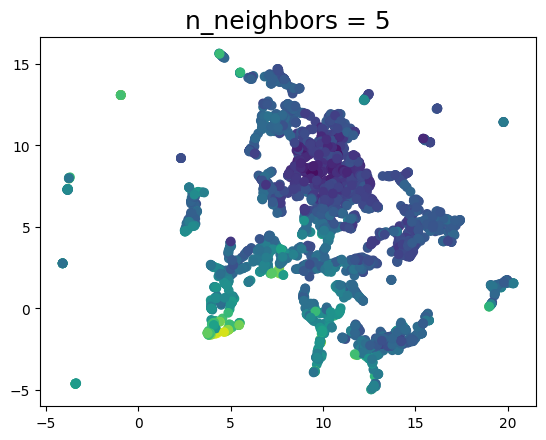

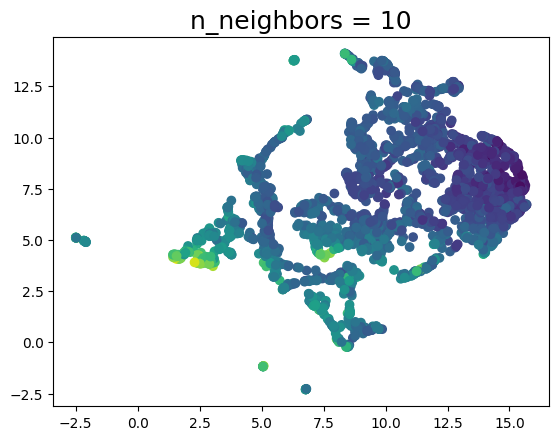

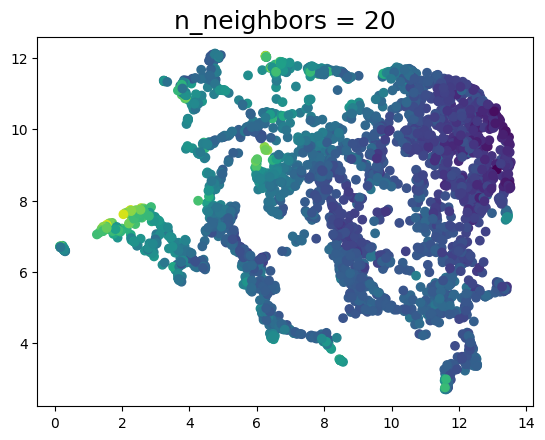

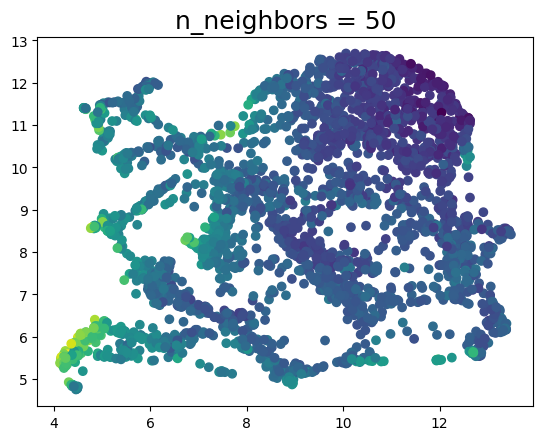

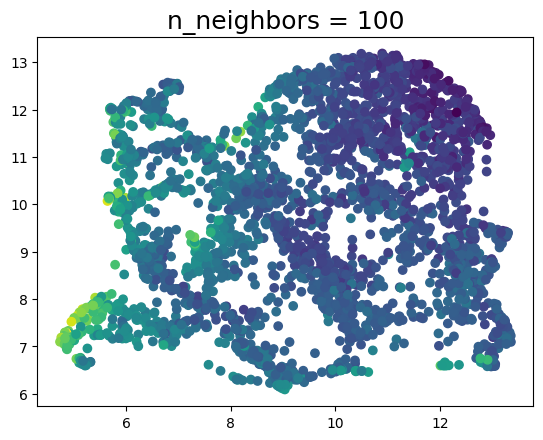

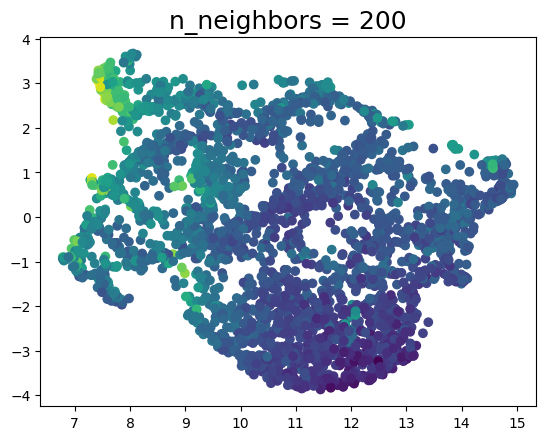

In [ ]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

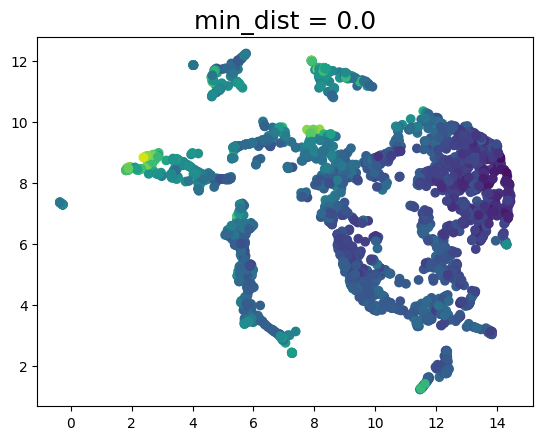

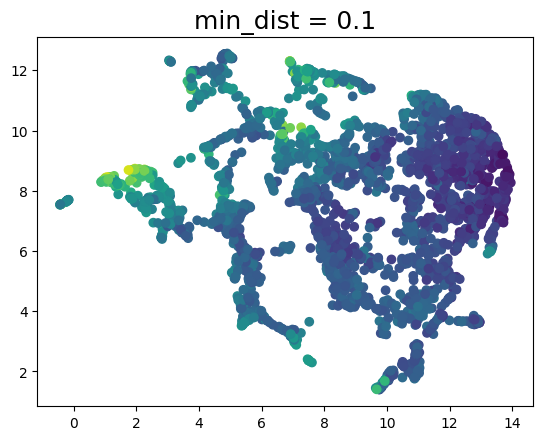

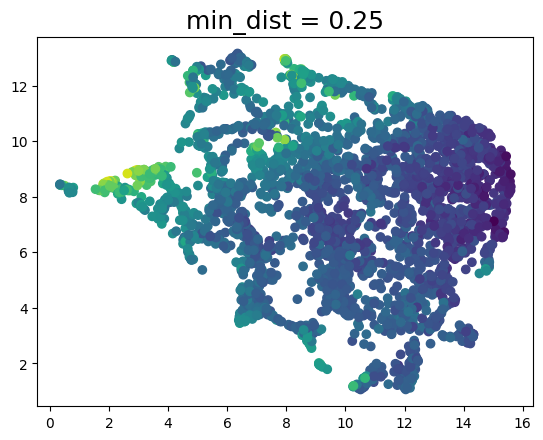

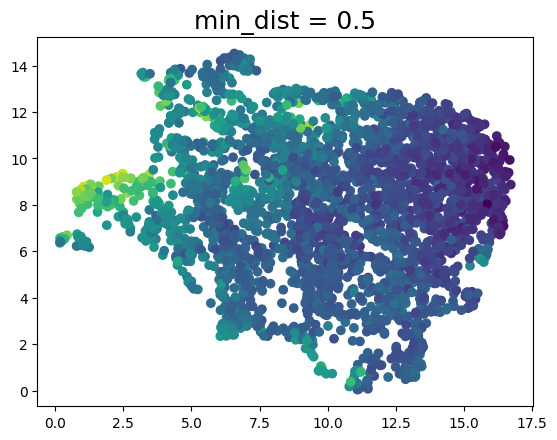

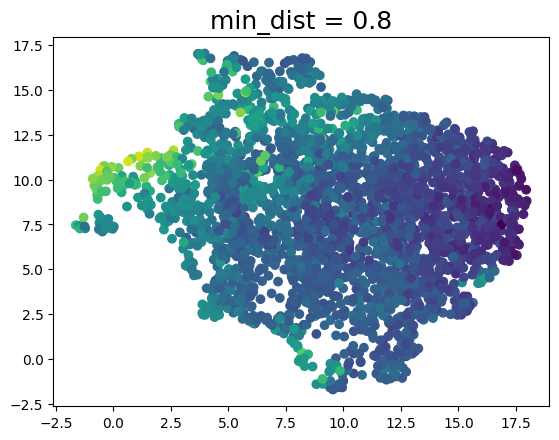

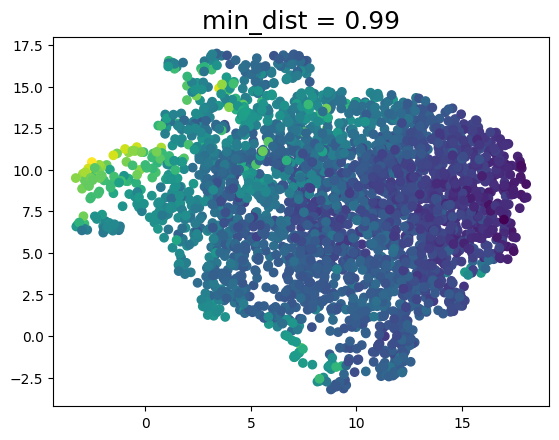

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
import numba

In [ ]:
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

In [ ]:
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))

In [ ]:
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metri

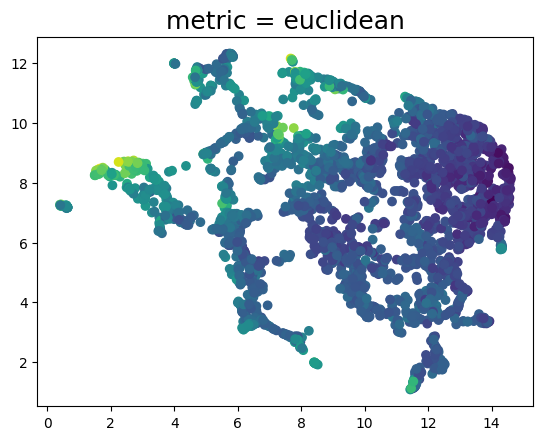

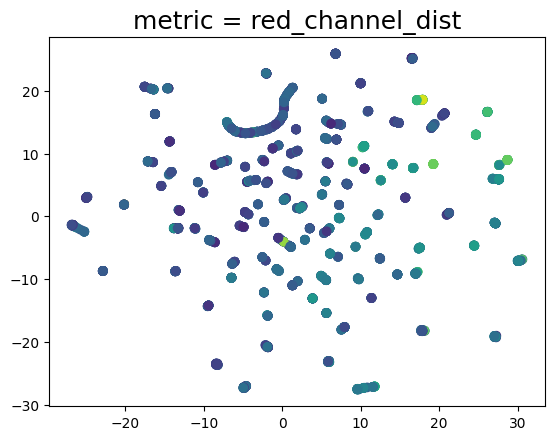

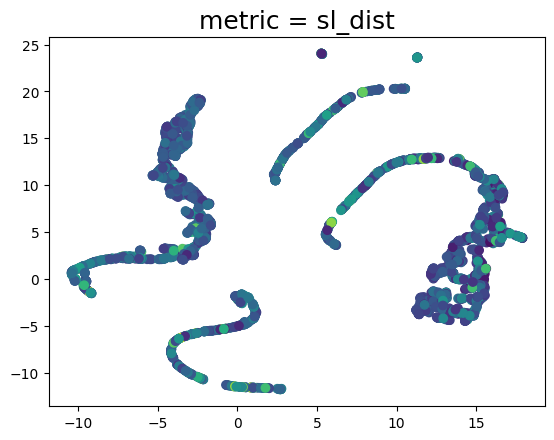

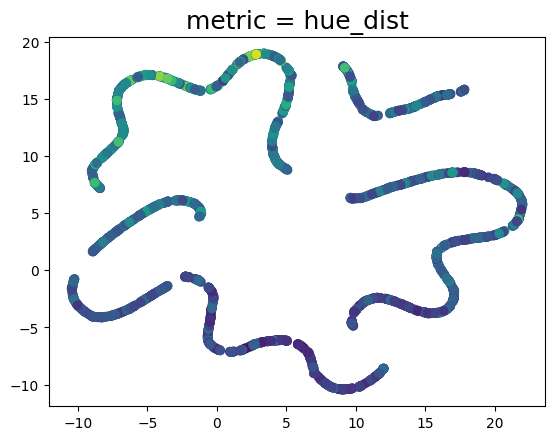

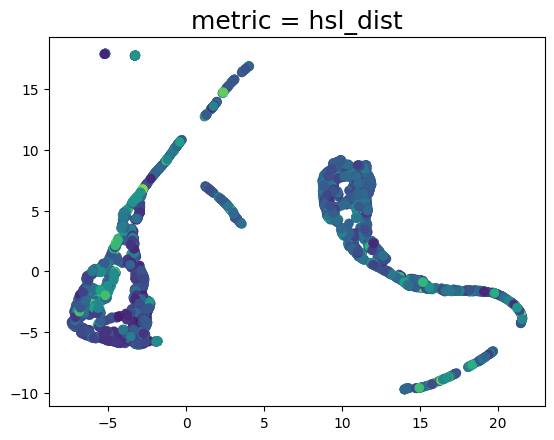

In [ ]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

##DFT Kraken data setup

In [ ]:
df = pd.read_csv("max_data.csv")

In [ ]:
sampleDf = df.sample(n=2000)
sampleDf.head()

pyr_P  pyr_alpha  qpole_amp  vbur_vbur  sterimol_L  sterimol_B1  \
26966   0.968041  19.343872  15.738175  142.56429   12.734634     5.577647   
121577  0.977543  19.861147  20.945759  135.00732   11.090556     5.155418   
283897  0.947924  20.041660  10.950793   62.97042    9.184652     4.647822   
289470  0.959563  20.179855  44.675410   81.28670   12.204982     5.925867   
215709  0.940995  21.009975   7.387661   56.53504    8.075418     4.900065   

        sterimol_B5  dipolemoment  qpoletens_xx  qpoletens_yy  ...  \
26966     11.581782      2.344703     11.795914      1.046234  ...   
121577     9.582783      5.685770     15.889732      2.049200  ...   
283897     7.829348      2.527855      6.786200      1.019001  ...   
289470    10.508198      6.387809     31.440416      9.275609  ...   
215709     7.525164      2.812543      4.208401      2.294090  ...   

        vbur_ovbur_min  vbur_ovtot_max  vbur_ovtot_min  vbur_qvbur_max  \
26966         0.127674       234.41896        1.734848       36.793247   
121577        1.321874       242.25870        1.826259       40.974594   
283897        0.290614       123.40580        0.041432       23.246695   
289470        0.612789       319.41858        0.631878       29.525352   
215709        0.207863       104.38504       -0.077992       16.171122   

        vbur_qvbur_min  vbur_qvtot_max  vbur_qvtot_min  vbur_max_delta_qvbur  \
26966        17.350725       241.45515       94.369700             23.136090   
121577       19.726177       245.20198      100.751854             24.027685   
283897       12.525132       129.60753       57.610474             10.104429   
289470       13.371525       340.60934       96.980020             16.481863   
215709       12.106277       110.55546       67.607056              2.480329   

        vbur_max_delta_qvtot  \
26966             189.237240   
121577            154.106720   
283897             72.624535   
289470            247.087980   
215709             40.381393   

                                                   SMILES  
26966   C=CCCCC(C)(C)CCP(CCC(C)(C)CCCC=C)B1Nc2cccc3ccc...  
121577  CC(C)(C)OC(=O)C(OP(OC(C(=O)OC(C)(C)C)(C(F)(F)F...  
283897          CC(C)(C)CCP(c1cc(F)cc(F)c1)c1cc(F)cc(F)c1  
289470  CCOC(=O)c1cn(P(c2ccc(OC)cc2-c2ccccc2C(F)(F)F)n...  
215709                Cc1csc(P(c2cc(C)cs2)c2cc(C)ccc2C)c1  

[5 rows x 29 columns]

In [ ]:
sampleDf["TEP"] = sampleDf.apply(findTEP,axis=1)

In [ ]:
sampleDf.head()

pyr_P  pyr_alpha  qpole_amp  vbur_vbur  sterimol_L  sterimol_B1  \
26966   0.968041  19.343872  15.738175  142.56429   12.734634     5.577647   
121577  0.977543  19.861147  20.945759  135.00732   11.090556     5.155418   
283897  0.947924  20.041660  10.950793   62.97042    9.184652     4.647822   
289470  0.959563  20.179855  44.675410   81.28670   12.204982     5.925867   
215709  0.940995  21.009975   7.387661   56.53504    8.075418     4.900065   

        sterimol_B5  dipolemoment  qpoletens_xx  qpoletens_yy  ...  \
26966     11.581782      2.344703     11.795914      1.046234  ...   
121577     9.582783      5.685770     15.889732      2.049200  ...   
283897     7.829348      2.527855      6.786200      1.019001  ...   
289470    10.508198      6.387809     31.440416      9.275609  ...   
215709     7.525164      2.812543      4.208401      2.294090  ...   

        vbur_ovtot_max  vbur_ovtot_min  vbur_qvbur_max  vbur_qvbur_min  \
26966        234.41896        1.734848       36.793247       17.350725   
121577       242.25870        1.826259       40.974594       19.726177   
283897       123.40580        0.041432       23.246695       12.525132   
289470       319.41858        0.631878       29.525352       13.371525   
215709       104.38504       -0.077992       16.171122       12.106277   

        vbur_qvtot_max  vbur_qvtot_min  vbur_max_delta_qvbur  \
26966        241.45515       94.369700             23.136090   
121577       245.20198      100.751854             24.027685   
283897       129.60753       57.610474             10.104429   
289470       340.60934       96.980020             16.481863   
215709       110.55546       67.607056              2.480329   

        vbur_max_delta_qvtot  \
26966             189.237240   
121577            154.106720   
283897             72.624535   
289470            247.087980   
215709             40.381393   

                                                   SMILES          TEP  
26966   C=CCCCC(C)(C)CCP(CCC(C)(C)CCCC=C)B1Nc2cccc3ccc...  2064.838074  
121577  CC(C)(C)OC(=O)C(OP(OC(C(=O)OC(C)(C)C)(C(F)(F)F...  2074.503374  
283897          CC(C)(C)CCP(c1cc(F)cc(F)c1)c1cc(F)cc(F)c1  2066.791185  
289470  CCOC(=O)c1cn(P(c2ccc(OC)cc2-c2ccccc2C(F)(F)F)n...  2069.295661  
215709                Cc1csc(P(c2cc(C)cs2)c2cc(C)ccc2C)c1  2070.689645  

[5 rows x 30 columns]

##Kraken DFT PCA and UMAP

In [ ]:

data = sampleDf.dropna().drop(["SMILES","TEP"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
pca.fit(scaled_df_data)

principalComponents = pca.fit_transform(scaled_df_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, sampleDf.dropna().reset_index()[['TEP']]], axis = 1)

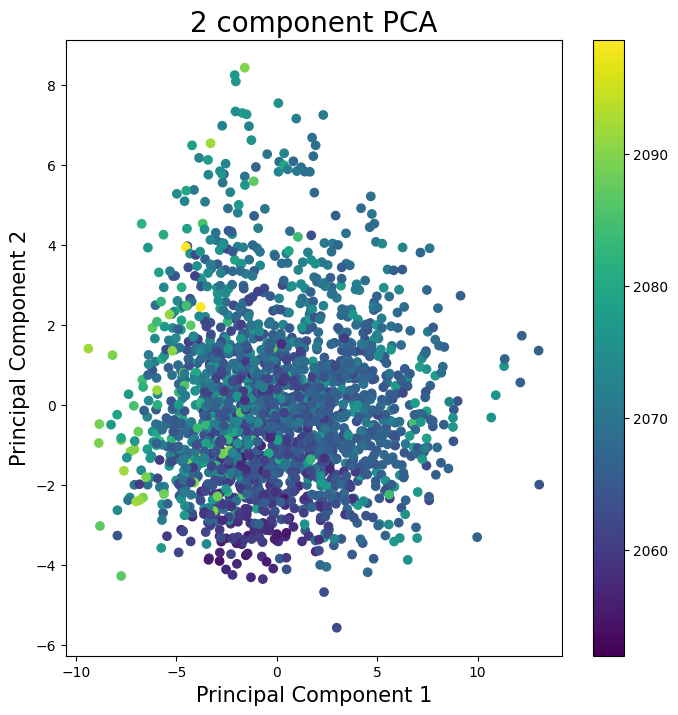

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


im = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'],c=finalDf['TEP'] )

fig.colorbar(im)

In [ ]:
import umap
reducer = umap.UMAP(random_state=42)

data = sampleDf.dropna().drop(["SMILES"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(2000, 2)

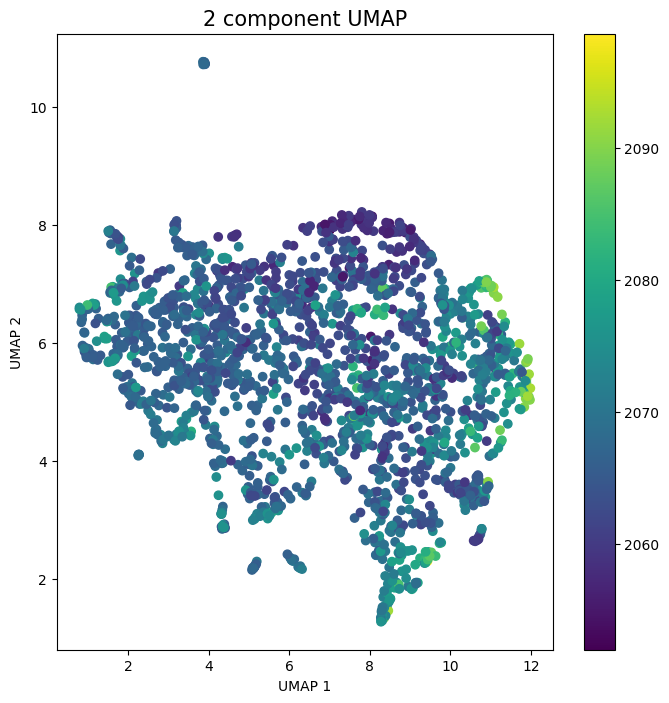

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('UMAP 1', fontsize = 10)
ax.set_ylabel('UMAP 2', fontsize = 10)
ax.set_title('2 component UMAP', fontsize = 15)


im = ax.scatter(embedding[:, 0], embedding[:, 1],
                c=finalDf['TEP'])

fig.colorbar(im)

##UMAP Ablation for DFT

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(scaled_df_data);

    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        im= ax.scatter(u[:,0], range(len(u)), c=sampleDf['TEP'])
        fig.colorbar(im)
    if n_components == 2:
        ax = fig.add_subplot(111)
        im = ax.scatter(u[:,0], u[:,1], c=sampleDf['TEP'])
        fig.colorbar(im)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        im= ax.scatter(u[:,0], u[:,1], u[:,2], c=sampleDf['TEP'], s=100)
        fig.colorbar(im)
    ax.set_xlabel('UMAP 1', fontsize = 10)
    ax.set_ylabel('UMAP 2', fontsize = 10)
    ax.set_title(title, fontsize = 18)

    #plt.title(title, fontsize=18)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[3.85932561e-15 7.09606749e-06 7.92938303e-06 1.15115230e-05]
not reaching the requested tolerance 6.809830665588379e-06.
Use iteration 1733 instead with accuracy 
5.8141363032402575e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.87039884e-15 6.38822779e-06 7.51984497e-06 9.34956823e-06]
not reaching the requested tolerance 6.809830665588379e-06.
  _, diffusion_map = lobpcg(


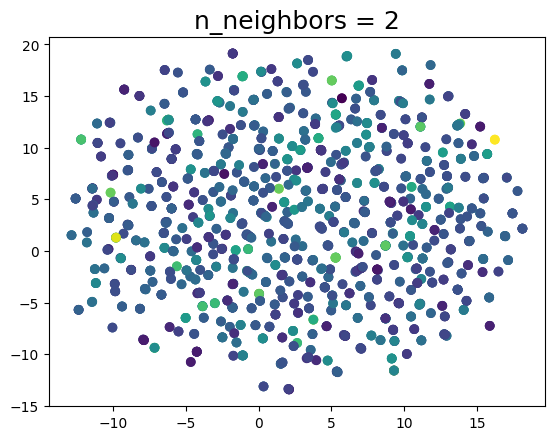

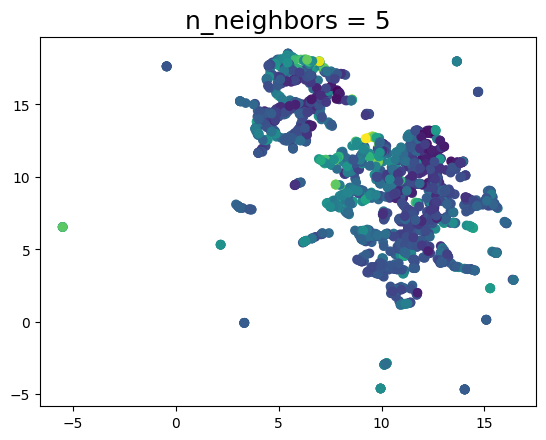

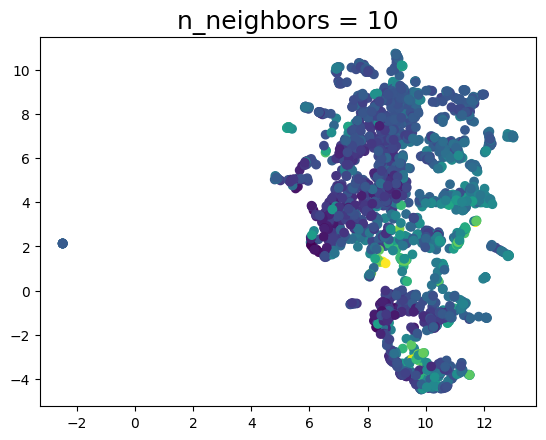

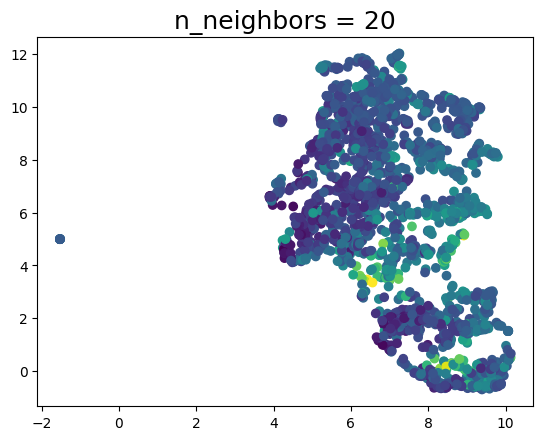

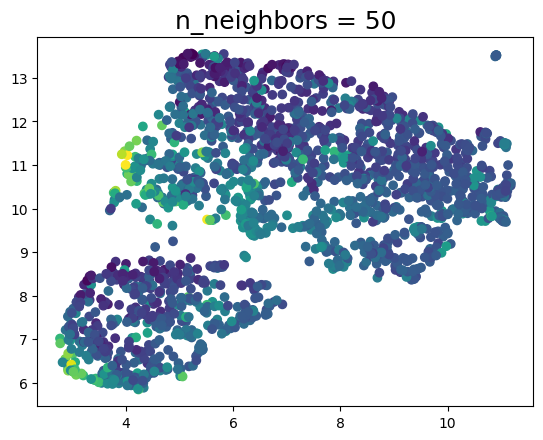

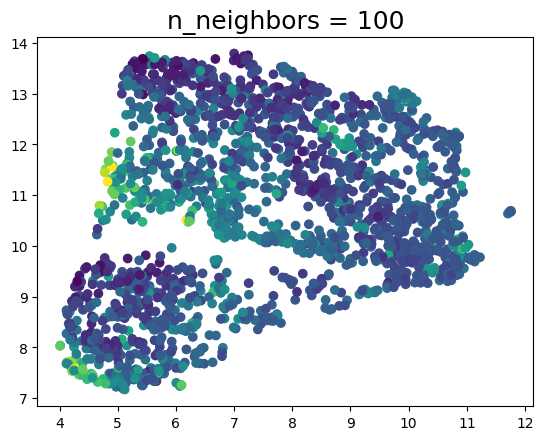

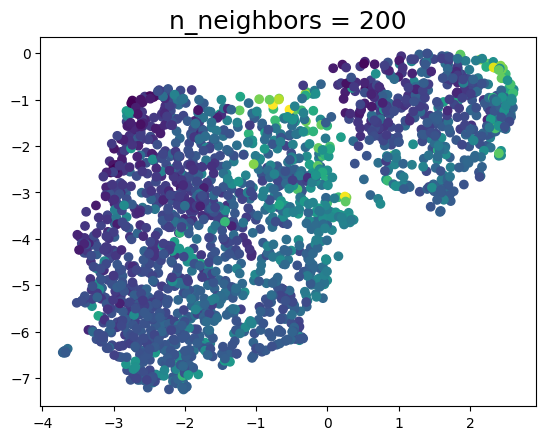

In [ ]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

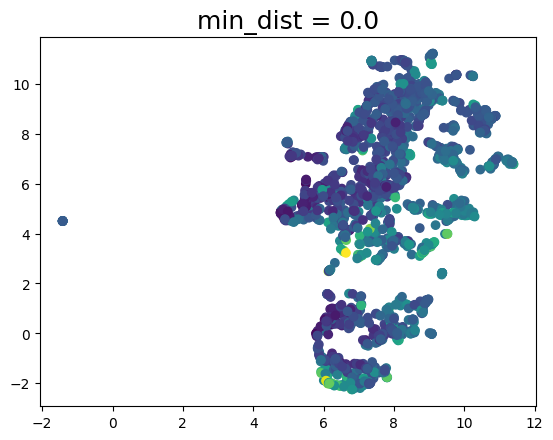

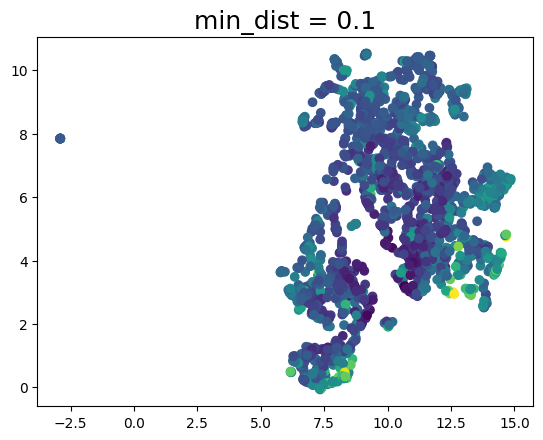

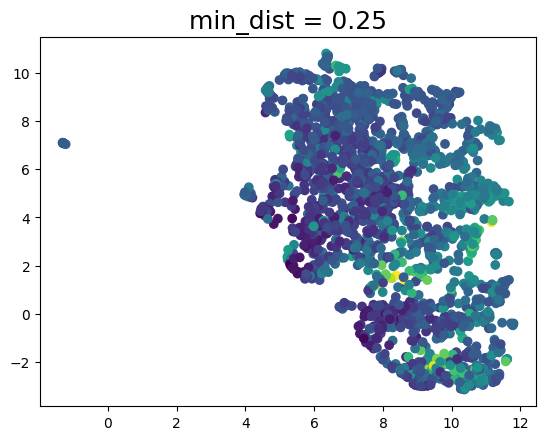

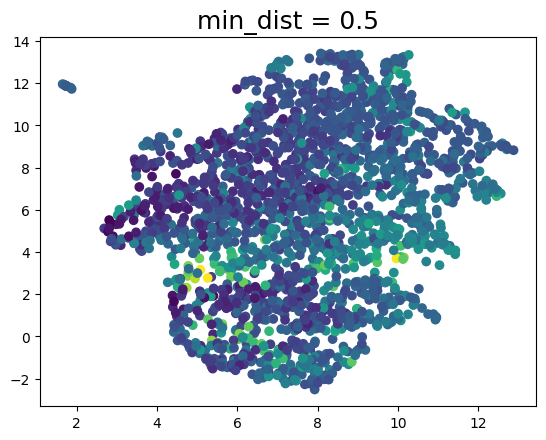

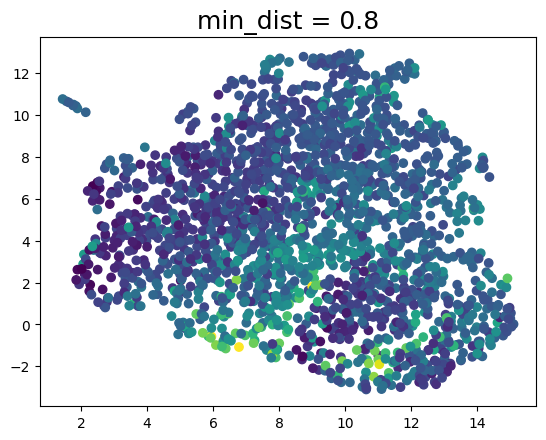

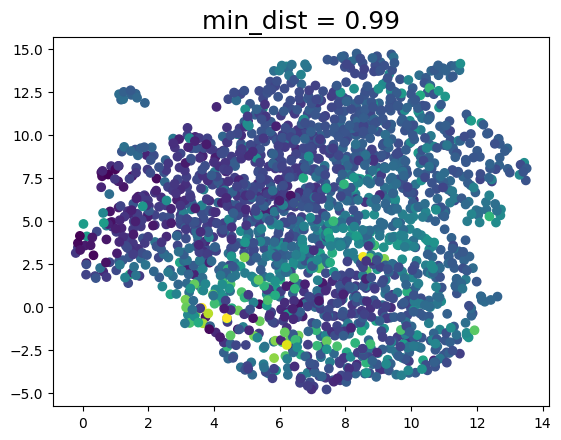

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
import numba
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1849: UserWarning: custom distance metri

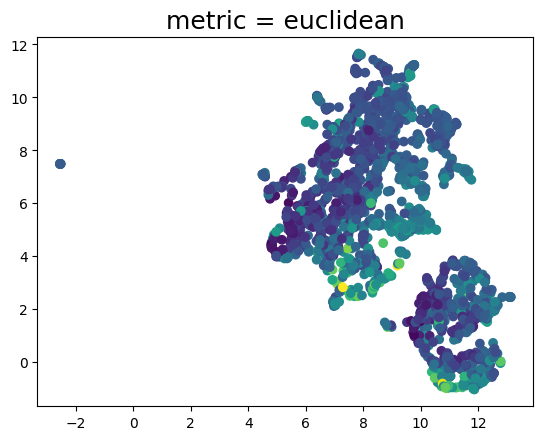

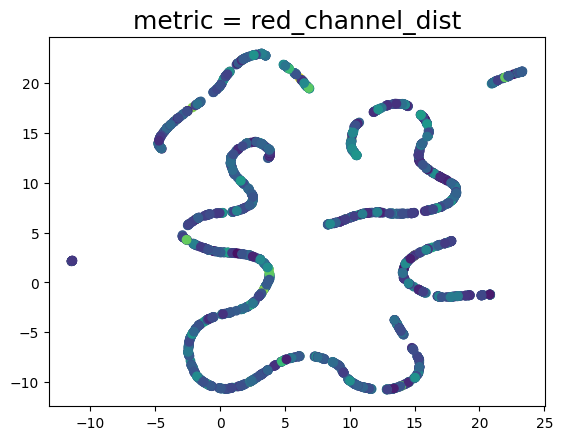

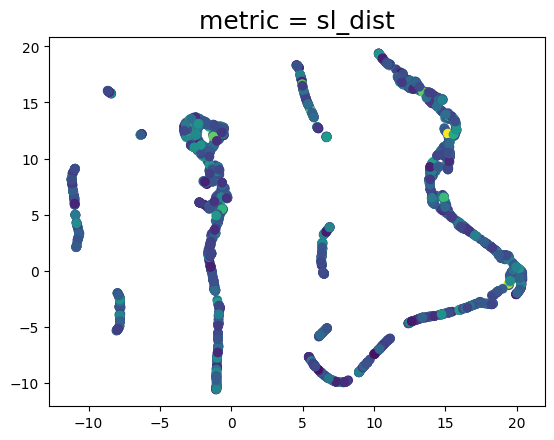

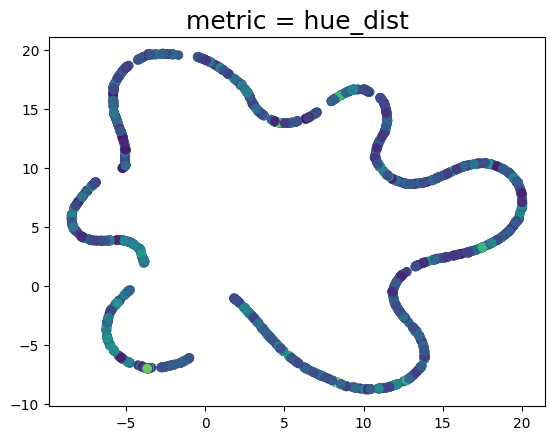

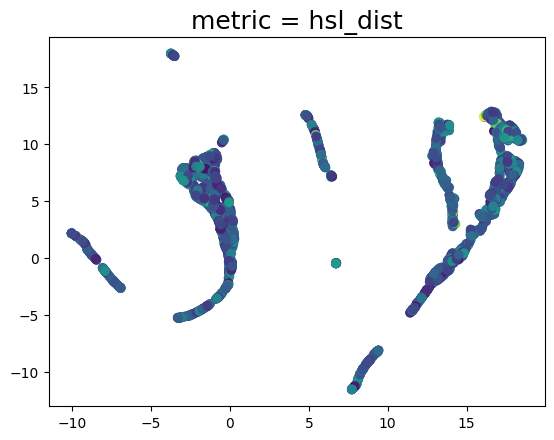

In [ ]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

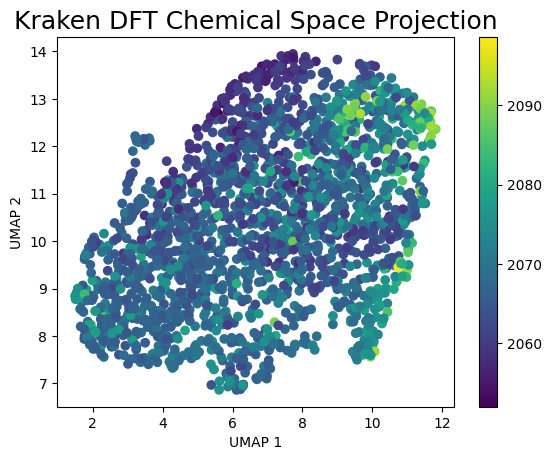

In [ ]:
#Favorite parameters:
draw_umap(n_neighbors=50, min_dist=0.3, n_components=2, metric='euclidean', title='Kraken DFT Chemical Space Projection')

## Generating new structures

In [ ]:
ligand_dict_R1 = {
    '26-F-Ph': 'C3=C(F)C=CC=C3F',
    '35-F-Ph': 'C1=CC(F)=CC(F)=C1',
    'Br': 'Br',
    'CF3': 'C(F)(F)F',
    'CH2Cl': 'C(Cl)',
    'CH2F': 'C(F)',
    'CH2OH': 'CO',
    'CHO': 'C=O',
    'Cl': 'Cl',
    'COCH3': 'C(C)=O',
    'CONH2': 'C(N)=O',
    'COOCH3': 'C(OC)=O',
    'COOH': 'C(O)=O',
    'CN': 'C#N',
    'Cy': 'C1CCCCC1',
    'Et': 'CC',
    'F': 'F',
    'H': '',
    'I': 'I',
    'iPr': 'C(C)C',
    'Me': 'C',
    'Mes': 'C1=C(C)C=C(C)C=C1(C)',
    'NCH3_2': 'N(C)C',
    'NHCH3': 'NC',
    'NH2': 'N',
    'NO2': '[N+]([O-])=O',
    'OH': 'O',
    'OMe': 'OC',
    'Ph': 'C1=CC=CC=C1',
    'SCH3': 'SC',
    'SH': 'S',
    'SiH3': '[SiH3]',
    'Allyl': 'C=C',
    'Bn': 'CC1=CC=CC=C1',
    'Propyl': 'CCC',
    'tBu': 'C(C)(C)C',
    'TMS': '[Si](C)(C)C',
}

ligand_dict_R2 = {
    '26-F-Ph': 'C3(F)=CC=CC(F)=C3',
    '35-F-Ph': 'C2=C(F)C=C(F)C=C2',
    'Br': 'Br',
    'CF3': 'FC(F)(F)',
    'CH2Cl': 'ClC',
    'CH2F': 'FC',
    'CH2OH': 'OC',
    'CHO': 'O=C',
    'Cl': 'Cl',
    'COCH3': 'O=C(C)',
    'CONH2': 'O=C(N)',
    'COOCH3': 'O=C(OC)',
    'COOH': 'O=C(O)',
    'CN': 'N#C',
    'Cy': 'C1CCCCC1',
    'Et': 'CC',
    'F': 'F',
    'H': '',
    'I': 'I',
    'iPr': 'CC(C)',
    'Me': 'C',
    'Mes': 'CC1=CC(C)=CC(C)=C1',
    'NCH3_2': 'CN(C)',
    'NHCH3': 'CN',
    'NH2': 'N',
    'NO2': '[O-][N+](=O)',
    'OH': 'O',
    'OMe': 'CO',
    'Ph': 'C1=CC=CC=C1',
    'SCH3': 'CS',
    'SH': 'S',
    'SiH3': '[SiH3]',
    'Allyl': 'C=C',
    'Bn': 'C1=CC=CC=C1C',
    'Propyl': 'CCC',
    'tBu': 'CC(C)(C)',
    'TMS': 'C[Si](C)(C)',
}


SMILES = list()

for name,val in ligand_dict_R1.items():
  for name2,val2 in ligand_dict_R2.items():
    for name3,val3 in ligand_dict_R1.items():
      smi = '[R2]P([R3])[R1]'
      smi = smi.replace('[R1]', val)
      smi = smi.replace('[R2]', val2)
      smi = smi.replace('[R3]', val3)

      SMILES.append(smi)

len(SMILES)

50653

In [ ]:
import json

f = open('json.json')

data = json.load(f)
l = []
dic = data["ml_data"]["boltzmann_averaged_data"]
dic["SMILES"] = data["smiles"]
l.append(dic)

df = pd.DataFrame(l)

df.set_index('SMILES', inplace=True)
df.to_csv("kraken_boltzmann_averaged_data.csv")

In [ ]:
import json
import re
import os
import glob
import pandas as pd

l = []

for file in glob.glob('*.json'):
    print(file)
    with open(file, 'r') as jsonFile:
        sample_load_file = json.load(jsonFile)
    dic = data["ml_data"]["boltzmann_averaged_data"]
    dic["SMILES"] = data["smiles"]
    l.append(dic)

df = pd.DataFrame(l)
df.to_csv("kraken_boltzmann_averaged_data.csv", index=False)

## Generating SMILE Strings from ReaLigands

In [ ]:
df =pd.read_csv("smiles.csv")
only_first_pos = df[df["Pos"]=="1"]
only_second_pos = df[df["Pos"]=="2"]

Unnamed: 0                        SMILES   Pos
0           0         [c]1ccccc1.[c]1ccccc1  1,12
1           1                 FC(F)C(F)(F)F     6
2           2                      [CH](C)C     1
3           3   [N]([Si](C)(C)C)[Si](C)(C)C     1
4           4  [Si]([CH][Si](C)(C)C)(C)(C)C     3

In [ ]:
allSubstituants = only_first_pos["SMILES"].tolist()

changed_allSubstituants = [smile.replace("O-","O") for smile in allSubstituants]


phosphines = list()

for sub in changed_allSubstituants:
  smi = 'P([R3])([R2])[R1]'
  smi = smi.replace('[R1]', sub)
  smi = smi.replace('[R2]', sub)
  smi = smi.replace('[R3]', sub)
  phosphines.append(smi)

test_df = pd.DataFrame({"SMILES":phosphines, "Subs":changed_allSubstituants})

test_df["Can_Smiles"] = test_df.apply(makeCanonical,axis=1)
print(len(test_df))
print(len(test_df.dropna()))
print(len(test_df.dropna().drop_duplicates(subset="Can_Smiles")))
limited_subs = test_df.dropna().drop_duplicates("Can_Smiles")["Subs"]


new_phosphines = []
for sub in limited_subs:
  for sub1 in limited_subs:
    smi = 'P([R3])([R2])[R1]'
    smi = smi.replace('[R1]', sub)
    smi = smi.replace('[R2]', sub1)
    smi = smi.replace('[R3]', sub)
    new_phosphines.append(smi)


227
227
206


NameError: ignored

In [ ]:
test_df.dropna().drop_duplicates(subset="Can_Smiles").to_csv("limited_subs.csv")

In [ ]:
new_phosphines_df = pd.DataFrame({"SMILES":new_phosphines})
sample_df = new_phosphines_df.sample(10000)
sample_df.head()

SMILES
2606   P([c]1c(F)cccc1F)([c]1c(cccc1c1c(cccc1C(C)C)C(...
27515  P([CH2]C1=CC(=O)OC(C)(C)O1)([C](=C)c1ccccc1)[C...
28983            P([CH2]O)([c]1c2ccccc2cc2ccccc12)[CH2]O
730    P([C](c1ccccc1)(c1ccccc1)c1ccccc1)([c]1ccccc1C...
15427        P([O]c1c(F)cccc1F)([CH2][O])[O]c1c(F)cccc1F

In [ ]:
new_phosphines_df["value"] = new_phosphines_df.apply(findParameters,axis=1)
len(new_phosphines_df)

42436

In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = new_phosphines_df['value'].apply(pd.Series)
updated_df = pd.concat([new_phosphines_df[["SMILES"]],split],axis=1).dropna()
updated_df.head()

SMILES  EState_VSA9  \
0                      P([CH](C)C)([CH](C)C)[CH](C)C    28.785930   
1   P([CH](C)C)([N]([Si](C)(C)C)[Si](C)(C)C)[CH](C)C    43.864274   
2                    P([CH](C)C)([C](C)(C)C)[CH](C)C    31.527447   
3  P([CH](C)C)([C](c1ccccc1)(c1ccccc1)c1ccccc1)[C...    37.010481   
4                    P([CH](C)C)([c]1ccccc1)[CH](C)C    26.044413   

   BCUT2D_CHGLO  VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  \
0     -2.755960   160.737809  3.361552e+05 -5.615461e-16     7.921588   
1     -2.824138   260.583160  2.567290e+08 -6.270593e-16     8.072314   
2     -2.789779   178.773122  1.025825e+06 -3.397001e-16     7.921588   
3     -2.727289   250.490945  6.093917e+10  4.088179e-17     7.921588   
4     -2.678827   148.710009  1.247309e+06 -6.569175e-16     7.921588   

   EState_VSA1  VSA_EState3  VSA_EState10  fr_halogen  EState_VSA10  \
0    65.938079     0.000000           0.0         0.0      0.000000   
1   106.073453     0.000000           0.0         0.0      0.000000   
2    72.311004    -4.724769           0.0         0.0      0.000000   
3   159.081963    -4.390046           0.0         0.0      2.741517   
4    82.115882    -1.295833           0.0         0.0      0.000000   

   BCUT2D_LOGPHI  VSA_EState8  BCUT2D_CHGHI    MolMR  MaxPartialCharge  \
0  -2.807400e-16   -25.276466 -2.388258e-02   52.328          0.034629   
1  -4.563837e-16   -48.860969 -3.343302e-16   85.723          0.115542   
2  -4.585255e-16   -30.998585 -3.267908e-16   56.945          0.034638   
3  -4.781627e-17   -18.309502 -4.508337e-16  116.400          0.065271   
4  -4.188032e-16   -15.795037 -4.886113e-16   63.268          0.062945   

     Kappa1  NumRotatableBonds  SlogP_VSA6  
0  1.001622                9.0    0.000000  
1  1.841855               15.0    0.000000  
2  1.112608                6.0    0.000000  
3  4.231936               10.0   90.636281  
4  1.713937                7.0   30.212094

In [ ]:
updated_df["TEP"] = updated_df.apply(findTEP,axis=1)

In [ ]:
updated_df.to_csv("removed_dups_db_TEP.csv")

42025


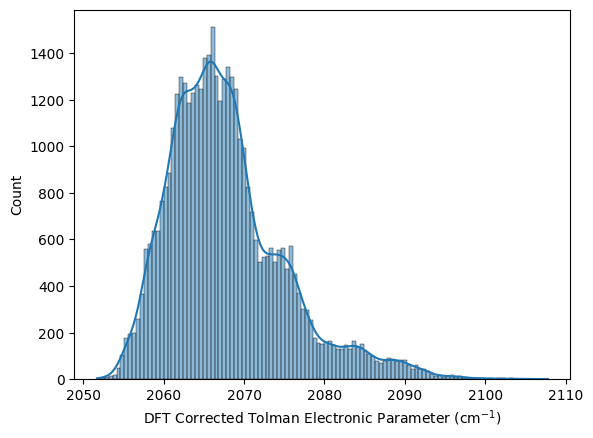

Mean ± std. dev. = 2067.7800116453013 ± 7.267178154664585
Number of structures: 42025


In [ ]:
print(len(updated_df))
y_pred = updated_df["TEP"]
sns.histplot(data = y_pred, kde = True)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.show()

print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

In [ ]:
from sklearn.decomposition import PCA

data = updated_df.dropna().drop(["SMILES","TEP"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
pca.fit(scaled_df_data)

principalComponents = pca.fit_transform(scaled_df_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, updated_df.dropna().reset_index()[['TEP']]], axis = 1)

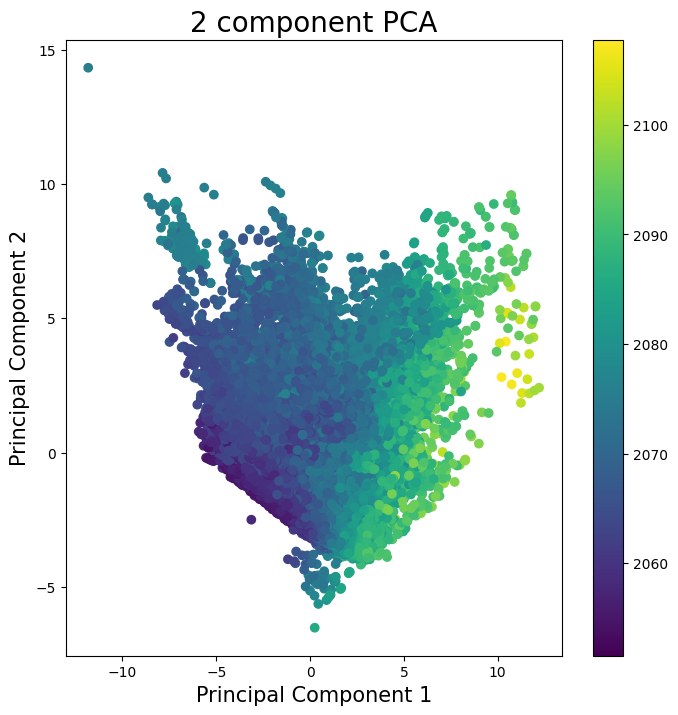

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


im = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'],c=finalDf['TEP'] )

fig.colorbar(im)

## Generating "Bidentate" phosphine structures  
Bidentate is a misnomer, we mean RR'P, or structures with an R group that binds twice to the Phosphorus.

In [ ]:
single_attachment =pd.read_csv("limited_subs.csv")["Subs"].tolist()
bidentate = pd.read_csv("bidentate_smiles_names.csv")["SMILES"].tolist()

In [ ]:
import re
bidentate_phosphines = []
for sub in bidentate:
  for sub1 in single_attachment:
    changedSub = sub.replace("[P]","[P]%90")
    changedSub = sub.replace("[p]","[P]%90")
    if sub1.startswith("["):
      changedSub1 = sub1.replace("]","]%90",1)
    else:
      changedSub1 = re.sub(r'(^\w)', r'\1%90', sub1)
    bidentate_phosphines.append(f"{changedSub1}.{changedSub}")

len(bidentate_phosphines)

41406

In [ ]:
bidentate_phosphines_df = pd.DataFrame({"SMILES":bidentate_phosphines})

In [ ]:
bidentate_phosphines_df["value"] = bidentate_phosphines_df.apply(findParameters,axis=1)
len(bidentate_phosphines_df)

[22:08:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N=C(C)O[C@H]1c1ccccc1
[22:08:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N=C(C)O[C@H]1c1ccccc1' for input: 'C%90l.[P]%901N=C(C)O[C@H]1c1ccccc1'


C%90l.[P]%901N=C(C)O[C@H]1c1ccccc1


[22:08:36] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N=C(C)O[C@H]1c1ccccc1
[22:08:36] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N=C(C)O[C@H]1c1ccccc1' for input: 'B%90r.[P]%901N=C(C)O[C@H]1c1ccccc1'


B%90r.[P]%901N=C(C)O[C@H]1c1ccccc1


[22:08:40] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC
[22:08:40] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC


[22:08:41] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC
[22:08:41] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C(=C2C)C)C(=O)OC)C(=O)OC


[22:08:43] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C]2[C@]31[C@H]2C=CC=C3
[22:08:43] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C]2[C@]31[C@H]2C=CC=C3' for input: 'C%90l.[P]%901[C]2[C@]31[C@H]2C=CC=C3'


C%90l.[P]%901[C]2[C@]31[C@H]2C=CC=C3


[22:08:43] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C]2[C@]31[C@H]2C=CC=C3
[22:08:43] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C]2[C@]31[C@H]2C=CC=C3' for input: 'B%90r.[P]%901[C]2[C@]31[C@H]2C=CC=C3'


B%90r.[P]%901[C]2[C@]31[C@H]2C=CC=C3


[22:08:45] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F
[22:08:45] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F' for input: 'C%90l.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F'


C%90l.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F


[22:08:45] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F
[22:08:45] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F' for input: 'B%90r.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F'


B%90r.[P]%901OC(C1)(C(F)(F)F)C(F)(F)F


[22:08:47] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCC(CO1)(C)C
[22:08:47] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCC(CO1)(C)C' for input: 'C%90l.[P]%901OCC(CO1)(C)C'


C%90l.[P]%901OCC(CO1)(C)C


[22:08:48] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCC(CO1)(C)C
[22:08:48] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCC(CO1)(C)C' for input: 'B%90r.[P]%901OCC(CO1)(C)C'


B%90r.[P]%901OCC(CO1)(C)C


[22:08:49] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Nc2c(N1)cccc2
[22:08:49] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Nc2c(N1)cccc2' for input: 'C%90l.[P]%901Nc2c(N1)cccc2'


C%90l.[P]%901Nc2c(N1)cccc2


[22:08:49] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Nc2c(N1)cccc2
[22:08:49] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Nc2c(N1)cccc2' for input: 'B%90r.[P]%901Nc2c(N1)cccc2'


B%90r.[P]%901Nc2c(N1)cccc2


[22:08:50] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C'
[22:08:50] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c(cc(

[CH]%90(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[C]%90(C)(C)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[c]%901ccccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
O%90.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[c]%901cccn1c1ccccc1OC.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[C]%901=CCCCC1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
F%90.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[NH]%90C(=O)c1sccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[H]%90.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[c]%901c(F)cccc1F.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[CH]%901CCCCC1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
n%901[cH]ccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[CH]%90=C.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[O]%90c1ccccc1.p1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C
[O]%90[C]1CCOCC1.p1c(cc(cc1C(C)(C)C)C

[22:08:50] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H](CCO1)C
[22:08:50] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H](CCO1)C' for input: 'C%90l.[P]%901O[C@H](CCO1)C'


C%90l.[P]%901O[C@H](CCO1)C


[22:08:51] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H](CCO1)C
[22:08:51] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H](CCO1)C' for input: 'B%90r.[P]%901O[C@H](CCO1)C'


B%90r.[P]%901O[C@H](CCO1)C


[22:08:52] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C
[22:08:52] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C' for input: 'C%90l.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C'


C%90l.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C


[22:08:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C
[22:08:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C' for input: 'B%90r.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C'


B%90r.[P]%901[C@@]23C(=C(C=C3)C)C=C([C@@H]1C=C2C)C(C)C


[22:08:55] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C[C]N1C)C
[22:08:55] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C[C]N1C)C' for input: 'C%90l.[P]%901N(C[C]N1C)C'


C%90l.[P]%901N(C[C]N1C)C


[22:08:55] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C[C]N1C)C
[22:08:55] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C[C]N1C)C' for input: 'B%90r.[P]%901N(C[C]N1C)C'


B%90r.[P]%901N(C[C]N1C)C


[22:08:58] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C
[22:08:58] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C' for input: 'C%90l.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C'


C%90l.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C


[22:09:02] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C
[22:09:02] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C' for input: 'B%90r.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C'


B%90r.[P]%901N(C=CN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C


[22:09:08] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C)CCN1C
[22:09:08] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C)CCN1C' for input: 'C%90l.[P]%901N(C)CCN1C'


C%90l.[P]%901N(C)CCN1C


[22:09:08] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C)CCN1C
[22:09:08] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C)CCN1C' for input: 'B%90r.[P]%901N(C)CCN1C'


B%90r.[P]%901N(C)CCN1C


[22:09:09] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C[C@@H]([C@H](C1)OC)OC
[22:09:09] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C[C@@H]([C@H](C1)OC)OC' for input: 'C%90l.[P]%901C[C@@H]([C@H](C1)OC)OC'


C%90l.[P]%901C[C@@H]([C@H](C1)OC)OC


[22:09:10] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C[C@@H]([C@H](C1)OC)OC
[22:09:10] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C[C@@H]([C@H](C1)OC)OC' for input: 'B%90r.[P]%901C[C@@H]([C@H](C1)OC)OC'


B%90r.[P]%901C[C@@H]([C@H](C1)OC)OC


[22:09:10] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C]2[C][C]2CC1(C)C
[22:09:10] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C]2[C][C]2CC1(C)C' for input: 'C%90l.[P]%901[C]2[C][C]2CC1(C)C'


C%90l.[P]%901[C]2[C][C]2CC1(C)C


[22:09:11] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C]2[C][C]2CC1(C)C
[22:09:11] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C]2[C][C]2CC1(C)C' for input: 'B%90r.[P]%901[C]2[C][C]2CC1(C)C'


B%90r.[P]%901[C]2[C][C]2CC1(C)C


[22:09:11] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: 'O%90.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c([C](C)C)cc[c]1[C](C)C'
[22:09:11] SMILES Parse Error: unclosed ring for input: 'F%90.p1c([C

[CH]%90(C)C.p1c([C](C)C)cc[c]1[C](C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c([C](C)C)cc[c]1[C](C)C
[C]%90(C)(C)C.p1c([C](C)C)cc[c]1[C](C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c([C](C)C)cc[c]1[C](C)C
[c]%901ccccc1.p1c([C](C)C)cc[c]1[C](C)C
O%90.p1c([C](C)C)cc[c]1[C](C)C
[c]%901c(cccc1)c1cccc(c1)C.p1c([C](C)C)cc[c]1[C](C)C
[c]%901cccn1c1ccccc1OC.p1c([C](C)C)cc[c]1[C](C)C
[C]%901=CCCCC1.p1c([C](C)C)cc[c]1[C](C)C
F%90.p1c([C](C)C)cc[c]1[C](C)C
[NH]%90C(=O)c1sccc1.p1c([C](C)C)cc[c]1[C](C)C
[H]%90.p1c([C](C)C)cc[c]1[C](C)C
[c]%901c(F)cccc1F.p1c([C](C)C)cc[c]1[C](C)C
[CH]%901CCCCC1.p1c([C](C)C)cc[c]1[C](C)C
n%901[cH]ccc1.p1c([C](C)C)cc[c]1[C](C)C
[c]%901c(cccc1)C.p1c([C](C)C)cc[c]1[C](C)C
[CH]%90=C.p1c([C](C)C)cc[c]1[C](C)C
[O]%90c1ccccc1.p1c([C](C)C)cc[c]1[C](C)C
[O]%90[C]1CCOCC1.p1c([C](C)C)cc[c]1[C](C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c([C](C)C)cc[c]1[C](C)C
[N]%901CCCCC1.p1c([C](C)C)cc[c]1[C](C)C
[Si]%90(C)(C)C.p1c([C](C)C)cc[c]1[C](C)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1c([C](C)C)cc[c]1[C

[22:09:12] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2c(C(=O)O1)cccc2
[22:09:12] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2c(C(=O)O1)cccc2' for input: 'C%90l.[P]%901Oc2c(C(=O)O1)cccc2'


C%90l.[P]%901Oc2c(C(=O)O1)cccc2


[22:09:12] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2c(C(=O)O1)cccc2
[22:09:12] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2c(C(=O)O1)cccc2' for input: 'B%90r.[P]%901Oc2c(C(=O)O1)cccc2'


B%90r.[P]%901Oc2c(C(=O)O1)cccc2


[22:09:13] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C=CC=C[C@@H]1C=C2
[22:09:13] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C=CC=C[C@@H]1C=C2' for input: 'C%90l.[P]%901[C@H]2C=CC=C[C@@H]1C=C2'


C%90l.[P]%901[C@H]2C=CC=C[C@@H]1C=C2


[22:09:13] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C=CC=C[C@@H]1C=C2
[22:09:13] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C=CC=C[C@@H]1C=C2' for input: 'B%90r.[P]%901[C@H]2C=CC=C[C@@H]1C=C2'


B%90r.[P]%901[C@H]2C=CC=C[C@@H]1C=C2


[22:09:14] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC
[22:09:14] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC' for input: 'C%90l.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC'


C%90l.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC


[22:09:15] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC
[22:09:15] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC' for input: 'B%90r.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC'


B%90r.[P]%901[C@]2(CC(=C(C[C@@]12C(=O)OC)C)C)C(=O)OC


[22:09:17] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2
[22:09:17] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2' for input: 'C%90l.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2'


C%90l.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2


[22:09:18] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2
[22:09:18] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2' for input: 'B%90r.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2'


B%90r.[P]%901[C@@H]2[C@](C)([C@@]3(C1=CC(=O)[C@]1([C@]3(C(=O)OC)O1)C(=O)OC)C)O2


[22:09:21] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1
[22:09:21] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1'


C%90l.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1


[22:09:22] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1
[22:09:22] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1'


B%90r.[P]%901[C@]2([C@@]1([C@@H]2c1ccccc1)c1ccccc1)c1ccccc1


[22:09:24] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C
[22:09:24] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C' for input: 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C'


C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C


[22:09:24] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C
[22:09:24] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C' for input: 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C'


B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](C2)(O[C@@]1(C3)C)C)C)C


[22:09:26] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCCN(CCO1)C(C)(C)C
[22:09:26] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCCN(CCO1)C(C)(C)C' for input: 'C%90l.[P]%901OCCN(CCO1)C(C)(C)C'


C%90l.[P]%901OCCN(CCO1)C(C)(C)C


[22:09:27] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCCN(CCO1)C(C)(C)C
[22:09:27] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCCN(CCO1)C(C)(C)C' for input: 'B%90r.[P]%901OCCN(CCO1)C(C)(C)C'


B%90r.[P]%901OCCN(CCO1)C(C)(C)C


[22:09:29] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H]1C(C)(C)C
[22:09:29] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H]1C(C)(C)C' for input: 'C%90l.[P]%901O[C@@H]1C(C)(C)C'


C%90l.[P]%901O[C@@H]1C(C)(C)C


[22:09:30] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H]1C(C)(C)C
[22:09:30] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H]1C(C)(C)C' for input: 'B%90r.[P]%901O[C@@H]1C(C)(C)C'


B%90r.[P]%901O[C@@H]1C(C)(C)C


[22:09:31] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12'
[22:09:31] SMIL

[CH]%90(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[C]%90(C)(C)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[c]%901ccccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
O%90.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[c]%901c(cccc1)c1cccc(c1)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[c]%901cccn1c1ccccc1OC.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[C]%901=CCCCC1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
F%90.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[NH]%90C(=O)c1sccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[H]%90.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[c]%901c(F)cccc1F.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[CH]%901CCCCC1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
n%901[cH]ccc1.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[c]%901c(cccc1)C.p1c2c(c3cc(C)cc(C)c3)cccc2c2[cH]c(C)cc(C)c12
[CH]%90=

[22:09:32] SMILES Parse Error: syntax error while parsing: C%90l.[P]%90(F)c1pn(nc1C)C
[22:09:32] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%90(F)c1pn(nc1C)C' for input: 'C%90l.[P]%90(F)c1pn(nc1C)C'


C%90l.[P]%90(F)c1pn(nc1C)C


[22:09:33] SMILES Parse Error: syntax error while parsing: B%90r.[P]%90(F)c1pn(nc1C)C
[22:09:33] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%90(F)c1pn(nc1C)C' for input: 'B%90r.[P]%90(F)c1pn(nc1C)C'


B%90r.[P]%90(F)c1pn(nc1C)C


[22:09:34] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2
[22:09:34] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2' for input: 'C%90l.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2'


C%90l.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2


[22:09:34] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2
[22:09:34] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2' for input: 'B%90r.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2'


B%90r.[P]%901C(F)(F)[C@@H]2C[C@H]1C=C2


[22:09:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F
[22:09:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F' for input: 'C%90l.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F'


C%90l.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F


[22:09:36] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F
[22:09:36] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F' for input: 'B%90r.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F'


B%90r.[P]%901O[C@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1c(F)c(F)c(F)c(F)c1F


[22:09:38] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C
[22:09:38] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C


[22:09:39] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C
[22:09:39] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@@H](C2)Sc1ccccc1)C)C


[22:09:40] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H]1C
[22:09:40] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H]1C' for input: 'C%90l.[P]%901O[C@@H]1C'


C%90l.[P]%901O[C@@H]1C


[22:09:40] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H]1C
[22:09:40] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H]1C' for input: 'B%90r.[P]%901O[C@@H]1C'


B%90r.[P]%901O[C@@H]1C


[22:09:42] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC
[22:09:42] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC' for input: 'C%90l.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC'


C%90l.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC


[22:09:43] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC
[22:09:43] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC' for input: 'B%90r.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC'


B%90r.[P]%901O[C]([As]C1([Si](C)(C)C)[Si](C)(C)C)c1ccc(cc1)CC


[22:09:46] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C
[22:09:46] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C' for input: 'C%90l.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C'


C%90l.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C


[22:09:47] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C
[22:09:47] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C' for input: 'B%90r.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C'


B%90r.[P]%901[C@@]2(C(=C([C@]1(C(=C2C)C)C)C#N)C#N)C


[22:09:48] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CCCC1
[22:09:48] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CCCC1' for input: 'C%90l.[P]%901CCCC1'


C%90l.[P]%901CCCC1


[22:09:49] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CCCC1
[22:09:49] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CCCC1' for input: 'B%90r.[P]%901CCCC1'


B%90r.[P]%901CCCC1


[22:09:49] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C=C2C=CC=CC(=CC=C1)C2
[22:09:49] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C=C2C=CC=CC(=CC=C1)C2' for input: 'C%90l.[P]%901C=C2C=CC=CC(=CC=C1)C2'


C%90l.[P]%901C=C2C=CC=CC(=CC=C1)C2


[22:09:50] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C=C2C=CC=CC(=CC=C1)C2
[22:09:50] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C=C2C=CC=CC(=CC=C1)C2' for input: 'B%90r.[P]%901C=C2C=CC=CC(=CC=C1)C2'


B%90r.[P]%901C=C2C=CC=CC(=CC=C1)C2


[22:09:51] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C
[22:09:51] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C' for input: 'C%90l.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C'


C%90l.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C


[22:09:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C
[22:09:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C' for input: 'B%90r.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C'


B%90r.[P]%901C2(C(C)(C)CCCC2(C)C)[C]1C(C)(C)C


[22:09:54] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:54] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C'
[22:09:

[CH]%90(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[C]%90(C)(C)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[c]%901ccccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
O%90.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[c]%901c(cccc1)c1cccc(c1)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[c]%901cccn1c1ccccc1OC.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[C]%901=CCCCC1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
F%90.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[NH]%90C(=O)c1sccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[H]%90.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[c]%901c(F)cccc1F.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[CH]%901CCCCC1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
n%901[cH]ccc1.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(ccc1)C)C
[c]%901c(cccc1)C.p1c(c(c(cc1c1ccccc1)c1ccccc1)C)c1c(c(c

[22:09:55] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2CCC[C@H]1CCC2
[22:09:55] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2CCC[C@H]1CCC2' for input: 'C%90l.[P]%901[C@@H]2CCC[C@H]1CCC2'


C%90l.[P]%901[C@@H]2CCC[C@H]1CCC2


[22:09:55] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2CCC[C@H]1CCC2
[22:09:55] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2CCC[C@H]1CCC2' for input: 'B%90r.[P]%901[C@@H]2CCC[C@H]1CCC2'


B%90r.[P]%901[C@@H]2CCC[C@H]1CCC2


[22:09:56] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: 'O%90.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC'
[22:0

[CH]%90(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[C]%90(C)(C)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[c]%901ccccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
O%90.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[c]%901cccn1c1ccccc1OC.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[C]%901=CCCCC1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
F%90.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[NH]%90C(=O)c1sccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[H]%90.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[c]%901c(F)cccc1F.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[CH]%901CCCCC1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
n%901[cH]ccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[c]%901c(cccc1)C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[CH]%90=C.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[O]%90c1ccccc1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[O]%90[C]1CCOCC1.p1[n]c(N(C)C)c(c1C(=O)OC)C(=O)OC
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[n]c(N(C)C)c(c1C(=O)OC)C(=

[22:09:56] SMILES Parse Error: unclosed ring for input: '[NH]%90[C]1N(C(=C(N1C(C)C)C)C)C(C)C.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[C]%901=C(/C=N/C(C)(C)C)CCC1.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[NH]%90c1c(cccc1)C#N.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[c]%901ccncc1.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[NH]%90C.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: 'B%90[N+](C)(C)C.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[O]%90C(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[c]%901ccc2ccccc2c1c1c2ccccc2ccc1c1ccccc1.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[CH2]%90Cc1ccccc1.p1[c]2ccsc2c2c1ccs2'
[22:09:56] SMILES Parse Error: unclosed ring for input: '[CH2]%90C1CC1.p1[c]2

[NH]%90CC(OC)OC.p1[c]2ccsc2c2c1ccs2
[NH]%90[C]1N(C(=C(N1C(C)C)C)C)C(C)C.p1[c]2ccsc2c2c1ccs2
[C]%901=C(/C=N/C(C)(C)C)CCC1.p1[c]2ccsc2c2c1ccs2
[NH]%90c1c(cccc1)C#N.p1[c]2ccsc2c2c1ccs2
[c]%901ccncc1.p1[c]2ccsc2c2c1ccs2
[NH]%90C.p1[c]2ccsc2c2c1ccs2
B%90[N+](C)(C)C.p1[c]2ccsc2c2c1ccs2
[O]%90C(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2ccsc2c2c1ccs2
[c]%901ccc2ccccc2c1c1c2ccccc2ccc1c1ccccc1.p1[c]2ccsc2c2c1ccs2
[CH2]%90Cc1ccccc1.p1[c]2ccsc2c2c1ccs2
[CH2]%90C1CC1.p1[c]2ccsc2c2c1ccs2
[CH]%90=C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1.p1[c]2ccsc2c2c1ccs2
[c]%901ccc(c2c(=O)oc3cc(ccc3c2)OC)cc1.p1[c]2ccsc2c2c1ccs2
[NH]%90CC.p1[c]2ccsc2c2c1ccs2
[c]%901c(cccc1)C(=O)OC.p1[c]2ccsc2c2c1ccs2
[c]%901c2ccccc2ccc1.p1[c]2ccsc2c2c1ccs2
[NH]%90CC=C.p1[c]2ccsc2c2c1ccs2
[CH]%90(CC(C)C)CC(C)C.p1[c]2ccsc2c2c1ccs2
[C]%90(/C=C/[Si](C)(C)C)[Si](C)(C)C.p1[c]2ccsc2c2c1ccs2
[N]%90(Cc1ccccc1)Cc1ccccc1.p1[c]2ccsc2c2c1ccs2
[c]%901ccccc1C(=C=C(C(C)(C)C)c1ccccc1)C.p1[c]2ccsc2c2c1ccs2
[c]%901ccccc1c1c(cccc1)C.p1[c]2ccsc2c2c1ccs2
[C]%901=[C]C

[22:09:57] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C
[22:09:57] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C


[22:09:58] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C
[22:09:58] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1ccccc1)C)C


[22:10:00] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2[C@H]1CCCC2
[22:10:00] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2[C@H]1CCCC2' for input: 'C%90l.[P]%901[C@@H]2[C@H]1CCCC2'


C%90l.[P]%901[C@@H]2[C@H]1CCCC2


[22:10:01] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2[C@H]1CCCC2
[22:10:01] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2[C@H]1CCCC2' for input: 'B%90r.[P]%901[C@@H]2[C@H]1CCCC2'


B%90r.[P]%901[C@@H]2[C@H]1CCCC2


[22:10:01] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: 'O%90.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C'
[22:10:01] SMILES Parse

[CH]%90(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[C]%90(C)(C)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[c]%901ccccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
O%90.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[c]%901c(cccc1)c1cccc(c1)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[c]%901cccn1c1ccccc1OC.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[C]%901=CCCCC1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
F%90.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[NH]%90C(=O)c1sccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[H]%90.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[c]%901c(F)cccc1F.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[CH]%901CCCCC1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
n%901[cH]ccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[c]%901c(cccc1)C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[CH]%90=C.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[O]%90c1ccccc1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[O]%90[C]1CCOCC1.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.[p]1oc(=O)c2c(c1=O)cc(c(c2)C)C
[N]%901CCCCC1.[p]1oc(=O)c2c(c1=O)cc

[22:10:02] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCC1
[22:10:02] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCC1' for input: 'C%90l.[P]%901OCC1'


C%90l.[P]%901OCC1


[22:10:02] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCC1
[22:10:02] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCC1' for input: 'B%90r.[P]%901OCC1'


B%90r.[P]%901OCC1


[22:10:02] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(C(C1(C)C)C)(C)C
[22:10:02] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(C(C1(C)C)C)(C)C' for input: 'C%90l.[P]%901C(C(C1(C)C)C)(C)C'


C%90l.[P]%901C(C(C1(C)C)C)(C)C


[22:10:03] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(C(C1(C)C)C)(C)C
[22:10:03] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(C(C1(C)C)C)(C)C' for input: 'B%90r.[P]%901C(C(C1(C)C)C)(C)C'


B%90r.[P]%901C(C(C1(C)C)C)(C)C


[22:10:04] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C
[22:10:04] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C


[22:10:05] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C
[22:10:05] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1[C@H](C2)C(=O)N(C)C)C)C


[22:10:06] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C
[22:10:06] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C' for input: 'C%90l.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C'


C%90l.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C


[22:10:07] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C
[22:10:07] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C' for input: 'B%90r.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C'


B%90r.[P]%901[C@@]2([C@]1([C@H]2c1ccccc1)C)C


[22:10:09] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C
[22:10:09] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C' for input: 'C%90l.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C'


C%90l.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C


[22:10:12] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C
[22:10:12] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C' for input: 'B%90r.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C'


B%90r.[P]%901[Si]2(N(c3ccccc3N2CC(C)(C)C)CC(C)(C)C)C(=C1c1ccccc1)C


[22:10:16] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(CCN1C)C
[22:10:16] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(CCN1C)C' for input: 'C%90l.[P]%901N(CCN1C)C'


C%90l.[P]%901N(CCN1C)C


[22:10:17] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(CCN1C)C
[22:10:17] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(CCN1C)C' for input: 'B%90r.[P]%901N(CCN1C)C'


B%90r.[P]%901N(CCN1C)C


[22:10:17] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C
[22:10:17] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C


[22:10:18] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C
[22:10:18] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)CC)C)C


[22:10:19] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H](CC[C@@H]1C)C
[22:10:19] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H](CC[C@@H]1C)C' for input: 'C%90l.[P]%901[C@H](CC[C@@H]1C)C'


C%90l.[P]%901[C@H](CC[C@@H]1C)C


[22:10:20] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H](CC[C@@H]1C)C
[22:10:20] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H](CC[C@@H]1C)C' for input: 'B%90r.[P]%901[C@H](CC[C@@H]1C)C'


B%90r.[P]%901[C@H](CC[C@@H]1C)C


[22:10:21] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C
[22:10:21] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C' for input: 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C'


C%90l.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C


[22:10:22] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C
[22:10:22] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C' for input: 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C'


B%90r.[P]%901[C@@]2(O[C@]3(O[C@@](O[C@@]1(C3)C)(C)C2)C)C


[22:10:23] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C
[22:10:23] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C


[22:10:24] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C
[22:10:24] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1[C@@H](C2)c1ccccc1)C)C


[22:10:26] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@]2(C(C)(C)O1)[C]C2
[22:10:26] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@]2(C(C)(C)O1)[C]C2' for input: 'C%90l.[P]%901O[C@]2(C(C)(C)O1)[C]C2'


C%90l.[P]%901O[C@]2(C(C)(C)O1)[C]C2


[22:10:26] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@]2(C(C)(C)O1)[C]C2
[22:10:26] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@]2(C(C)(C)O1)[C]C2' for input: 'B%90r.[P]%901O[C@]2(C(C)(C)O1)[C]C2'


B%90r.[P]%901O[C@]2(C(C)(C)O1)[C]C2


[22:10:28] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N
[22:10:28] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N' for input: 'C%90l.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N'


C%90l.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N


[22:10:28] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N
[22:10:28] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N' for input: 'B%90r.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N'


B%90r.[P]%901N=C(c2ccccc2)O[C@]1(c1ccccc1)C#N


[22:10:30] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC(C(O1)(C)C)(C)C
[22:10:30] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC(C(O1)(C)C)(C)C' for input: 'C%90l.[P]%901OC(C(O1)(C)C)(C)C'


C%90l.[P]%901OC(C(O1)(C)C)(C)C


[22:10:30] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC(C(O1)(C)C)(C)C
[22:10:30] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC(C(O1)(C)C)(C)C' for input: 'B%90r.[P]%901OC(C(O1)(C)C)(C)C'


B%90r.[P]%901OC(C(O1)(C)C)(C)C


[22:10:31] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H](C)C[C@H](O1)C
[22:10:31] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H](C)C[C@H](O1)C' for input: 'C%90l.[P]%901O[C@@H](C)C[C@H](O1)C'


C%90l.[P]%901O[C@@H](C)C[C@H](O1)C


[22:10:31] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H](C)C[C@H](O1)C
[22:10:31] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H](C)C[C@H](O1)C' for input: 'B%90r.[P]%901O[C@@H](C)C[C@H](O1)C'


B%90r.[P]%901O[C@@H](C)C[C@H](O1)C


[22:10:32] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2ccccc2O1
[22:10:32] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2ccccc2O1' for input: 'C%90l.[P]%901Oc2ccccc2O1'


C%90l.[P]%901Oc2ccccc2O1


[22:10:32] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2ccccc2O1
[22:10:32] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2ccccc2O1' for input: 'B%90r.[P]%901Oc2ccccc2O1'


B%90r.[P]%901Oc2ccccc2O1


[22:10:33] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC(=O)c2ccccc2N1C
[22:10:33] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC(=O)c2ccccc2N1C' for input: 'C%90l.[P]%901OC(=O)c2ccccc2N1C'


C%90l.[P]%901OC(=O)c2ccccc2N1C


[22:10:34] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC(=O)c2ccccc2N1C
[22:10:34] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC(=O)c2ccccc2N1C' for input: 'B%90r.[P]%901OC(=O)c2ccccc2N1C'


B%90r.[P]%901OC(=O)c2ccccc2N1C


[22:10:34] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c2ccccc2oc1c1ccc(cc1)C'
[22:10:34] SMILES Parse Error: unclosed ring for input: 'F%90.p1c2ccccc2oc1c1

[CH]%90(C)C.p1c2ccccc2oc1c1ccc(cc1)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccccc2oc1c1ccc(cc1)C
[C]%90(C)(C)C.p1c2ccccc2oc1c1ccc(cc1)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901ccccc1.p1c2ccccc2oc1c1ccc(cc1)C
O%90.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901c(cccc1)c1cccc(c1)C.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901cccn1c1ccccc1OC.p1c2ccccc2oc1c1ccc(cc1)C
[C]%901=CCCCC1.p1c2ccccc2oc1c1ccc(cc1)C
F%90.p1c2ccccc2oc1c1ccc(cc1)C
[NH]%90C(=O)c1sccc1.p1c2ccccc2oc1c1ccc(cc1)C
[H]%90.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901c(F)cccc1F.p1c2ccccc2oc1c1ccc(cc1)C
[CH]%901CCCCC1.p1c2ccccc2oc1c1ccc(cc1)C
n%901[cH]ccc1.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901c(cccc1)C.p1c2ccccc2oc1c1ccc(cc1)C
[CH]%90=C.p1c2ccccc2oc1c1ccc(cc1)C
[O]%90c1ccccc1.p1c2ccccc2oc1c1ccc(cc1)C
[O]%90[C]1CCOCC1.p1c2ccccc2oc1c1ccc(cc1)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c2ccccc2oc1c1ccc(cc1)C
[N]%901CCCCC1.p1c2ccccc2oc1c1ccc(cc1)C
[Si]%90(C)(C)C.p1c2ccccc2oc1c1ccc(cc1)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1c2ccccc2oc1c1ccc(cc1)C
[O]%90CCCC.p1c2cc

[22:10:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CC1
[22:10:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CC1' for input: 'C%90l.[P]%901CC1'


C%90l.[P]%901CC1


[22:10:35] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CC1
[22:10:35] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CC1' for input: 'B%90r.[P]%901CC1'


B%90r.[P]%901CC1


[22:10:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@]2(OC)C=C[C@H]1CC2
[22:10:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@]2(OC)C=C[C@H]1CC2' for input: 'C%90l.[P]%901[C@]2(OC)C=C[C@H]1CC2'


C%90l.[P]%901[C@]2(OC)C=C[C@H]1CC2


[22:10:36] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@]2(OC)C=C[C@H]1CC2
[22:10:36] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@]2(OC)C=C[C@H]1CC2' for input: 'B%90r.[P]%901[C@]2(OC)C=C[C@H]1CC2'


B%90r.[P]%901[C@]2(OC)C=C[C@H]1CC2


[22:10:37] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N([C@H]1c1ccccc1)C
[22:10:37] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N([C@H]1c1ccccc1)C' for input: 'C%90l.[P]%901N([C@H]1c1ccccc1)C'


C%90l.[P]%901N([C@H]1c1ccccc1)C


[22:10:37] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N([C@H]1c1ccccc1)C
[22:10:37] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N([C@H]1c1ccccc1)C' for input: 'B%90r.[P]%901N([C@H]1c1ccccc1)C'


B%90r.[P]%901N([C@H]1c1ccccc1)C


[22:10:39] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C[N@@]2C[N@](C1)CN(C2)C
[22:10:39] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C[N@@]2C[N@](C1)CN(C2)C' for input: 'C%90l.[P]%901C[N@@]2C[N@](C1)CN(C2)C'


C%90l.[P]%901C[N@@]2C[N@](C1)CN(C2)C


[22:10:40] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C[N@@]2C[N@](C1)CN(C2)C
[22:10:40] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C[N@@]2C[N@](C1)CN(C2)C' for input: 'B%90r.[P]%901C[N@@]2C[N@](C1)CN(C2)C'


B%90r.[P]%901C[N@@]2C[N@](C1)CN(C2)C


[22:10:41] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1'
[22:10:41] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c(cc(

[CH]%90(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[C]%90(C)(C)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[c]%901ccccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
O%90.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[C]%901=CCCCC1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
F%90.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[NH]%90C(=O)c1sccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[H]%90.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[c]%901c(F)cccc1F.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[CH]%901CCCCC1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
n%901[cH]ccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[c]%901c(cccc1)C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[CH]%90=C.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[O]%90c1ccccc1.p1c(cc(cc1c1ccccc1)c1ccccc1)c1ccccc1
[O]%90[C]1CCOCC1.p1c(cc(cc1c1ccccc1)c

[22:10:41] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2ccccc2Cc2c(O1)cccc2
[22:10:41] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2ccccc2Cc2c(O1)cccc2' for input: 'C%90l.[P]%901Oc2ccccc2Cc2c(O1)cccc2'


C%90l.[P]%901Oc2ccccc2Cc2c(O1)cccc2


[22:10:42] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2ccccc2Cc2c(O1)cccc2
[22:10:42] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2ccccc2Cc2c(O1)cccc2' for input: 'B%90r.[P]%901Oc2ccccc2Cc2c(O1)cccc2'


B%90r.[P]%901Oc2ccccc2Cc2c(O1)cccc2


[22:10:43] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: 'O%90.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC'
[22:10:43] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[n]c(N2CCCCC2

[CH]%90(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[C]%90(C)(C)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[c]%901ccccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
O%90.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[c]%901cccn1c1ccccc1OC.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[C]%901=CCCCC1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
F%90.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[NH]%90C(=O)c1sccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[H]%90.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[c]%901c(F)cccc1F.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[CH]%901CCCCC1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
n%901[cH]ccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[c]%901c(cccc1)C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[CH]%90=C.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[O]%90c1ccccc1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[O]%90[C]1CCOCC1.p1[n]c(N2CCCCC2)c(c1C(=O)OC)C(=O)OC
[C

[22:10:43] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901c2c(-c3c(cccc3)C1)cccc2
[22:10:43] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901c2c(-c3c(cccc3)C1)cccc2' for input: 'C%90l.[P]%901c2c(-c3c(cccc3)C1)cccc2'


C%90l.[P]%901c2c(-c3c(cccc3)C1)cccc2


[22:10:44] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901c2c(-c3c(cccc3)C1)cccc2
[22:10:44] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901c2c(-c3c(cccc3)C1)cccc2' for input: 'B%90r.[P]%901c2c(-c3c(cccc3)C1)cccc2'


B%90r.[P]%901c2c(-c3c(cccc3)C1)cccc2


[22:10:45] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C
[22:10:45] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C' for input: 'C%90l.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C'


C%90l.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C


[22:10:46] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C
[22:10:46] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C' for input: 'B%90r.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C'


B%90r.[P]%901C(=O)N(/C/1=N/C(C)C)C(C)C


[22:10:47] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H]1c1c(cccc1C)C
[22:10:47] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H]1c1c(cccc1C)C' for input: 'C%90l.[P]%901O[C@H]1c1c(cccc1C)C'


C%90l.[P]%901O[C@H]1c1c(cccc1C)C


[22:10:47] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H]1c1c(cccc1C)C
[22:10:47] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H]1c1c(cccc1C)C' for input: 'B%90r.[P]%901O[C@H]1c1c(cccc1C)C'


B%90r.[P]%901O[C@H]1c1c(cccc1C)C


[22:10:49] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC
[22:10:49] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC' for input: 'C%90l.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC'


C%90l.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC


[22:10:54] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC
[22:10:54] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC' for input: 'B%90r.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC'


B%90r.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC
[c]%901c(C(C)C)cccc1C(C)C.[P]%901[C@H]([C@]2([C@@]3([C@]2(C(=C([C@]13C)C)C)C)C)C(=O)OC)C(=O)OC
[O]%90[C@@]12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3.[P]%901c2c(C(C)(C=C1Br)C)cccc2


[22:11:00] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901c2c(C(C)(C=C1Br)C)cccc2
[22:11:00] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901c2c(C(C)(C=C1Br)C)cccc2' for input: 'C%90l.[P]%901c2c(C(C)(C=C1Br)C)cccc2'


C%90l.[P]%901c2c(C(C)(C=C1Br)C)cccc2


[22:11:02] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901c2c(C(C)(C=C1Br)C)cccc2
[22:11:02] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901c2c(C(C)(C=C1Br)C)cccc2' for input: 'B%90r.[P]%901c2c(C(C)(C=C1Br)C)cccc2'


B%90r.[P]%901c2c(C(C)(C=C1Br)C)cccc2


[22:11:05] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1
[22:11:05] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1'


C%90l.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1


[22:11:06] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1
[22:11:06] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1'


B%90r.[P]%901[C@@H]([C@@H]1c1ccccc1)c1ccccc1


[22:11:10] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C
[22:11:10] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C' for input: 'C%90l.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C'


C%90l.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C


[22:11:11] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C
[22:11:11] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C' for input: 'B%90r.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C'


B%90r.[P]%901[C@@H]2[C@@H](C(=O)CC)C[C@H]1C(=C2C)C


[22:11:14] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C
[22:11:14] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C' for input: 'C%90l.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C'


C%90l.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C


[22:11:17] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C
[22:11:17] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C' for input: 'B%90r.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C'


B%90r.[P]%901N(C=CN1c1c(cc(cc1C)C)C)c1c(cc(cc1C)C)C


[22:11:19] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C' for input: 'C%90l.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C'


C%90l.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C


[22:11:21] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C
[22:11:21] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C' for input: 'B%90r.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C'


B%90r.[P]%901[C]([C@H]2[C@@H]3[C@@H](Cl)[C@@H](Cl)[C@@H]3[C@@H]1C=C2)C(C)(C)C


[22:11:24] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2
[22:11:24] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2' for input: 'C%90l.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2'


C%90l.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2


[22:11:25] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2
[22:11:25] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2' for input: 'B%90r.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2'


B%90r.[P]%901Cc2c(-c3c(C1)ccc1c3cccc1)c1c(cccc1)cc2


[22:11:26] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[c](nnc1C(C)(C)C)C(C)(C)C'
[22:11:26] SMILES Parse Error: unclosed ring for i

[CH]%90(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[C]%90(C)(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901ccccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C
O%90.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)c1cccc(c1)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901cccn1c1ccccc1OC.p1[c](nnc1C(C)(C)C)C(C)(C)C
[C]%901=CCCCC1.p1[c](nnc1C(C)(C)C)C(C)(C)C
F%90.p1[c](nnc1C(C)(C)C)C(C)(C)C
[NH]%90C(=O)c1sccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[H]%90.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901c(F)cccc1F.p1[c](nnc1C(C)(C)C)C(C)(C)C
[CH]%901CCCCC1.p1[c](nnc1C(C)(C)C)C(C)(C)C
n%901[cH]ccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[CH]%90=C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[O]%90c1ccccc1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[O]%90[C]1CCOCC1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[c](nnc1C(C)(C)C)C(C)(C)C
[N]%901CCCCC1.p1[c](nnc1C(C)(C)C)C(C)(C)C
[Si]%90(C)(C)C.p1[c](nnc1C(C)(C)C)C(C)(C)C
[c]%901cc(

[22:11:26] Explicit valence for atom # 15 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 22 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 19 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 17 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 14 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 10 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 13 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 28 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 34 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 16 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 12 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 29 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom # 27 B, 4, is greater than permitted
[22:11:26] Explicit valence for atom #

[c]%901ccncc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[NH]%90C.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
B%90[N+](C)(C)C.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[O]%90C(c1ccccc1)(c1ccccc1)c1ccccc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[c]%901ccc2ccccc2c1c1c2ccccc2ccc1c1ccccc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[CH2]%90Cc1ccccc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[CH2]%90C1CC1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[CH]%90=C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[c]%901ccc(c2c(=O)oc3cc(ccc3c2)OC)cc1.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[NH]%90CC.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[c]%901c(cccc1)C(=O)OC.[P]%901N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C
[c]%901c2c

[22:11:26] SMILES Parse Error: unclosed ring for input: 'C%90(=C(F)F)F.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[O]%90CCC.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[CH2]%90O.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[CH]%901C=CC=CC=C1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901occc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901c2ccccc2cc2ccccc12.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[CH2]%90C#C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[c]%901cnccc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1'
[22:11:26] SMILES Parse Error: unclosed ring for input: '[CH2]%90N1CCOCC1.[p]1oc2c(c3c(cc2)cccc3)c

[S]%90c1ccccc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
n%901[cH]ccc1C#N.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[CH2]%90c1c2ccccc2cc2ccccc12.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[C]%901N(C(=C(N1C)C)C)C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901c(OC)cc(OC)cc1OC.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901c(cccc1)C(C)C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[NH]%90C(=O)c1ncccc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901ccccc1c1c(cc(cc1C(C)C)C(C)C)C(C)C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[C]%90([N][N])c1c(cccc1)C(F)(F)F.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[O]%90C(=C)c1ccccc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901ccc(cc1)C(F)(F)F.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901ccccc1C#Cc1ccc(cc1)C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[C]%90#CC.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[C]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[c]%901ccccc1NC(=O)CNC(=O)OCc1ccccc1.[p]1oc2c(c3c(cc2)cccc3)c2c3ccccc3ccc2o1
[O]%90c1c(cc(cc1C(C)(C)C)

[22:11:27] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC(=O)C(O1)(C)C
[22:11:27] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC(=O)C(O1)(C)C' for input: 'C%90l.[P]%901OC(=O)C(O1)(C)C'


C%90l.[P]%901OC(=O)C(O1)(C)C


[22:11:27] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC(=O)C(O1)(C)C
[22:11:27] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC(=O)C(O1)(C)C' for input: 'B%90r.[P]%901OC(=O)C(O1)(C)C'


B%90r.[P]%901OC(=O)C(O1)(C)C


[22:11:28] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1
[22:11:28] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1' for input: 'C%90l.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1'


C%90l.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1


[22:11:29] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1
[22:11:29] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1' for input: 'B%90r.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1'


B%90r.[P]%901[N@@]2CCC[N@]([C@H]1c1ccccc1)[C@H]2c1ccccc1


[22:11:31] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=O)C(=C1)c1ccccc1
[22:11:31] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=O)C(=C1)c1ccccc1' for input: 'C%90l.[P]%901C(=O)C(=C1)c1ccccc1'


C%90l.[P]%901C(=O)C(=C1)c1ccccc1


[22:11:31] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=O)C(=C1)c1ccccc1
[22:11:31] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=O)C(=C1)c1ccccc1' for input: 'B%90r.[P]%901C(=O)C(=C1)c1ccccc1'


B%90r.[P]%901C(=O)C(=C1)c1ccccc1


[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: 'O%90.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C'
[22:11:32] SMILES Parse Error: u

[CH]%90(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[C]%90(C)(C)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[c]%901ccccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
O%90.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)c1cccc(c1)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[c]%901cccn1c1ccccc1OC.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[C]%901=CCCCC1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
F%90.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[NH]%90C(=O)c1sccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[H]%90.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[c]%901c(F)cccc1F.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[CH]%901CCCCC1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
n%901[cH]ccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[c]%901c(cccc1)C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[CH]%90=C.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[O]%90c1ccccc1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[O]%90[C]1CCOCC1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[N]%901CCCCC1.P1=C(N=N[C]1C(C)(C)C)C(C)(C)C
[Si]%90(C)(

[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH2]%90O.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH]%901C=CC=CC=C1.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901occc1.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901c2ccccc2cc2ccccc12.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH2]%90C#C.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901cnccc1.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH2]%90N1CCOCC1.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901cc(F)cc(F)c1.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[O]%90C(C)C.p1c(oc2ccccc12)c1ccc(OC)cc1'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1c(cccc1OC

[CH2]%90O.p1c(oc2ccccc12)c1ccc(OC)cc1
[CH]%901C=CC=CC=C1.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901occc1.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901c2ccccc2cc2ccccc12.p1c(oc2ccccc12)c1ccc(OC)cc1
[CH2]%90C#C.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901cnccc1.p1c(oc2ccccc12)c1ccc(OC)cc1
[CH2]%90N1CCOCC1.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901cc(F)cc(F)c1.p1c(oc2ccccc12)c1ccc(OC)cc1
[O]%90C(C)C.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901c(cccc1)c1c(cccc1OC)OC.p1c(oc2ccccc12)c1ccc(OC)cc1
[C]%901=c2c(=C3C1=CC=C[CH]3)cccc2.p1c(oc2ccccc12)c1ccc(OC)cc1
[S]%90c1ccccc1.p1c(oc2ccccc12)c1ccc(OC)cc1
n%901[cH]ccc1C#N.p1c(oc2ccccc12)c1ccc(OC)cc1
[CH2]%90c1c2ccccc2cc2ccccc12.p1c(oc2ccccc12)c1ccc(OC)cc1
[C]%901N(C(=C(N1C)C)C)C.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901c(OC)cc(OC)cc1OC.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901c(cccc1)C(C)C.p1c(oc2ccccc12)c1ccc(OC)cc1
[NH]%90C(=O)c1ncccc1.p1c(oc2ccccc12)c1ccc(OC)cc1
[c]%901ccccc1c1c(cc(cc1C(C)C)C(C)C)C(C)C.p1c(oc2ccccc12)c1ccc(OC)cc1
[C]%90([N][N])c1c(cccc1)C(F)(F)F.p1c(oc2ccccc12)c1ccc(OC)cc1
[O]%90C(

[22:11:32] SMILES Parse Error: unclosed ring for input: '[NH]%90/C(=C\C(=O)C)/C.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[NH]%90CCCOC.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[N]%901c2ccccc2C=Cc2ccccc12.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[CH]%901C(=C(C(=C1C)C)C)C.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%90(C)C.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[c]%901c(c2ccccc2cc1)c1c(ccc2ccccc12)Cc1ccccc1.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: 'c%901sc2c(n1)c(c(c(c2F)F)F)F.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%90(N(C)C)OCC.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclosed ring for input: '[C]%901=C[C@H]2c3ccccc3[C@@H]1c1ccccc21.p1c2ccc[cH]c2c2ccccc12'
[22:11:32] SMILES Parse Error: unclos

C%90l.[P]%901[C@@H]2[C@H]1[C@H]1C=C[C@@H]2C1


[22:11:33] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2[C@H]1[C@H]1C=C[C@@H]2C1
[22:11:33] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2[C@H]1[C@H]1C=C[C@@H]2C1' for input: 'B%90r.[P]%901[C@@H]2[C@H]1[C@H]1C=C[C@@H]2C1'


B%90r.[P]%901[C@@H]2[C@H]1[C@H]1C=C[C@@H]2C1


[22:11:34] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3
[22:11:34] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3' for input: 'C%90l.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3'


C%90l.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3


[22:11:35] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3
[22:11:35] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3' for input: 'B%90r.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3'


B%90r.[P]%901[C@@H]2c3c([C@H]1C(=C2C)C)cccc3


[22:11:36] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(CC(=O)CC1(C)C)(C)C
[22:11:36] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(CC(=O)CC1(C)C)(C)C' for input: 'C%90l.[P]%901C(CC(=O)CC1(C)C)(C)C'


C%90l.[P]%901C(CC(=O)CC1(C)C)(C)C


[22:11:37] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(CC(=O)CC1(C)C)(C)C
[22:11:37] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(CC(=O)CC1(C)C)(C)C' for input: 'B%90r.[P]%901C(CC(=O)CC1(C)C)(C)C'


B%90r.[P]%901C(CC(=O)CC1(C)C)(C)C


[22:11:38] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC21CCC2
[22:11:38] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC21CCC2' for input: 'C%90l.[P]%901OC21CCC2'


C%90l.[P]%901OC21CCC2


[22:11:38] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC21CCC2
[22:11:38] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC21CCC2' for input: 'B%90r.[P]%901OC21CCC2'


B%90r.[P]%901OC21CCC2


[22:11:39] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N=C(O[C@@H]1C(C)(C)C)C
[22:11:39] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N=C(O[C@@H]1C(C)(C)C)C' for input: 'C%90l.[P]%901N=C(O[C@@H]1C(C)(C)C)C'


C%90l.[P]%901N=C(O[C@@H]1C(C)(C)C)C


[22:11:40] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N=C(O[C@@H]1C(C)(C)C)C
[22:11:40] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N=C(O[C@@H]1C(C)(C)C)C' for input: 'B%90r.[P]%901N=C(O[C@@H]1C(C)(C)C)C'


B%90r.[P]%901N=C(O[C@@H]1C(C)(C)C)C


[22:11:41] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C
[22:11:41] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C' for input: 'C%90l.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C'


C%90l.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C


[22:11:42] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C
[22:11:42] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C' for input: 'B%90r.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C'


B%90r.[P]%901N(c2c(C(=O)N1Cc1c(Cl)cccc1)cccc2)C


[22:11:43] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: 'O%90.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1'
[22:11:43] SMILES Parse Error: 

[CH]%90(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[C]%90(C)(C)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[c]%901ccccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
O%90.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[C]%901=CCCCC1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
F%90.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[NH]%90C(=O)c1sccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[H]%90.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[c]%901c(F)cccc1F.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[CH]%901CCCCC1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
n%901[cH]ccc1.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[c]%901c(cccc1)C.p1[cH]c(C)c2CC[C@@H]([C@H](c12)OC)c1ccccc1
[CH]%90=C.p1[cH]c(C)c2CC[C@@H]([C@H](c12

[22:11:43] SMILES Parse Error: syntax error while parsing: C%90l.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[22:11:43] SMILES Parse Error: Failed parsing SMILES 'C%90l.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C' for input: 'C%90l.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1C)C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[S]%90C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[O]%90CC.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: '[O]%90C(C(F)(F)F)C(F)(F)F.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: 'C%90(F)F.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed ring for input: 'C%90(F)(F)C(F)(F)F.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C'
[22:11:43] SMILES Parse Error: unclosed 

[c]%901c(cccc1)N.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[CH]%90([Si](C)(C)C)[Si](C)(C)C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[C]%90([Si](C)(C)C)c1ccccc1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[NH]%90c1ccccn1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[C]%90(=C)C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[C]%901=C[C]=[C][C]=[C]1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[C]%901=CC=C[C]=[C]1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[NH]%90CC(OC)OC.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[NH]%90[C]1N(C(=C(N1C(C)C)C)C)C(C)C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[C]%901=C(/C=N/C(C)(C)C)CCC1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[NH]%90c1c(cccc1)C#N.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[c]%901ccncc1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[NH]%90C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
B%90[N+](C)(C)C.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[O]%90C(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1o/c(=N\c2ccccc2)/n(/c/1=N/C(C)C)C(C)C
[c]%901ccc2ccccc2c1c1c2ccccc2ccc1c1ccccc1.

[22:11:44] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C=CC(c2c1cccc2)(C)C
[22:11:44] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C=CC(c2c1cccc2)(C)C' for input: 'C%90l.[P]%901C=CC(c2c1cccc2)(C)C'


C%90l.[P]%901C=CC(c2c1cccc2)(C)C


[22:11:44] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C=CC(c2c1cccc2)(C)C
[22:11:44] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C=CC(c2c1cccc2)(C)C' for input: 'B%90r.[P]%901C=CC(c2c1cccc2)(C)C'


B%90r.[P]%901C=CC(c2c1cccc2)(C)C


[22:11:46] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C
[22:11:46] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C' for input: 'C%90l.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C'


C%90l.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C


[22:11:50] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C
[22:11:50] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C' for input: 'B%90r.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C'


B%90r.[P]%901[Si]([Si]([Si]1(C(C)C)C(C)C)(C(C)C)C(C)C)(C(C)C)C(C)C


[22:11:53] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2c(O1)cccc2
[22:11:53] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2c(O1)cccc2' for input: 'C%90l.[P]%901Oc2c(O1)cccc2'


C%90l.[P]%901Oc2c(O1)cccc2


[22:11:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2c(O1)cccc2
[22:11:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2c(O1)cccc2' for input: 'B%90r.[P]%901Oc2c(O1)cccc2'


B%90r.[P]%901Oc2c(O1)cccc2


[22:11:54] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1
[22:11:54] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1' for input: 'C%90l.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1'


C%90l.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1


[22:11:55] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1
[22:11:55] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1' for input: 'B%90r.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1'


B%90r.[P]%901O[C@@H](O[C@@H]1c1c(F)c(F)c(F)c(F)c1F)c1ccccc1


[22:11:56] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C
[22:11:56] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C' for input: 'C%90l.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C'


C%90l.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C


[22:11:57] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C
[22:11:57] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C' for input: 'B%90r.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C'


B%90r.[P]%901[C@@H]2C(=C(C)[C@H]1[C@@H]1[C@H]2C(=O)N(C1=O)c1ccccc1)C


[22:11:59] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C
[22:11:59] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C' for input: 'C%90l.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C'


C%90l.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C


[22:12:00] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C
[22:12:00] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C' for input: 'B%90r.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C'


B%90r.[P]%901N(C(C)(C)C)C=CN1C(C)(C)C


[22:12:01] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: 'O%90.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C'
[22:12:01] SMI

[CH]%90(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[C]%90(C)(C)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[c]%901ccccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
O%90.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[c]%901cccn1c1ccccc1OC.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[C]%901=CCCCC1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
F%90.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[NH]%90C(=O)c1sccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[H]%90.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[c]%901c(F)cccc1F.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[CH]%901CCCCC1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
n%901[cH]ccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[c]%901c(cccc1)C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[CH]%90=C.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[O]%90c1ccccc1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[O]%90[C]1CCOCC1.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.[p]1oc2c(c3c(o1)c(ccc3)C)cccc2C
[N]%901CCCCC1.[

[22:12:02] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]([C@H]1C)C
[22:12:02] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]([C@H]1C)C' for input: 'C%90l.[P]%901[C@@H]([C@H]1C)C'


C%90l.[P]%901[C@@H]([C@H]1C)C


[22:12:02] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]([C@H]1C)C
[22:12:02] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]([C@H]1C)C' for input: 'B%90r.[P]%901[C@@H]([C@H]1C)C'


B%90r.[P]%901[C@@H]([C@H]1C)C


[22:12:04] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCC/C/1=C\c1ccccc1
[22:12:04] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCC/C/1=C\c1ccccc1' for input: 'C%90l.[P]%901OCC/C/1=C\c1ccccc1'


C%90l.[P]%901OCC/C/1=C\c1ccccc1


[22:12:04] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCC/C/1=C\c1ccccc1
[22:12:04] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCC/C/1=C\c1ccccc1' for input: 'B%90r.[P]%901OCC/C/1=C\c1ccccc1'


B%90r.[P]%901OCC/C/1=C\c1ccccc1


[22:12:06] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C
[22:12:06] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C' for input: 'C%90l.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C'


C%90l.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C


[22:12:07] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C
[22:12:07] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C' for input: 'B%90r.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C'


B%90r.[P]%901[Si]([C]1[C@]12C[C@H]3C[C@H](C[C@@H](C1)C3)C2)(C(C)(C)C)C(C)(C)C


[22:12:10] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901c2c(C(C=C1)(C)C)cccc2
[22:12:10] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901c2c(C(C=C1)(C)C)cccc2' for input: 'C%90l.[P]%901c2c(C(C=C1)(C)C)cccc2'


C%90l.[P]%901c2c(C(C=C1)(C)C)cccc2


[22:12:11] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901c2c(C(C=C1)(C)C)cccc2
[22:12:11] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901c2c(C(C=C1)(C)C)cccc2' for input: 'B%90r.[P]%901c2c(C(C=C1)(C)C)cccc2'


B%90r.[P]%901c2c(C(C=C1)(C)C)cccc2


[22:12:12] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2
[22:12:12] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2' for input: 'C%90l.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2'


C%90l.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2


[22:12:13] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2
[22:12:13] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2' for input: 'B%90r.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2'


B%90r.[P]%901Oc2cccc3c2[C@]24[C@H](C3)CCC[C@H]2Cc2c4c(O1)ccc2


[22:12:16] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: 'O%90.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.[p]1oc2ccccc2c2ccccc2o1'
[22:12:16] SMILES Parse Error: unclosed ring for input: 'F%90.[p]1oc2ccccc2c2ccccc2o1'

[CH]%90(C)C.[p]1oc2ccccc2c2ccccc2o1
[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2ccccc2c2ccccc2o1
[C]%90(C)(C)C.[p]1oc2ccccc2c2ccccc2o1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2ccccc2c2ccccc2o1
[c]%901ccccc1.[p]1oc2ccccc2c2ccccc2o1
O%90.[p]1oc2ccccc2c2ccccc2o1
[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2ccccc2c2ccccc2o1
[c]%901cccn1c1ccccc1OC.[p]1oc2ccccc2c2ccccc2o1
[C]%901=CCCCC1.[p]1oc2ccccc2c2ccccc2o1
F%90.[p]1oc2ccccc2c2ccccc2o1
[NH]%90C(=O)c1sccc1.[p]1oc2ccccc2c2ccccc2o1
[H]%90.[p]1oc2ccccc2c2ccccc2o1
[c]%901c(F)cccc1F.[p]1oc2ccccc2c2ccccc2o1
[CH]%901CCCCC1.[p]1oc2ccccc2c2ccccc2o1
n%901[cH]ccc1.[p]1oc2ccccc2c2ccccc2o1
[c]%901c(cccc1)C.[p]1oc2ccccc2c2ccccc2o1
[CH]%90=C.[p]1oc2ccccc2c2ccccc2o1
[O]%90c1ccccc1.[p]1oc2ccccc2c2ccccc2o1
[O]%90[C]1CCOCC1.[p]1oc2ccccc2c2ccccc2o1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.[p]1oc2ccccc2c2ccccc2o1
[N]%901CCCCC1.[p]1oc2ccccc2c2ccccc2o1
[Si]%90(C)(C)C.[p]1oc2ccccc2c2ccccc2o1
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.[p]1oc2ccccc2c2ccccc2o1
[O]%90CCCC.[p]1oc2ccccc2c2ccccc2o1
[N]%9

[22:12:17] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H](c2c1cccc2)c1ccccc1
[22:12:17] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H](c2c1cccc2)c1ccccc1' for input: 'C%90l.[P]%901O[C@@H](c2c1cccc2)c1ccccc1'


C%90l.[P]%901O[C@@H](c2c1cccc2)c1ccccc1


[22:12:17] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H](c2c1cccc2)c1ccccc1
[22:12:17] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H](c2c1cccc2)c1ccccc1' for input: 'B%90r.[P]%901O[C@@H](c2c1cccc2)c1ccccc1'


B%90r.[P]%901O[C@@H](c2c1cccc2)c1ccccc1


[22:12:18] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H]1c1ccccc1
[22:12:18] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H]1c1ccccc1' for input: 'C%90l.[P]%901O[C@@H]1c1ccccc1'


C%90l.[P]%901O[C@@H]1c1ccccc1


[22:12:19] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H]1c1ccccc1
[22:12:19] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H]1c1ccccc1' for input: 'B%90r.[P]%901O[C@@H]1c1ccccc1'


B%90r.[P]%901O[C@@H]1c1ccccc1


[22:12:19] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCCN1C(C)(C)C
[22:12:19] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCCN1C(C)(C)C' for input: 'C%90l.[P]%901OCCN1C(C)(C)C'


C%90l.[P]%901OCCN1C(C)(C)C


[22:12:20] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCCN1C(C)(C)C
[22:12:20] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCCN1C(C)(C)C' for input: 'B%90r.[P]%901OCCN1C(C)(C)C'


B%90r.[P]%901OCCN1C(C)(C)C


[22:12:21] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed ring for input: 'F%90.p1[c](c(c(c1C)C)C)C'
[22:12:21] SMILES Parse Error: unclosed

[CH]%90(C)C.p1[c](c(c(c1C)C)C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c(c(c1C)C)C)C
[C]%90(C)(C)C.p1[c](c(c(c1C)C)C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c(c(c1C)C)C)C
[c]%901ccccc1.p1[c](c(c(c1C)C)C)C
O%90.p1[c](c(c(c1C)C)C)C
[c]%901c(cccc1)c1cccc(c1)C.p1[c](c(c(c1C)C)C)C
[c]%901cccn1c1ccccc1OC.p1[c](c(c(c1C)C)C)C
[C]%901=CCCCC1.p1[c](c(c(c1C)C)C)C
F%90.p1[c](c(c(c1C)C)C)C
[NH]%90C(=O)c1sccc1.p1[c](c(c(c1C)C)C)C
[H]%90.p1[c](c(c(c1C)C)C)C
[c]%901c(F)cccc1F.p1[c](c(c(c1C)C)C)C
[CH]%901CCCCC1.p1[c](c(c(c1C)C)C)C
n%901[cH]ccc1.p1[c](c(c(c1C)C)C)C
[c]%901c(cccc1)C.p1[c](c(c(c1C)C)C)C
[CH]%90=C.p1[c](c(c(c1C)C)C)C
[O]%90c1ccccc1.p1[c](c(c(c1C)C)C)C
[O]%90[C]1CCOCC1.p1[c](c(c(c1C)C)C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[c](c(c(c1C)C)C)C
[N]%901CCCCC1.p1[c](c(c(c1C)C)C)C
[Si]%90(C)(C)C.p1[c](c(c(c1C)C)C)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1[c](c(c(c1C)C)C)C
[O]%90CCCC.p1[c](c(c(c1C)C)C)C
[N]%90(C(C)C)C(C)C.p1[c](c(c(c1C)C)C)C
[O]%90c1c(cccc1)C.p1[c](c(c(c1C)C)C)C
[CH]%901C=Cc2ccccc12.p1[

[22:12:22] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1
[22:12:22] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1' for input: 'C%90l.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1'


C%90l.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1


[22:12:23] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1
[22:12:23] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1' for input: 'B%90r.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1'


B%90r.[P]%901CN(CN(C1)Cc1ccc(F)cc1)Cc1ccc(F)cc1


[22:12:24] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC
[22:12:24] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC' for input: 'C%90l.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC'


C%90l.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC


[22:12:25] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC
[22:12:25] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC' for input: 'B%90r.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC'


B%90r.[P]%901C(=C(N(CC)CC)C1=O)C(=O)OC


[22:12:26] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H](c2c1cccc2)c1ccccc1
[22:12:26] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H](c2c1cccc2)c1ccccc1' for input: 'C%90l.[P]%901O[C@H](c2c1cccc2)c1ccccc1'


C%90l.[P]%901O[C@H](c2c1cccc2)c1ccccc1


[22:12:27] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H](c2c1cccc2)c1ccccc1
[22:12:27] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H](c2c1cccc2)c1ccccc1' for input: 'B%90r.[P]%901O[C@H](c2c1cccc2)c1ccccc1'


B%90r.[P]%901O[C@H](c2c1cccc2)c1ccccc1


[22:12:28] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H]1c1c(cc(cc1C)C)C
[22:12:28] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H]1c1c(cc(cc1C)C)C' for input: 'C%90l.[P]%901O[C@H]1c1c(cc(cc1C)C)C'


C%90l.[P]%901O[C@H]1c1c(cc(cc1C)C)C


[22:12:29] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H]1c1c(cc(cc1C)C)C
[22:12:29] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H]1c1c(cc(cc1C)C)C' for input: 'B%90r.[P]%901O[C@H]1c1c(cc(cc1C)C)C'


B%90r.[P]%901O[C@H]1c1c(cc(cc1C)C)C


[22:12:31] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1
[22:12:31] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1' for input: 'C%90l.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1'


C%90l.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1


[22:12:33] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1
[22:12:33] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1' for input: 'B%90r.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1'


B%90r.[P]%901[C](C2=C([C]1c1ccccc1)c1c3c2ccc2CCc(c32)cc1)c1ccccc1


[22:12:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H](C)CC[C@H]1C
[22:12:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H](C)CC[C@H]1C' for input: 'C%90l.[P]%901[C@H](C)CC[C@H]1C'


C%90l.[P]%901[C@H](C)CC[C@H]1C


[22:12:36] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H](C)CC[C@H]1C
[22:12:36] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H](C)CC[C@H]1C' for input: 'B%90r.[P]%901[C@H](C)CC[C@H]1C'


B%90r.[P]%901[C@H](C)CC[C@H]1C


[22:12:36] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C'
[22:12:36] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c2ccc

[CH]%90(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[C]%90(C)(C)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[c]%901ccccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
O%90.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[c]%901c(cccc1)c1cccc(c1)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[c]%901cccn1c1ccccc1OC.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[C]%901=CCCCC1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
F%90.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[NH]%90C(=O)c1sccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[H]%90.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[c]%901c(F)cccc1F.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[CH]%901CCCCC1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
n%901[cH]ccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[c]%901c(cccc1)C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[CH]%90=C.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[O]%90c1ccccc1.p1c2ccccc2c([c]1c1ccccc1)c1ccc(cc1)C
[O]%90[C]1CCOCC1.p1c2ccccc2c([c]1c1cc

[22:12:37] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CCCCCC1
[22:12:37] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CCCCCC1' for input: 'C%90l.[P]%901CCCCCC1'


C%90l.[P]%901CCCCCC1


[22:12:37] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CCCCCC1
[22:12:37] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CCCCCC1' for input: 'B%90r.[P]%901CCCCCC1'


B%90r.[P]%901CCCCCC1


[22:12:39] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C
[22:12:39] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C' for input: 'C%90l.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C'


C%90l.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C


[22:12:40] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C
[22:12:40] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C' for input: 'B%90r.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C'


B%90r.[P]%901[Si]2(C34[C@]12[C@@H]1C[C@H](C3)C[C@H](C4)C1)([Si](C)(C)C)[Si](C)(C)C


[22:12:43] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1'
[22:12:43] SMILES Parse Error: unclosed ring for input:

[CH]%90(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[C]%90(C)(C)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[c]%901ccccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
O%90.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[C]%901=CCCCC1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
F%90.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[NH]%90C(=O)c1sccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[H]%90.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[c]%901c(F)cccc1F.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[CH]%901CCCCC1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
n%901[cH]ccc1.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[c]%901c(cccc1)C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[CH]%90=C.p1[c](c(c2c1cc(OC)cc2)c1ccccc1)c1ccccc1
[O]%90c1ccccc1.p1[c](c(c2c1cc(OC)cc2)c

[22:12:44] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C
[22:12:44] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C' for input: 'C%90l.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C'


C%90l.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C


[22:12:45] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C
[22:12:45] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C' for input: 'B%90r.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C'


B%90r.[P]%901[C@]2(O[C@@]3(O[C@@](O[C@]1(C3)C)(C2)C)C)C


[22:12:46] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: 'O%90.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: 'F%90.p1[cH]c(c(c1)C)C'
[22:12:46] SMILES Parse Error: unclosed ring for input: '[NH]%90C(=O)

[CH]%90(C)C.p1[cH]c(c(c1)C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[cH]c(c(c1)C)C
[C]%90(C)(C)C.p1[cH]c(c(c1)C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[cH]c(c(c1)C)C
[c]%901ccccc1.p1[cH]c(c(c1)C)C
O%90.p1[cH]c(c(c1)C)C
[c]%901c(cccc1)c1cccc(c1)C.p1[cH]c(c(c1)C)C
[c]%901cccn1c1ccccc1OC.p1[cH]c(c(c1)C)C
[C]%901=CCCCC1.p1[cH]c(c(c1)C)C
F%90.p1[cH]c(c(c1)C)C
[NH]%90C(=O)c1sccc1.p1[cH]c(c(c1)C)C
[H]%90.p1[cH]c(c(c1)C)C
[c]%901c(F)cccc1F.p1[cH]c(c(c1)C)C
[CH]%901CCCCC1.p1[cH]c(c(c1)C)C
n%901[cH]ccc1.p1[cH]c(c(c1)C)C
[c]%901c(cccc1)C.p1[cH]c(c(c1)C)C
[CH]%90=C.p1[cH]c(c(c1)C)C
[O]%90c1ccccc1.p1[cH]c(c(c1)C)C
[O]%90[C]1CCOCC1.p1[cH]c(c(c1)C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[cH]c(c(c1)C)C
[N]%901CCCCC1.p1[cH]c(c(c1)C)C
[Si]%90(C)(C)C.p1[cH]c(c(c1)C)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1[cH]c(c(c1)C)C
[O]%90CCCC.p1[cH]c(c(c1)C)C
[N]%90(C(C)C)C(C)C.p1[cH]c(c(c1)C)C
[O]%90c1c(cccc1)C.p1[cH]c(c(c1)C)C
[CH]%901C=Cc2ccccc12.p1[cH]c(c(c1)C)C
[CH3]%90.p1[cH]c(c(c1)C)C
[c]%901ccc(C)cc1.p1[cH]c(c(c1)C)C
[CH2

[22:12:46] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C
[22:12:46] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C


[22:12:47] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C
[22:12:47] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C=O)C)C


[22:12:48] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901c2cccc3cccc1c23
[22:12:48] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901c2cccc3cccc1c23' for input: 'C%90l.[P]%901c2cccc3cccc1c23'


C%90l.[P]%901c2cccc3cccc1c23


[22:12:48] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901c2cccc3cccc1c23
[22:12:48] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901c2cccc3cccc1c23' for input: 'B%90r.[P]%901c2cccc3cccc1c23'


B%90r.[P]%901c2cccc3cccc1c23


[22:12:49] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(C(=O)N(C(=O)N1C)C)C
[22:12:49] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(C(=O)N(C(=O)N1C)C)C' for input: 'C%90l.[P]%901N(C(=O)N(C(=O)N1C)C)C'


C%90l.[P]%901N(C(=O)N(C(=O)N1C)C)C


[22:12:49] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(C(=O)N(C(=O)N1C)C)C
[22:12:49] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(C(=O)N(C(=O)N1C)C)C' for input: 'B%90r.[P]%901N(C(=O)N(C(=O)N1C)C)C'


B%90r.[P]%901N(C(=O)N(C(=O)N1C)C)C


[22:12:50] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C=Cc2ccccc2C=C1
[22:12:50] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C=Cc2ccccc2C=C1' for input: 'C%90l.[P]%901C=Cc2ccccc2C=C1'


C%90l.[P]%901C=Cc2ccccc2C=C1


[22:12:51] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C=Cc2ccccc2C=C1
[22:12:51] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C=Cc2ccccc2C=C1' for input: 'B%90r.[P]%901C=Cc2ccccc2C=C1'


B%90r.[P]%901C=Cc2ccccc2C=C1


[22:12:52] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C
[22:12:52] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C


[22:12:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C
[22:12:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2C(=S)N(C)C)C)C


[22:12:55] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@]1(c1ncccc1)C
[22:12:55] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@]1(c1ncccc1)C' for input: 'C%90l.[P]%901O[C@]1(c1ncccc1)C'


C%90l.[P]%901O[C@]1(c1ncccc1)C


[22:12:56] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@]1(c1ncccc1)C
[22:12:56] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@]1(c1ncccc1)C' for input: 'B%90r.[P]%901O[C@]1(c1ncccc1)C'


B%90r.[P]%901O[C@]1(c1ncccc1)C


[22:12:58] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1
[22:12:58] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1'


C%90l.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1


[22:12:59] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1
[22:12:59] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1'


B%90r.[P]%901C(=C([C@H]1c1ccccc1)c1ccccc1)c1ccccc1


[22:13:01] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed ring for input: 'F%90.p1[c]2ccsc2c2sccc12'
[22:13:01] SMILES Parse Error: unclosed

[CH]%90(C)C.p1[c]2ccsc2c2sccc12
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c]2ccsc2c2sccc12
[C]%90(C)(C)C.p1[c]2ccsc2c2sccc12
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2ccsc2c2sccc12
[c]%901ccccc1.p1[c]2ccsc2c2sccc12
O%90.p1[c]2ccsc2c2sccc12
[c]%901c(cccc1)c1cccc(c1)C.p1[c]2ccsc2c2sccc12
[c]%901cccn1c1ccccc1OC.p1[c]2ccsc2c2sccc12
[C]%901=CCCCC1.p1[c]2ccsc2c2sccc12
F%90.p1[c]2ccsc2c2sccc12
[NH]%90C(=O)c1sccc1.p1[c]2ccsc2c2sccc12
[H]%90.p1[c]2ccsc2c2sccc12
[c]%901c(F)cccc1F.p1[c]2ccsc2c2sccc12
[CH]%901CCCCC1.p1[c]2ccsc2c2sccc12
n%901[cH]ccc1.p1[c]2ccsc2c2sccc12
[c]%901c(cccc1)C.p1[c]2ccsc2c2sccc12
[CH]%90=C.p1[c]2ccsc2c2sccc12
[O]%90c1ccccc1.p1[c]2ccsc2c2sccc12
[O]%90[C]1CCOCC1.p1[c]2ccsc2c2sccc12
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[c]2ccsc2c2sccc12
[N]%901CCCCC1.p1[c]2ccsc2c2sccc12
[Si]%90(C)(C)C.p1[c]2ccsc2c2sccc12
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1[c]2ccsc2c2sccc12
[O]%90CCCC.p1[c]2ccsc2c2sccc12
[N]%90(C(C)C)C(C)C.p1[c]2ccsc2c2sccc12
[O]%90c1c(cccc1)C.p1[c]2ccsc2c2sccc12
[CH]%901C=Cc2ccccc12.p1[

[22:13:02] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1
[22:13:02] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1'


C%90l.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1


[22:13:03] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1
[22:13:03] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1'


B%90r.[P]%901N([N][C]([C@@H]1c1ccccc1)c1ccccc1)c1ccccc1


[22:13:04] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(C1=C=C(C)C)(C)C
[22:13:04] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(C1=C=C(C)C)(C)C' for input: 'C%90l.[P]%901C(C1=C=C(C)C)(C)C'


C%90l.[P]%901C(C1=C=C(C)C)(C)C


[22:13:05] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(C1=C=C(C)C)(C)C
[22:13:05] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(C1=C=C(C)C)(C)C' for input: 'B%90r.[P]%901C(C1=C=C(C)C)(C)C'


B%90r.[P]%901C(C1=C=C(C)C)(C)C


[22:13:06] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901NCCC[NH2+][C@H]1c1ccccc1
[22:13:06] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901NCCC[NH2+][C@H]1c1ccccc1' for input: 'C%90l.[P]%901NCCC[NH2+][C@H]1c1ccccc1'


C%90l.[P]%901NCCC[NH2+][C@H]1c1ccccc1


[22:13:06] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901NCCC[NH2+][C@H]1c1ccccc1
[22:13:06] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901NCCC[NH2+][C@H]1c1ccccc1' for input: 'B%90r.[P]%901NCCC[NH2+][C@H]1c1ccccc1'


B%90r.[P]%901NCCC[NH2+][C@H]1c1ccccc1


[22:13:08] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CCCCC1
[22:13:08] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CCCCC1' for input: 'C%90l.[P]%901CCCCC1'


C%90l.[P]%901CCCCC1


[22:13:08] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CCCCC1
[22:13:08] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CCCCC1' for input: 'B%90r.[P]%901CCCCC1'


B%90r.[P]%901CCCCC1


[22:13:09] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C
[22:13:09] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C


[22:13:09] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C
[22:13:09] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@@H]2C(=O)OC)C)C


[22:13:11] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC[C@@H]1c1ccccc1
[22:13:11] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC[C@@H]1c1ccccc1' for input: 'C%90l.[P]%901OC[C@@H]1c1ccccc1'


C%90l.[P]%901OC[C@@H]1c1ccccc1


[22:13:12] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC[C@@H]1c1ccccc1
[22:13:12] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC[C@@H]1c1ccccc1' for input: 'B%90r.[P]%901OC[C@@H]1c1ccccc1'


B%90r.[P]%901OC[C@@H]1c1ccccc1


[22:13:13] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC(=O)[C@H]2[N@@]1CCC2
[22:13:13] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC(=O)[C@H]2[N@@]1CCC2' for input: 'C%90l.[P]%901OC(=O)[C@H]2[N@@]1CCC2'


C%90l.[P]%901OC(=O)[C@H]2[N@@]1CCC2


[22:13:13] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC(=O)[C@H]2[N@@]1CCC2
[22:13:13] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC(=O)[C@H]2[N@@]1CCC2' for input: 'B%90r.[P]%901OC(=O)[C@H]2[N@@]1CCC2'


B%90r.[P]%901OC(=O)[C@H]2[N@@]1CCC2


[22:13:14] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(c2c(C(=O)N1C)cccc2)C
[22:13:14] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(c2c(C(=O)N1C)cccc2)C' for input: 'C%90l.[P]%901N(c2c(C(=O)N1C)cccc2)C'


C%90l.[P]%901N(c2c(C(=O)N1C)cccc2)C


[22:13:15] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(c2c(C(=O)N1C)cccc2)C
[22:13:15] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(c2c(C(=O)N1C)cccc2)C' for input: 'B%90r.[P]%901N(c2c(C(=O)N1C)cccc2)C'


B%90r.[P]%901N(c2c(C(=O)N1C)cccc2)C


[22:13:16] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: 'O%90.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16] SMILES Parse Error: unclosed ring for input: 'F%90.p1cc(c(cc1c1ccccc1)C)C'
[22:13:16

[CH]%90(C)C.p1cc(c(cc1c1ccccc1)C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1cc(c(cc1c1ccccc1)C)C
[C]%90(C)(C)C.p1cc(c(cc1c1ccccc1)C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1cc(c(cc1c1ccccc1)C)C
[c]%901ccccc1.p1cc(c(cc1c1ccccc1)C)C
O%90.p1cc(c(cc1c1ccccc1)C)C
[c]%901c(cccc1)c1cccc(c1)C.p1cc(c(cc1c1ccccc1)C)C
[c]%901cccn1c1ccccc1OC.p1cc(c(cc1c1ccccc1)C)C
[C]%901=CCCCC1.p1cc(c(cc1c1ccccc1)C)C
F%90.p1cc(c(cc1c1ccccc1)C)C
[NH]%90C(=O)c1sccc1.p1cc(c(cc1c1ccccc1)C)C
[H]%90.p1cc(c(cc1c1ccccc1)C)C
[c]%901c(F)cccc1F.p1cc(c(cc1c1ccccc1)C)C
[CH]%901CCCCC1.p1cc(c(cc1c1ccccc1)C)C
n%901[cH]ccc1.p1cc(c(cc1c1ccccc1)C)C
[c]%901c(cccc1)C.p1cc(c(cc1c1ccccc1)C)C
[CH]%90=C.p1cc(c(cc1c1ccccc1)C)C
[O]%90c1ccccc1.p1cc(c(cc1c1ccccc1)C)C
[O]%90[C]1CCOCC1.p1cc(c(cc1c1ccccc1)C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1cc(c(cc1c1ccccc1)C)C
[N]%901CCCCC1.p1cc(c(cc1c1ccccc1)C)C
[Si]%90(C)(C)C.p1cc(c(cc1c1ccccc1)C)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1cc(c(cc1c1ccccc1)C)C
[O]%90CCCC.p1cc(c(cc1c1ccccc1)C)C
[N]%90(C(C)C)C(C)C.p1cc(c(cc1

[22:13:16] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C=CC=CC=C[C@@H]12
[22:13:16] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C=CC=CC=C[C@@H]12' for input: 'C%90l.[P]%901[C@H]2C=CC=CC=C[C@@H]12'


C%90l.[P]%901[C@H]2C=CC=CC=C[C@@H]12


[22:13:16] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C=CC=CC=C[C@@H]12
[22:13:16] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C=CC=CC=C[C@@H]12' for input: 'B%90r.[P]%901[C@H]2C=CC=CC=C[C@@H]12'


B%90r.[P]%901[C@H]2C=CC=CC=C[C@@H]12


[22:13:17] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCCO1
[22:13:17] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCCO1' for input: 'C%90l.[P]%901OCCO1'


C%90l.[P]%901OCCO1


[22:13:17] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCCO1
[22:13:17] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCCO1' for input: 'B%90r.[P]%901OCCO1'


B%90r.[P]%901OCCO1


[22:13:18] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: 'O%90.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c([Si](C)(C)C)cccc1c1ccccc1'
[22:13:18] SMILES Parse Error: u

[CH]%90(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1
[C]%90(C)(C)C.p1c([Si](C)(C)C)cccc1c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c([Si](C)(C)C)cccc1c1ccccc1
[c]%901ccccc1.p1c([Si](C)(C)C)cccc1c1ccccc1
O%90.p1c([Si](C)(C)C)cccc1c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1c([Si](C)(C)C)cccc1c1ccccc1
[c]%901cccn1c1ccccc1OC.p1c([Si](C)(C)C)cccc1c1ccccc1
[C]%901=CCCCC1.p1c([Si](C)(C)C)cccc1c1ccccc1
F%90.p1c([Si](C)(C)C)cccc1c1ccccc1
[NH]%90C(=O)c1sccc1.p1c([Si](C)(C)C)cccc1c1ccccc1
[H]%90.p1c([Si](C)(C)C)cccc1c1ccccc1
[c]%901c(F)cccc1F.p1c([Si](C)(C)C)cccc1c1ccccc1
[CH]%901CCCCC1.p1c([Si](C)(C)C)cccc1c1ccccc1
n%901[cH]ccc1.p1c([Si](C)(C)C)cccc1c1ccccc1
[c]%901c(cccc1)C.p1c([Si](C)(C)C)cccc1c1ccccc1
[CH]%90=C.p1c([Si](C)(C)C)cccc1c1ccccc1
[O]%90c1ccccc1.p1c([Si](C)(C)C)cccc1c1ccccc1
[O]%90[C]1CCOCC1.p1c([Si](C)(C)C)cccc1c1ccccc1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c([Si](C)(C)C)cccc1c1ccccc1
[N]%901CCCCC1.p1c([Si](C)(C)C)cccc1c1ccccc1
[Si]%90(C)(

[22:13:18] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H](C1)C
[22:13:18] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H](C1)C' for input: 'C%90l.[P]%901O[C@@H](C1)C'


C%90l.[P]%901O[C@@H](C1)C


[22:13:18] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H](C1)C
[22:13:18] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H](C1)C' for input: 'B%90r.[P]%901O[C@@H](C1)C'


B%90r.[P]%901O[C@@H](C1)C


[22:13:19] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C
[22:13:19] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C


[22:13:20] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C
[22:13:20] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1C[C@H]2C(=O)OC)C)C


[22:13:21] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1
[22:13:21] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1'


C%90l.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1


[22:13:22] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1
[22:13:22] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1'


B%90r.[P]%901C(=CC(=CC1=O)c1ccccc1)c1ccccc1


[22:13:23] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C=C(OC)CC[C@H]12
[22:13:23] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C=C(OC)CC[C@H]12' for input: 'C%90l.[P]%901[C@@H]2C=C(OC)CC[C@H]12'


C%90l.[P]%901[C@@H]2C=C(OC)CC[C@H]12


[22:13:24] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C=C(OC)CC[C@H]12
[22:13:24] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C=C(OC)CC[C@H]12' for input: 'B%90r.[P]%901[C@@H]2C=C(OC)CC[C@H]12'


B%90r.[P]%901[C@@H]2C=C(OC)CC[C@H]12


[22:13:26] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901/C/2=C/CCCCCC[CH][C]12
[22:13:26] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901/C/2=C/CCCCCC[CH][C]12' for input: 'C%90l.[P]%901/C/2=C/CCCCCC[CH][C]12'


C%90l.[P]%901/C/2=C/CCCCCC[CH][C]12


[22:13:27] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901/C/2=C/CCCCCC[CH][C]12
[22:13:27] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901/C/2=C/CCCCCC[CH][C]12' for input: 'B%90r.[P]%901/C/2=C/CCCCCC[CH][C]12'


B%90r.[P]%901/C/2=C/CCCCCC[CH][C]12


[22:13:27] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2'
[22:13:27] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)c

[CH]%90(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[C]%90(C)(C)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[c]%901ccccc1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
O%90.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[c]%901c(cccc1)c1cccc(c1)C.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[c]%901cccn1c1ccccc1OC.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[C]%901=CCCCC1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
F%90.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[NH]%90C(=O)c1sccc1.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2
[H]%90.p1[c]2c(c3cc4c(cc13)c1c3c5c(ccc6ccccc56)ccc3ccc1c(c4CCC)CCC)cccc2


[22:13:28] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@H]1c1ncccc1
[22:13:28] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@H]1c1ncccc1' for input: 'C%90l.[P]%901O[C@H]1c1ncccc1'


C%90l.[P]%901O[C@H]1c1ncccc1


[22:13:28] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@H]1c1ncccc1
[22:13:28] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@H]1c1ncccc1' for input: 'B%90r.[P]%901O[C@H]1c1ncccc1'


B%90r.[P]%901O[C@H]1c1ncccc1


[22:13:29] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C
[22:13:29] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C


[22:13:30] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C
[22:13:30] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@H]2[S@](=O)C=C)C)C


[22:13:31] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901CC(=C(C1)C)C
[22:13:31] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901CC(=C(C1)C)C' for input: 'C%90l.[P]%901CC(=C(C1)C)C'


C%90l.[P]%901CC(=C(C1)C)C


[22:13:31] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901CC(=C(C1)C)C
[22:13:31] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901CC(=C(C1)C)C' for input: 'B%90r.[P]%901CC(=C(C1)C)C'


B%90r.[P]%901CC(=C(C1)C)C


[22:13:32] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2[C@H]1C=CC=CC=C2
[22:13:32] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2[C@H]1C=CC=CC=C2' for input: 'C%90l.[P]%901[C@@H]2[C@H]1C=CC=CC=C2'


C%90l.[P]%901[C@@H]2[C@H]1C=CC=CC=C2


[22:13:32] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2[C@H]1C=CC=CC=C2
[22:13:32] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2[C@H]1C=CC=CC=C2' for input: 'B%90r.[P]%901[C@@H]2[C@H]1C=CC=CC=C2'


B%90r.[P]%901[C@@H]2[C@H]1C=CC=CC=C2


[22:13:33] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C1=C=CCCCCCC2
[22:13:33] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C1=C=CCCCCCC2' for input: 'C%90l.[P]%901[C@H]2C1=C=CCCCCCC2'


C%90l.[P]%901[C@H]2C1=C=CCCCCCC2


[22:13:34] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C1=C=CCCCCCC2
[22:13:34] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C1=C=CCCCCCC2' for input: 'B%90r.[P]%901[C@H]2C1=C=CCCCCCC2'


B%90r.[P]%901[C@H]2C1=C=CCCCCCC2


[22:13:35] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2c(N1C)cccc2
[22:13:35] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2c(N1C)cccc2' for input: 'C%90l.[P]%901Oc2c(N1C)cccc2'


C%90l.[P]%901Oc2c(N1C)cccc2


[22:13:35] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2c(N1C)cccc2
[22:13:35] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2c(N1C)cccc2' for input: 'B%90r.[P]%901Oc2c(N1C)cccc2'


B%90r.[P]%901Oc2c(N1C)cccc2


[22:13:36] SMILES Parse Error: syntax error while parsing: C%90l.[P]%90c1pn(nc1C)C
[22:13:36] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%90c1pn(nc1C)C' for input: 'C%90l.[P]%90c1pn(nc1C)C'


C%90l.[P]%90c1pn(nc1C)C


[22:13:36] SMILES Parse Error: syntax error while parsing: B%90r.[P]%90c1pn(nc1C)C
[22:13:36] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%90c1pn(nc1C)C' for input: 'B%90r.[P]%90c1pn(nc1C)C'


B%90r.[P]%90c1pn(nc1C)C


[22:13:37] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c(c2ccccc2)cc(cc1O)c1ccccc1'
[22:13:37] SMILES Parse Error: u

[CH]%90(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[C]%90(C)(C)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[c]%901ccccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
O%90.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[C]%901=CCCCC1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
F%90.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[NH]%90C(=O)c1sccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[H]%90.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[c]%901c(F)cccc1F.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[CH]%901CCCCC1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
n%901[cH]ccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[c]%901c(cccc1)C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[CH]%90=C.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[O]%90c1ccccc1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[O]%90[C]1CCOCC1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[N]%901CCCCC1.p1c(c2ccccc2)cc(cc1O)c1ccccc1
[Si]%90(C)(

[22:13:38] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1
[22:13:38] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1' for input: 'C%90l.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1'


C%90l.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1


[22:13:39] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1
[22:13:39] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1' for input: 'B%90r.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1'


B%90r.[P]%901[C](N=C([N]1)N(C)C)c1ccccc1


[22:13:41] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C
[22:13:41] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C' for input: 'C%90l.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C'


C%90l.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C


[22:13:43] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C
[22:13:43] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C' for input: 'B%90r.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C'


B%90r.[P]%901[C@@H]2C(=C([C@H]1C(=C2C(=O)OC)/C(=C\1/[C@H]2C[C@H]3C[C@@H]1C[C@H](C3)C2)/OC)C)C


[22:13:45] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[N]C(=N[C]1c1sccc1)N(C)C
[22:13:45] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[N]C(=N[C]1c1sccc1)N(C)C' for input: 'C%90l.[P]%901[N]C(=N[C]1c1sccc1)N(C)C'


C%90l.[P]%901[N]C(=N[C]1c1sccc1)N(C)C


[22:13:46] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[N]C(=N[C]1c1sccc1)N(C)C
[22:13:46] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[N]C(=N[C]1c1sccc1)N(C)C' for input: 'B%90r.[P]%901[N]C(=N[C]1c1sccc1)N(C)C'


B%90r.[P]%901[N]C(=N[C]1c1sccc1)N(C)C


[22:13:47] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N
[22:13:47] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N' for input: 'C%90l.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N'


C%90l.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N


[22:13:47] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N
[22:13:47] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N' for input: 'B%90r.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N'


B%90r.[P]%901N=C(N(C)C)[C@](O1)(OCC)C#N


[22:13:48] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901Oc2c3c(O1)cccc3ccc2
[22:13:48] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901Oc2c3c(O1)cccc3ccc2' for input: 'C%90l.[P]%901Oc2c3c(O1)cccc3ccc2'


C%90l.[P]%901Oc2c3c(O1)cccc3ccc2


[22:13:49] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901Oc2c3c(O1)cccc3ccc2
[22:13:49] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901Oc2c3c(O1)cccc3ccc2' for input: 'B%90r.[P]%901Oc2c3c(O1)cccc3ccc2'


B%90r.[P]%901Oc2c3c(O1)cccc3ccc2


[22:13:50] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: 'O%90.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[n]c(N(C)C)c(c1)c1ccccc1'
[22:13:50] SMILES Parse Error: unclosed ring for input: 'F%

[CH]%90(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[C]%90(C)(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901ccccc1.p1[n]c(N(C)C)c(c1)c1ccccc1
O%90.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1[n]c(N(C)C)c(c1)c1ccccc1
[C]%901=CCCCC1.p1[n]c(N(C)C)c(c1)c1ccccc1
F%90.p1[n]c(N(C)C)c(c1)c1ccccc1
[NH]%90C(=O)c1sccc1.p1[n]c(N(C)C)c(c1)c1ccccc1
[H]%90.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901c(F)cccc1F.p1[n]c(N(C)C)c(c1)c1ccccc1
[CH]%901CCCCC1.p1[n]c(N(C)C)c(c1)c1ccccc1
n%901[cH]ccc1.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901c(cccc1)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[CH]%90=C.p1[n]c(N(C)C)c(c1)c1ccccc1
[O]%90c1ccccc1.p1[n]c(N(C)C)c(c1)c1ccccc1
[O]%90[C]1CCOCC1.p1[n]c(N(C)C)c(c1)c1ccccc1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[n]c(N(C)C)c(c1)c1ccccc1
[N]%901CCCCC1.p1[n]c(N(C)C)c(c1)c1ccccc1
[Si]%90(C)(C)C.p1[n]c(N(C)C)c(c1)c1ccccc1
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)

[22:13:50] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@]2(C1)CC12CC1
[22:13:50] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@]2(C1)CC12CC1' for input: 'C%90l.[P]%901[C@]2(C1)CC12CC1'


C%90l.[P]%901[C@]2(C1)CC12CC1


[22:13:51] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@]2(C1)CC12CC1
[22:13:51] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@]2(C1)CC12CC1' for input: 'B%90r.[P]%901[C@]2(C1)CC12CC1'


B%90r.[P]%901[C@]2(C1)CC12CC1


[22:13:52] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(=C1[C](C)C)[C](C)C
[22:13:52] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(=C1[C](C)C)[C](C)C' for input: 'C%90l.[P]%901C(=C1[C](C)C)[C](C)C'


C%90l.[P]%901C(=C1[C](C)C)[C](C)C


[22:13:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=C1[C](C)C)[C](C)C
[22:13:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=C1[C](C)C)[C](C)C' for input: 'B%90r.[P]%901C(=C1[C](C)C)[C](C)C'


B%90r.[P]%901C(=C1[C](C)C)[C](C)C


[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c2c3ccccc3c3[

[CH]%90(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[C]%90(C)(C)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[c]%901ccccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
O%90.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[c]%901c(cccc1)c1cccc(c1)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[c]%901cccn1c1ccccc1OC.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[C]%901=CCCCC1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
F%90.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[NH]%90C(=O)c1sccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[H]%90.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[c]%901c(F)cccc1F.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[CH]%901CCCCC1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
n%901[cH]ccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[c]%901c(cccc1)C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[CH]%90=C.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[O]%90c1ccccc1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[O]%90[C]1CCOCC1.p1c2c3ccccc3c3[c](c2c2c1cccc2)cccc3
[C

[22:13:54] SMILES Parse Error: unclosed ring for input: '[C]%90[C](c1ccccc1)c1ccccc1.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[N]%90(CC)CC.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH]%901CCCC1.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH]%90C(C)(C)C.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH2]%90CCC.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH2]%90C=C.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[CH2]%90C(C)C.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[C]%901=CC(=O)[C@H]2[C@@H]1CCC2.[p]1oc2ccc3ccccc3c2c2c(o1)ccc1ccccc21'
[22:13:54] SMILES Parse Error: unclosed ring for input: '[c]%901cc(ccc1)C.[p]1oc2ccc3ccccc3

C%90l.[P]%901C(=C(C)C)C[C@@H]2[C@H]1[C@@H]1C[C@H]2CC1


[22:13:55] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(=C(C)C)C[C@@H]2[C@H]1[C@@H]1C[C@H]2CC1
[22:13:55] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(=C(C)C)C[C@@H]2[C@H]1[C@@H]1C[C@H]2CC1' for input: 'B%90r.[P]%901C(=C(C)C)C[C@@H]2[C@H]1[C@@H]1C[C@H]2CC1'


B%90r.[P]%901C(=C(C)C)C[C@@H]2[C@H]1[C@@H]1C[C@H]2CC1


[22:13:56] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13
[22:13:56] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13' for input: 'C%90l.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13'


C%90l.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13


[22:13:57] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13
[22:13:57] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13' for input: 'B%90r.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13'


B%90r.[P]%901[C@@H]2C=C3CCCCCC(=C2)[C@@H]13


[22:13:58] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: 'O%90.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error: unclosed ring for input: 'F%90.p([p])c([p])C(C)(C)C'
[22:13:58] SMILES Parse Error

[CH]%90(C)C.p([p])c([p])C(C)(C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p([p])c([p])C(C)(C)C
[C]%90(C)(C)C.p([p])c([p])C(C)(C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p([p])c([p])C(C)(C)C
[c]%901ccccc1.p([p])c([p])C(C)(C)C
O%90.p([p])c([p])C(C)(C)C
[c]%901c(cccc1)c1cccc(c1)C.p([p])c([p])C(C)(C)C
[c]%901cccn1c1ccccc1OC.p([p])c([p])C(C)(C)C
[C]%901=CCCCC1.p([p])c([p])C(C)(C)C
F%90.p([p])c([p])C(C)(C)C
[NH]%90C(=O)c1sccc1.p([p])c([p])C(C)(C)C
[H]%90.p([p])c([p])C(C)(C)C
[c]%901c(F)cccc1F.p([p])c([p])C(C)(C)C
[CH]%901CCCCC1.p([p])c([p])C(C)(C)C
n%901[cH]ccc1.p([p])c([p])C(C)(C)C
[c]%901c(cccc1)C.p([p])c([p])C(C)(C)C
[CH]%90=C.p([p])c([p])C(C)(C)C
[O]%90c1ccccc1.p([p])c([p])C(C)(C)C
[O]%90[C]1CCOCC1.p([p])c([p])C(C)(C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p([p])c([p])C(C)(C)C
[N]%901CCCCC1.p([p])c([p])C(C)(C)C
[Si]%90(C)(C)C.p([p])c([p])C(C)(C)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p([p])c([p])C(C)(C)C
[O]%90CCCC.p([p])c([p])C(C)(C)C
[N]%90(C(C)C)C(C)C.p([p])c([p])C(C)(C)C
[O]%90c1c(cccc1)C.p([p])c([p])C(C)(C)

[22:13:58] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[N]C=N[C]1c1sccc1
[22:13:58] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[N]C=N[C]1c1sccc1' for input: 'C%90l.[P]%901[N]C=N[C]1c1sccc1'


C%90l.[P]%901[N]C=N[C]1c1sccc1


[22:13:59] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[N]C=N[C]1c1sccc1
[22:13:59] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[N]C=N[C]1c1sccc1' for input: 'B%90r.[P]%901[N]C=N[C]1c1sccc1'


B%90r.[P]%901[N]C=N[C]1c1sccc1


[22:13:59] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: 'O%90.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1'
[22:13:59] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1[c](c2CCCCc2c1c1ncccc1)c1nccc

[CH]%90(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[C]%90(C)(C)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[c]%901ccccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
O%90.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[c]%901c(cccc1)c1cccc(c1)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[c]%901cccn1c1ccccc1OC.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[C]%901=CCCCC1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
F%90.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[NH]%90C(=O)c1sccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[H]%90.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[c]%901c(F)cccc1F.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[CH]%901CCCCC1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
n%901[cH]ccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[c]%901c(cccc1)C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[CH]%90=C.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[O]%90c1ccccc1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[O]%90[C]1CCOCC1.p1[c](c2CCCCc2c1c1ncccc1)c1ncccc1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1[c](c2C

[22:14:00] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C
[22:14:00] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C' for input: 'C%90l.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C'


C%90l.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C


[22:14:01] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C
[22:14:01] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C' for input: 'B%90r.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C'


B%90r.[P]%901[C@H]2[C@@H](C[C@@H]1C(=C2C)C)C(=O)N(C)C


[22:14:02] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C
[22:14:02] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C' for input: 'C%90l.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C'


C%90l.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C


[22:14:02] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C
[22:14:02] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C' for input: 'B%90r.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C'


B%90r.[P]%901O[Si](OC(C1)(C(F)(F)F)C(F)(F)F)(C)C


[22:14:04] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C
[22:14:04] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C' for input: 'C%90l.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C'


C%90l.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C


[22:14:05] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C
[22:14:05] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C' for input: 'B%90r.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C'


B%90r.[P]%901[C@@]2(O[C@]3(O[C@](O[C@@]1(C3)C)(C2)C)C)C


[22:14:07] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1'
[22:14:07] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c2-c(ccc2)c(c2cccc[c]

[CH]%90(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[C]%90(C)(C)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[c]%901ccccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
O%90.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[c]%901cccn1c1ccccc1OC.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[C]%901=CCCCC1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
F%90.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[NH]%90C(=O)c1sccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[H]%90.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[c]%901c(F)cccc1F.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[CH]%901CCCCC1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
n%901[cH]ccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[c]%901c(cccc1)C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[CH]%90=C.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[O]%90c1ccccc1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[O]%90[C]1CCOCC1.p1c2-c(ccc2)c(c2cccc[c]12)c1ccccc1
[CH]%901c2c(C=Cc3c1cc

[22:14:07] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F
[22:14:07] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F' for input: 'C%90l.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F'


C%90l.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F


[22:14:08] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F
[22:14:08] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F' for input: 'B%90r.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F'


B%90r.[P]%901[C@](F)([C@@H]2C=C[C@H]1C2)C(F)(F)F


[22:14:09] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C
[22:14:09] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C' for input: 'C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C'


C%90l.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C


[22:14:10] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C
[22:14:10] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C' for input: 'B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C'


B%90r.[P]%901[C@H]2C(=C([C@@H]1C[C@@H]2c1n(ccc1)C)C)C


[22:14:12] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C
[22:14:12] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C' for input: 'C%90l.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C'


C%90l.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C


[22:14:14] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C
[22:14:14] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C' for input: 'B%90r.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C'


B%90r.[P]%901N(CCN1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C


[22:14:18] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H](C(=CC1)C)c1ccccc1
[22:14:18] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H](C(=CC1)C)c1ccccc1' for input: 'C%90l.[P]%901[C@H](C(=CC1)C)c1ccccc1'


C%90l.[P]%901[C@H](C(=CC1)C)c1ccccc1


[22:14:19] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H](C(=CC1)C)c1ccccc1
[22:14:19] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H](C(=CC1)C)c1ccccc1' for input: 'B%90r.[P]%901[C@H](C(=CC1)C)c1ccccc1'


B%90r.[P]%901[C@H](C(=CC1)C)c1ccccc1


[22:14:21] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC
[22:14:21] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC' for input: 'C%90l.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC'


C%90l.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC


[22:14:22] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC
[22:14:22] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC' for input: 'B%90r.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC'


B%90r.[P]%901[C@H]2[C@]3(C(=C[C@@]1([C@@]23C)C)C(=O)OC)C(=O)OC


[22:14:23] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C'
[22:14:23] SMILES Parse Error: u

[CH]%90(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[C]%90(C)(C)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[c]%901ccccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
O%90.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[c]%901c(cccc1)c1cccc(c1)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[c]%901cccn1c1ccccc1OC.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[C]%901=CCCCC1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
F%90.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[NH]%90C(=O)c1sccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[H]%90.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[c]%901c(F)cccc1F.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[CH]%901CCCCC1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
n%901[cH]ccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[c]%901c(cccc1)C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[CH]%90=C.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[O]%90c1ccccc1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[O]%90[C]1CCOCC1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[N]%901CCCCC1.p1c(n2ccccc2c1C)C(=O)C(C)(C)C
[Si]%90(C)(

[22:14:23] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C
[22:14:23] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C' for input: 'C%90l.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C'


C%90l.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C


[22:14:24] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C
[22:14:24] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C' for input: 'B%90r.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C'


B%90r.[P]%901[C@@]2([C@]1([C@]1(C(=C([C@@]21C)C)C)C)C)C


[22:14:26] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC
[22:14:26] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC' for input: 'C%90l.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC'


C%90l.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC


[22:14:26] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC
[22:14:26] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC' for input: 'B%90r.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC'


B%90r.[P]%901[C@@H]([C@@]1(N(CC)CC)C(=O)OC)C(=O)OC


[22:14:28] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OC21COC2
[22:14:28] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OC21COC2' for input: 'C%90l.[P]%901OC21COC2'


C%90l.[P]%901OC21COC2


[22:14:28] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OC21COC2
[22:14:28] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OC21COC2' for input: 'B%90r.[P]%901OC21COC2'


B%90r.[P]%901OC21COC2


[22:14:29] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: 'O%90.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3'
[22:14:29] SMILES Parse Error: unclosed ring for input:

[CH]%90(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[N]%90([Si](C)(C)C)[Si](C)(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[C]%90(C)(C)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[c]%901ccccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
O%90.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[c]%901c(cccc1)c1cccc(c1)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[c]%901cccn1c1ccccc1OC.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[C]%901=CCCCC1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
F%90.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[NH]%90C(=O)c1sccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[H]%90.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[c]%901c(F)cccc1F.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[CH]%901CCCCC1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
n%901[cH]ccc1.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[c]%901c(cccc1)C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[CH]%90=C.[p]1oc2ccc3c(c2c2c(o1)ccc1c2CCCC1)CCCC3
[O]%90c1ccccc1.[p]1oc2ccc3c(c2c2c(o1)c

[22:14:30] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C
[22:14:30] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C' for input: 'C%90l.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C'


C%90l.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C


[22:14:33] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C
[22:14:33] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C' for input: 'B%90r.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C'


B%90r.[P]%901C([Si](C)(C)C)([Si](C)(C)C)CCC1([Si](C)(C)C)[Si](C)(C)C


[22:14:37] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1
[22:14:37] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1'


C%90l.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1


[22:14:38] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1
[22:14:38] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1'


B%90r.[P]%901[C@@H](CC[C@H]1c1ccccc1)c1ccccc1


[22:14:39] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C(C)(C)C1(C)C
[22:14:39] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C(C)(C)C1(C)C' for input: 'C%90l.[P]%901C(C)(C)C1(C)C'


C%90l.[P]%901C(C)(C)C1(C)C


[22:14:40] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C(C)(C)C1(C)C
[22:14:40] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C(C)(C)C1(C)C' for input: 'B%90r.[P]%901C(C)(C)C1(C)C'


B%90r.[P]%901C(C)(C)C1(C)C


[22:14:40] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C[C@@H]1c1ccccc1
[22:14:40] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C[C@@H]1c1ccccc1' for input: 'C%90l.[P]%901C[C@@H]1c1ccccc1'


C%90l.[P]%901C[C@@H]1c1ccccc1


[22:14:41] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C[C@@H]1c1ccccc1
[22:14:41] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C[C@@H]1c1ccccc1' for input: 'B%90r.[P]%901C[C@@H]1c1ccccc1'


B%90r.[P]%901C[C@@H]1c1ccccc1


[22:14:41] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: 'O%90.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41] SMILES Parse Error: unclosed ring for input: 'F%90.p1c(cc(cc1C)c1ccccc1)C'
[22:14:41

[CH]%90(C)C.p1c(cc(cc1C)c1ccccc1)C
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c(cc(cc1C)c1ccccc1)C
[C]%90(C)(C)C.p1c(cc(cc1C)c1ccccc1)C
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c(cc(cc1C)c1ccccc1)C
[c]%901ccccc1.p1c(cc(cc1C)c1ccccc1)C
O%90.p1c(cc(cc1C)c1ccccc1)C
[c]%901c(cccc1)c1cccc(c1)C.p1c(cc(cc1C)c1ccccc1)C
[c]%901cccn1c1ccccc1OC.p1c(cc(cc1C)c1ccccc1)C
[C]%901=CCCCC1.p1c(cc(cc1C)c1ccccc1)C
F%90.p1c(cc(cc1C)c1ccccc1)C
[NH]%90C(=O)c1sccc1.p1c(cc(cc1C)c1ccccc1)C
[H]%90.p1c(cc(cc1C)c1ccccc1)C
[c]%901c(F)cccc1F.p1c(cc(cc1C)c1ccccc1)C
[CH]%901CCCCC1.p1c(cc(cc1C)c1ccccc1)C
n%901[cH]ccc1.p1c(cc(cc1C)c1ccccc1)C
[c]%901c(cccc1)C.p1c(cc(cc1C)c1ccccc1)C
[CH]%90=C.p1c(cc(cc1C)c1ccccc1)C
[O]%90c1ccccc1.p1c(cc(cc1C)c1ccccc1)C
[O]%90[C]1CCOCC1.p1c(cc(cc1C)c1ccccc1)C
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c(cc(cc1C)c1ccccc1)C
[N]%901CCCCC1.p1c(cc(cc1C)c1ccccc1)C
[Si]%90(C)(C)C.p1c(cc(cc1C)c1ccccc1)C
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1c(cc(cc1C)c1ccccc1)C
[O]%90CCCC.p1c(cc(cc1C)c1ccccc1)C
[N]%90(C(C)C)C(C)C.p1c(cc(cc1

[22:14:42] SMILES Parse Error: unclosed ring for input: '[C]%901=C(C2(C31CC3)CC2)C1(CC1)[C]1CC1.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2'
[22:14:42] SMILES Parse Error: unclosed ring for input: '[CH2]%90COC.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2'
[22:14:42] SMILES Parse Error: unclosed ring for input: '[CH2]%90c1ccccc1.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2'
[22:14:42] SMILES Parse Error: unclosed ring for input: 'n%901c2ccc[cH]c2c2ccccc12.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2'
[22:14:42] SMILES Parse Error: unclosed ring for input: '[C]%901(C(=C(C(=C1C)C)C)C)C.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2'
[22:14:42] SMILES Parse Error: syntax error while parsing: C%90l.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2
[22:14:42] SMILES Parse Error: Failed parsing SMILES 'C%90l.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(c1c1[nH]c(cc1)c1ccccc1)CCC2' for input: 'C%90l.p1[c](c2[nH]c(cc2)c2ccccc2)c2c(

C%90l.[P]%901[CH][C](N(c2ccccc2)C(=C1)c1ccccc1)c1ccccc1


[22:14:44] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[CH][C](N(c2ccccc2)C(=C1)c1ccccc1)c1ccccc1
[22:14:44] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[CH][C](N(c2ccccc2)C(=C1)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901[CH][C](N(c2ccccc2)C(=C1)c1ccccc1)c1ccccc1'


B%90r.[P]%901[CH][C](N(c2ccccc2)C(=C1)c1ccccc1)c1ccccc1


[22:14:47] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1
[22:14:47] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1' for input: 'C%90l.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1'


C%90l.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1


[22:14:48] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1
[22:14:48] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1' for input: 'B%90r.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1'


B%90r.[P]%901[C@H](O[C@H](O1)c1ccccc1)c1ccccc1


[22:14:49] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCCC1
[22:14:49] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCCC1' for input: 'C%90l.[P]%901OCCC1'


C%90l.[P]%901OCCC1


[22:14:50] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCCC1
[22:14:50] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCCC1' for input: 'B%90r.[P]%901OCCC1'


B%90r.[P]%901OCCC1


[22:14:50] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: 'O%90.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc

[CH]%90(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[C]%90(C)(C)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[c]%901ccccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
O%90.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[c]%901c(cccc1)c1cccc(c1)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[c]%901cccn1c1ccccc1OC.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[C]%901=CCCCC1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
F%90.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[NH]%90C(=O)c1sccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[H]%90.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[c]%901c(F)cccc1F.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[CH]%901CCCCC1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
n%901[cH]ccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[c]%901c(cccc1)C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[CH]%90=C.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[O]%90c1ccccc1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[O]%90[C]1CCOCC1.p1c2ccc3ccccc3c2c2[c]3ccccc3ccc12
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1c2ccc3c

[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901c2ccccc2ccc1.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[NH]%90CC=C.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[CH]%90(CC(C)C)CC(C)C.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[C]%90(/C=C/[Si](C)(C)C)[Si](C)(C)C.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[N]%90(Cc1ccccc1)Cc1ccccc1.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1C(=C=C(C(C)(C)C)c1ccccc1)C.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1c1c(cccc1)C.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[C]%901=[C]C=CC=C1.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: unclosed ring for input: '[NH]%90[C@@H](C)c1ccccc1.p1c2ccccc2c2ccccc2c1OC'
[22:14:50] SMILES Parse Error: syntax error w

B%90r.p1c2ccccc2c2ccccc2c1OC
[C]%90(=C)c1ccccc1.p1c2ccccc2c2ccccc2c1OC
[C]%901(CC1)C#N.p1c2ccccc2c2ccccc2c1OC
[NH]%90c1c(C)cc(C)cc1C.p1c2ccccc2c2ccccc2c1OC
[c]%901ccc(cc1)N(C)C.p1c2ccccc2c2ccccc2c1OC
[C]%90#C[C](c1ccccc1)c1ccccc1.p1c2ccccc2c2ccccc2c1OC
[c]%901c(OC)cccc1.p1c2ccccc2c2ccccc2c1OC
[CH2]%90CC(=O)NCCC(=O)OC.p1c2ccccc2c2ccccc2c1OC
[c]%901c(cccc1)C(=O)O.p1c2ccccc2c2ccccc2c1OC
[C]%901(C2=CCCCC2)CC1.p1c2ccccc2c2ccccc2c1OC
[O]%90c1c(cccc1C)C.p1c2ccccc2c2ccccc2c1OC
[C]%90#Cc1ccccc1.p1c2ccccc2c2ccccc2c1OC
[Se]%90c1ccccn1.p1c2ccccc2c2ccccc2c1OC
[CH]%90(C)c1c(ccc(c1)C)C.p1c2ccccc2c2ccccc2c1OC
[c]%901ccccc1/C=N/CC(=O)Nc1ccccc1O.p1c2ccccc2c2ccccc2c1OC
[CH]%90(C)c1cccc2ccccc12.p1c2ccccc2c2ccccc2c1OC
[O]%90C.p1c2ccccc2c2ccccc2c1OC
[CH2]%90C1=CC(=O)OC(C)(C)O1.p1c2ccccc2c2ccccc2c1OC
[c]%901c(cccc1c1c(cccc1C(C)C)C(C)C)c1c(cccc1C(C)C)C(C)C.p1c2ccccc2c2ccccc2c1OC
[c]%901c(cc(cc1)C(F)(F)F)C(F)(F)F.p1c2ccccc2c2ccccc2c1OC
[NH]%90c1ccccc1.p1c2ccccc2c2ccccc2c1OC
n%901[n]ccc1.p1c2ccccc2c2ccccc2c1OC


[22:14:51] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901O[C@@H](C1)C(F)(F)F
[22:14:51] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901O[C@@H](C1)C(F)(F)F' for input: 'C%90l.[P]%901O[C@@H](C1)C(F)(F)F'


C%90l.[P]%901O[C@@H](C1)C(F)(F)F


[22:14:51] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901O[C@@H](C1)C(F)(F)F
[22:14:51] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901O[C@@H](C1)C(F)(F)F' for input: 'B%90r.[P]%901O[C@@H](C1)C(F)(F)F'


B%90r.[P]%901O[C@@H](C1)C(F)(F)F


[22:14:52] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901OCC(C)(C)CO1
[22:14:52] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901OCC(C)(C)CO1' for input: 'C%90l.[P]%901OCC(C)(C)CO1'


C%90l.[P]%901OCC(C)(C)CO1


[22:14:52] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901OCC(C)(C)CO1
[22:14:52] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901OCC(C)(C)CO1' for input: 'B%90r.[P]%901OCC(C)(C)CO1'


B%90r.[P]%901OCC(C)(C)CO1


[22:14:53] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901N2CCCN=C2C2=NCCCN12
[22:14:53] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901N2CCCN=C2C2=NCCCN12' for input: 'C%90l.[P]%901N2CCCN=C2C2=NCCCN12'


C%90l.[P]%901N2CCCN=C2C2=NCCCN12


[22:14:53] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901N2CCCN=C2C2=NCCCN12
[22:14:53] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901N2CCCN=C2C2=NCCCN12' for input: 'B%90r.[P]%901N2CCCN=C2C2=NCCCN12'


B%90r.[P]%901N2CCCN=C2C2=NCCCN12


[22:14:54] SMILES Parse Error: unclosed ring for input: '[CH]%90(C)C.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[N]%90([Si](C)(C)C)[Si](C)(C)C.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[C]%90(C)(C)C.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[c]%901ccccc1.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: 'O%90.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[c]%901c(cccc1)c1cccc(c1)C.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[c]%901cccn1c1ccccc1OC.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[C]%901=CCCCC1.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: 'F%90.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[NH]%90C(=O)c1sccc1.p1ccccc1'
[22:14:54] SMILES Parse Error: unclosed ring for input: '[H]%9

[CH]%90(C)C.p1ccccc1
[N]%90([Si](C)(C)C)[Si](C)(C)C.p1ccccc1
[C]%90(C)(C)C.p1ccccc1
[C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.p1ccccc1
[c]%901ccccc1.p1ccccc1
O%90.p1ccccc1
[c]%901c(cccc1)c1cccc(c1)C.p1ccccc1
[c]%901cccn1c1ccccc1OC.p1ccccc1
[C]%901=CCCCC1.p1ccccc1
F%90.p1ccccc1
[NH]%90C(=O)c1sccc1.p1ccccc1
[H]%90.p1ccccc1
[c]%901c(F)cccc1F.p1ccccc1
[CH]%901CCCCC1.p1ccccc1
n%901[cH]ccc1.p1ccccc1
[c]%901c(cccc1)C.p1ccccc1
[CH]%90=C.p1ccccc1
[O]%90c1ccccc1.p1ccccc1
[O]%90[C]1CCOCC1.p1ccccc1
[CH]%901c2c(C=Cc3c1cccc3)cccc2.p1ccccc1
[N]%901CCCCC1.p1ccccc1
[Si]%90(C)(C)C.p1ccccc1
[c]%901cc(cc(c1)C(F)(F)F)C(F)(F)F.p1ccccc1
[O]%90CCCC.p1ccccc1
[N]%90(C(C)C)C(C)C.p1ccccc1
[O]%90c1c(cccc1)C.p1ccccc1
[CH]%901C=Cc2ccccc12.p1ccccc1
[CH3]%90.p1ccccc1
[c]%901ccc(C)cc1.p1ccccc1
[CH2]%90CC#N.p1ccccc1
[O]%90[C@@]12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3.p1ccccc1
C%90(F)(F)F.p1ccccc1
[NH]%90[C@@H](C(=O)OC)C.p1ccccc1
[O]%90c1c(O)cccc1.p1ccccc1
[C]%90(c1ccccc1)c1ccccc1.p1ccccc1
[N]%90(C)C.p1ccccc1
[NH]%90CCOC.p1ccccc1
[C]%

[22:14:55] SMILES Parse Error: syntax error while parsing: C%90l.[P]%901C2(C1)CC2
[22:14:55] SMILES Parse Error: Failed parsing SMILES 'C%90l.[P]%901C2(C1)CC2' for input: 'C%90l.[P]%901C2(C1)CC2'


C%90l.[P]%901C2(C1)CC2


[22:14:55] SMILES Parse Error: syntax error while parsing: B%90r.[P]%901C2(C1)CC2
[22:14:55] SMILES Parse Error: Failed parsing SMILES 'B%90r.[P]%901C2(C1)CC2' for input: 'B%90r.[P]%901C2(C1)CC2'


B%90r.[P]%901C2(C1)CC2


41406

In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = bidentate_phosphines_df['value'].apply(pd.Series)
updated_df = pd.concat([bidentate_phosphines_df[["SMILES"]],split],axis=1).dropna()
updated_df.head()

SMILES  EState_VSA9  \
0           [CH]%90(C)C.[P]%901N=C(C)O[C@H]1c1ccccc1    26.669000   
1  [N]%90([Si](C)(C)C)[Si](C)(C)C.[P]%901N=C(C)O[...    40.376585   
2         [C]%90(C)(C)C.[P]%901N=C(C)O[C@H]1c1ccccc1    29.410517   
3  [C]%90(c1ccccc1)(c1ccccc1)c1ccccc1.[P]%901N=C(...    36.264310   
4         [c]%901ccccc1.[P]%901N=C(C)O[C@H]1c1ccccc1    23.927483   

   BCUT2D_CHGLO  VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  \
0     -2.568306   133.246795  1.645410e+06  4.855441e-16     8.072314   
1     -2.762416   231.277470  1.209872e+09  6.271245e-17     8.223040   
2     -2.650678   150.647107  4.903536e+06  5.608434e-17     8.072314   
3     -2.507711   217.699222  2.789650e+11  2.367627e+00     8.072314   
4     -2.371784   120.428765  5.867752e+06  2.210085e+00     8.072314   

   EState_VSA1  VSA_EState3  VSA_EState10  fr_halogen  EState_VSA10  \
0    81.757433     0.000000           0.0         0.0      0.000000   
1   121.892807     0.000000           0.0         0.0      1.370759   
2    88.130358    -3.875019           0.0         0.0      0.000000   
3   174.901317    -3.540297           0.0         0.0      1.370759   
4    97.935237    -0.535128           0.0         0.0      0.000000   

   BCUT2D_LOGPHI  VSA_EState8  BCUT2D_CHGHI    MolMR  MaxPartialCharge  \
0  -6.097339e-17   -10.469853 -4.865671e-17   65.433          0.184617   
1  -2.587924e-16   -30.821964 -8.031337e-17   98.828          0.185941   
2  -1.580589e-16   -15.092908 -2.596610e-16   70.050          0.184627   
3   5.080622e-01    -3.512070  3.969742e-01  129.505          0.184662   
4   4.281285e-02    -3.009870  1.485461e-04   76.373          0.184949   

     Kappa1  NumRotatableBonds  SlogP_VSA6  
0  2.509708                5.0   34.975005  
1  3.318926               11.0   34.975005  
2  2.589424                2.0   34.975005  
3  6.403190                6.0  125.611285  
4  3.676400                3.0   65.187098

In [ ]:
updated_df["TEP"] = updated_df.apply(findTEP,axis=1)

In [ ]:
updated_df.to_csv("bidentate_with_tep.csv")
len(updated_df)

31666

31666


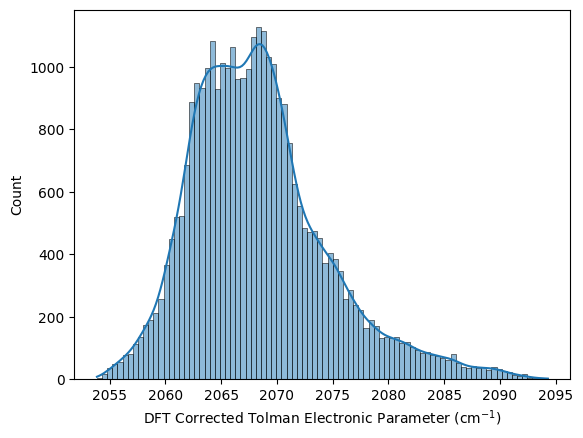

Mean ± std. dev. = 2068.38747656903 ± 6.126423553141743
Number of structures: 31666


In [ ]:
print(len(updated_df))
y_pred = updated_df["TEP"]
sns.histplot(data = y_pred, kde = True)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.show()

print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

## Bias DB to include high TEP Phosphines

In [ ]:
from rdkit import Chem

new_phosphines_df = pd.read_csv("limited_subs.csv")

In [ ]:
new_phosphines_df["value"] = new_phosphines_df.apply(findParameters,axis=1)
len(new_phosphines_df) #206

206

In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = new_phosphines_df['value'].apply(pd.Series)
updated_df = pd.concat([new_phosphines_df[["SMILES","Subs"]],split],axis=1).dropna()
updated_df["TEP"] = updated_df.apply(findTEP,axis=1)

In [ ]:
TEP_CUTOFF = 2070
limited_df = updated_df.loc[updated_df["TEP"]>TEP_CUTOFF]
limited_df.sort_values("TEP", ascending=False)
subs_list = limited_df["Subs"].tolist()
len(subs_list) #68 now? We can change

78

In [ ]:
biased_phosphines = list()
for i in range(0, len(subs_list)-2):
  for j in range(i+1, len(subs_list)-1):
    for k in range(j+1, len(subs_list)):
      smi = 'P([R3])([R2])[R1]'
      smi = smi.replace('[R1]', subs_list[i])
      smi = smi.replace('[R2]', subs_list[j])
      smi = smi.replace('[R3]', subs_list[k])
      biased_phosphines.append(smi)
len(biased_phosphines) #76076

76076

In [ ]:
biased_phosphines_df = pd.DataFrame({"SMILES":biased_phosphines})

In [ ]:
biased_phosphines_df["value"] = biased_phosphines_df.apply(findParameters,axis=1)

In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = biased_phosphines_df['value'].apply(pd.Series)
new_biased_phosphines_df = pd.concat([biased_phosphines_df["SMILES"],split],axis=1).dropna()
new_biased_phosphines_df["TEP"] = new_biased_phosphines_df.apply(findTEP,axis=1)

In [ ]:
len(new_biased_phosphines_df)

76076

In [ ]:
new_biased_phosphines_df.to_csv("biased_phosphine_db.csv")

##Compare Distributions of Biased vs Non-biased

In [ ]:
unbiased_df = pd.read_csv("removed_dups_db_TEP.csv")
y_pred_1 = unbiased_df["TEP"].tolist()

50116


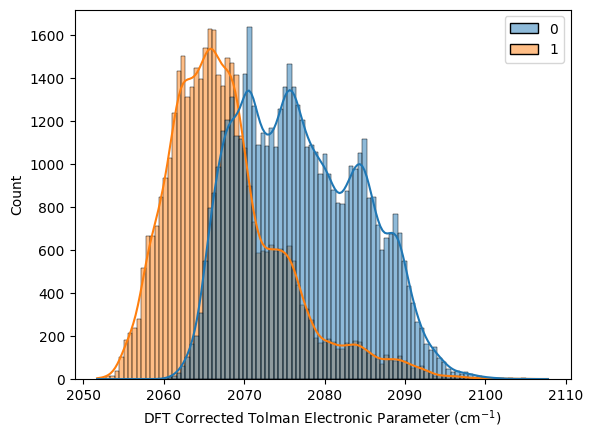

Mean ± std. dev. = 2077.0878887200956 ± 7.555011327918365
Number of structures: 50116


In [ ]:
print(len(new_biased_phosphines_df))
y_pred = new_biased_phosphines_df["TEP"].tolist()
colors = ['b','g']
sns.histplot(data = [y_pred,y_pred_1], kde = True, color=colors)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.show()

print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

<Axes: xlabel='TEP Prediction', ylabel='Count'>

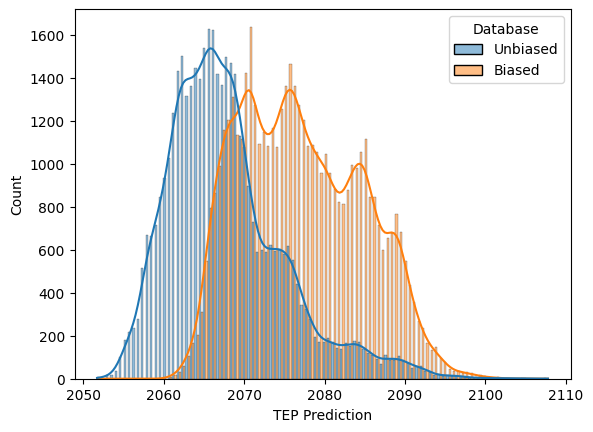

In [ ]:
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'TEP Prediction': y_pred_1, 'Database': 'Unbiased'}),
    pd.DataFrame.from_dict({'TEP Prediction': y_pred, 'Database': 'Biased'})
])
fig, ax = plt.subplots()

sns.histplot(
    data=df, x='TEP Prediction', hue='Database', multiple='dodge', ax=ax, kde = True
)

## Original ReaLigands Phosphines

In [ ]:
df = pd.read_csv("full_p_ligands_reaLigands.csv")
print(len(df))
df["value"] = df.apply(findParameters,axis=1)
print(len(df.dropna()))

1134


[17:33:01] Explicit valence for atom # 9 B, 4, is greater than permitted


[P]([Si](C)(C)C)([Si](C)(C)C)([BH2]P)[BH2][N+](C)(C)C


[17:33:03] Explicit valence for atom # 3 B, 4, is greater than permitted


ClP(Cl)[BH2][N+](C)(C)C


[17:33:03] Explicit valence for atom # 19 B, 4, is greater than permitted
[17:33:03] Explicit valence for atom # 2 B, 4, is greater than permitted


P(c1ccccc1OC)(c1c(OC)cccc1)c1c([B](F)(F)F)cccc1
P(C[B@H]1[C@H]2CCC[C@@H]1CCC2)(C)C


[17:33:04] Explicit valence for atom # 6 B, 4, is greater than permitted


P12[C]3N4C=CN3[B@]3(N5[C]1N(C=C5)[B@@]1(N5[C]2N(C=C5)[B@@]24[C@@H](CC[C@H]2C)C)[C@@H](CC[C@H]1C)C)[C@@H](CC[C@H]3C)C


[17:33:07] Explicit valence for atom # 2 B, 4, is greater than permitted


[P]([C@H]([B@H]1[B@@H]2[B@H]1[C@@H]2[BH])[BH])c1ccccc1


[17:33:09] Explicit valence for atom # 8 B, 4, is greater than permitted


P(c1ccccc1)(C)[BH3]


[17:33:09] Explicit valence for atom # 4 B, 4, is greater than permitted


P(C[C@@]12[C@H]3[B@H]4[B@H]5[B@@H]1[B@H]1[B@@H]2[B@H](B[B@H]1B5)[B@@H]34)(C[C@@]12[C@H]3[B@H]4[B@H]5[B@@H]1[B@H]1[B@@H]2[B@H](B[B@H]1B5)[B@@H]34)C[C@@]12[C@H]3[B@H]4[B@@H](B1)[B@H]1[B@@H]([B@@H]2BB[B@@H]34)B1


[17:33:11] Explicit valence for atom # 13 B, 4, is greater than permitted
[17:33:11] Explicit valence for atom # 13 B, 4, is greater than permitted


P(c1ccccc1)(c1ccccc1)[BH3]
P([C]1SC=C(N1c1ccccc1)O[B](F)(F)F)(c1ccccc1)c1ccccc1


[17:33:11] Explicit valence for atom # 1 B, 4, is greater than permitted


P[BH2][N+](C)(C)C


[17:33:11] Explicit valence for atom # 5 B, 4, is greater than permitted
[17:33:11] Explicit valence for atom # 0 B, 4, is greater than permitted


P(C(C)(C)C)[BH2][N+](C)(C)C
[B@@H]1([B@@H]2[B@H]1[C@@H]2[BH])[B@@H](BB[BH3])[P]c1ccccc1


[17:33:13] Explicit valence for atom # 1 B, 4, is greater than permitted


P[BH2][PH2][BH2][N+](C)(C)C


[17:33:13] Explicit valence for atom # 1 B, 4, is greater than permitted
[17:33:13] Explicit valence for atom # 7 B, 4, is greater than permitted


P([BH3])(N(CC)CC)N(CC)CC
P(c1c(cccc1)[B](F)(F)F)(C(C)C)C(C)C


[17:33:13] Explicit valence for atom # 2 B, 4, is greater than permitted


[P]([C@@H]([B@@H]1[B@H]2[B@@H]1[C@H]2[BH])BB[BH3])c1ccccc1


[17:33:14] Explicit valence for atom # 13 B, 4, is greater than permitted
[17:33:14] Explicit valence for atom # 1 B, 4, is greater than permitted


P(c1ccccc1)(c1ccccc1)[BH2][N+](C)(C)C
[P]([BH3])(CP(c1ccccc1)c1ccccc1)(c1ccccc1)c1ccccc1


[17:33:15] Explicit valence for atom # 6 B, 4, is greater than permitted


P12[C]3N4C=CN3[B](N3[C]1N(C=C3)[B](N1[C]2N(C=C1)[B]4(CC)CC)(CC)CC)(CC)CC


[17:33:16] Explicit valence for atom # 1 B, 4, is greater than permitted


[AsH2][BH2]P


[17:33:16] Explicit valence for atom # 13 B, 4, is greater than permitted


P(c1ccccc1)(c1ccccc1)[B]1=CC=CC=C1


[17:33:17] Explicit valence for atom # 13 B, 4, is greater than permitted


P12[N@@]3CC[N@@]1CC[N@@H+](CC[N@]2CC3)[BH3]


[17:33:17] Explicit valence for atom # 8 B, 4, is greater than permitted


[P]1N2[N@@]([C](C)C=C2C)[B@@H]([N@@]2N1C(=C[C]2C)C)n1nc(cc1C)C


[17:33:17] Explicit valence for atom # 7 B, 4, is greater than permitted
[17:33:18] Explicit valence for atom # 9 B, 4, is greater than permitted


P(c1c(cccc1)[B](F)(F)F)(c1ccccc1)c1ccccc1
[As@]([Si](C)(C)C)([Si](C)(C)C)([BH2][N+](C)(C)C)[BH2]P


[17:33:18] Explicit valence for atom # 13 B, 4, is greater than permitted
[17:33:18] Explicit valence for atom # 3 B, 4, is greater than permitted


Clc1n2c(cc1)[C](c1n(c(Cl)cc1)[B]2(F)F)c1ccc(cc1)C(=O)NCCP(c1ccccc1)c1ccccc1
P(Br)(Br)[BH2][N+](C)(C)C


[17:33:19] Explicit valence for atom # 0 B, 4, is greater than permitted
[17:33:19] Explicit valence for atom # 1 B, 4, is greater than permitted


[BH2]([N+](CC)(CC)CC)Pc1ccccc1
[S]([BH2]P)(C)C
1104


In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = df['value'].apply(pd.Series)
only_real_phosphines_df = pd.concat([df["SMILES"],split],axis=1).dropna()
only_real_phosphines_df["TEP"] = only_real_phosphines_df.apply(findTEP,axis=1)

In [ ]:
only_real_phosphines_df

SMILES  EState_VSA9  \
0               P(c1c(OC)cc(OC)cc1OC)(c1ccccc1)c1ccccc1    42.996519   
1     c1(ccccc1)P1C=C(C)[C@@]2(C)C(=C(C(=O)[C@@H]12)...    28.785930   
2                ClP(c1sc(=S)n(c1)C)C(c1ccccc1)c1ccccc1    42.649316   
3     p1(nc(N(C)C)c(n1)c1ccccc1)C([Si](C)(C)C)[Si](C...    39.751998   
4                              P1(P(P1C(C)C)C(C)C)C(C)C    28.785930   
...                                                 ...          ...   
1129                             P(O)(C(F)(F)F)C(F)(F)F     1.431200   
1130              Pc1c(cc(cc1C(C)(C)C)C(C)(C)C)C(C)(C)C    42.309107   
1131                                        S(CCP(C)C)C    17.819861   
1132                  P1(C([C@H](C1(C)C)C)(C)C)c1ccccc1    28.785930   
1133                       P(C)(c1c(cccc1)C)c1c(cccc1)C    23.302895   

      BCUT2D_CHGLO  VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  \
0        -2.379372   183.715018  1.691453e+09  2.130286e+00     7.921588   
1        -2.557461   197.647561  5.480918e+10  2.350918e+00     7.921588   
2        -2.421042   122.446376  5.070933e+07  2.880028e+00    42.069762   
3        -2.777819   256.708758  8.979715e+09  5.457159e-17     7.850804   
4        -2.536398   163.167318  1.837030e+06 -3.613526e-16    20.663188   
...            ...          ...           ...           ...          ...   
1129     -2.195185    73.240998  9.986017e+01  3.829661e+00     8.148523   
1130     -2.684258   254.597790  1.092980e+09 -1.383018e-16     9.129991   
1131     -2.584726    93.934893  3.378172e+03 -1.752991e-16    19.683473   
1132     -2.917625   169.858558  6.581383e+06 -1.174872e-16     7.921588   
1133     -2.433169   134.822043  3.683257e+06  4.038761e-16     7.921588   

      EState_VSA1  VSA_EState3  VSA_EState10  ...  EState_VSA10  \
0      134.706625    -2.796842      0.000000  ...      0.000000   
1      168.038851    -0.995419      0.000000  ...      2.741517   
2       97.609138     0.000000     12.370542  ...      1.370759   
3      133.870040     0.000000      0.000000  ...      1.370759   
4       78.679679     0.000000      0.000000  ...      0.000000   
...           ...          ...           ...  ...           ...   
1129    19.983297     0.000000      0.000000  ...     26.342490   
1130   121.121723    -2.054606      0.000000  ...      0.000000   
1131    50.872328     0.000000     -0.398935  ...      0.000000   
1132    93.903798    -9.155492      0.000000  ...      0.000000   
1133    98.293685    -1.821240      0.000000  ...      0.000000   

      BCUT2D_LOGPHI  VSA_EState8  BCUT2D_CHGHI     MolMR  MaxPartialCharge  \
0      1.956371e-16     0.000000  5.258410e-17  104.8040          0.134107   
1      2.278751e-01    -7.866586  2.077836e-01  123.3530          0.172464   
2      5.726411e-01    -2.908605  3.321124e-01  101.2580          0.160924   
3     -3.504410e-16   -35.810616 -1.074836e-16  110.2320          0.160154   
4     -9.523391e-17   -32.731824 -3.504497e-16   65.7210          0.039447   
...             ...          ...           ...       ...               ...   
1129   1.864888e+00     0.000000  1.892701e+00   21.2488          0.438747   
1130  -3.810801e-16   -41.308274 -2.125648e-16   91.8860          0.062918   
1131  -6.276675e-17    -6.486637 -5.046562e-02   42.0170          0.038378   
1132  -3.838268e-16   -20.413918 -2.948451e-16   70.3180          0.062945   
1133  -1.163385e-16    -9.794187 -2.334717e-17   74.4700          0.062966   

        Kappa1  NumRotatableBonds  SlogP_VSA6          TEP  
0     5.019153                9.0   72.509024  2063.020352  
1     5.897479                5.0  102.002545  2064.586998  
2     5.822701                5.0   66.597082  2073.848718  
3     3.487313               13.0   30.212094  2057.873876  
4     1.589587                9.0    0.000000  2065.062190  
...        ...                ...         ...          ...  
1129  8.070301                1.0    0.000000  2100.585480  
1130  2.356838                1.0   12.08

In [ ]:
only_real_phosphines_df.to_csv("direct_from_realigands_phosphines.csv")

In [ ]:
only_real_phosphines_df = pd.read_csv("direct_from_realigands_phosphines.csv")

In [ ]:
only_real_phosphines_df.sort_values("TEP")

Unnamed: 0                                  SMILES  EState_VSA9  \
669          707  P([Si](C)(C)C)([Si](C)(C)C)[Si](C)(C)C    37.010481   
915          961           P(C1CCCCC1)(C(C)(C)C)C(C)(C)C    38.381240   
785          826           P(C(C)(C)C)(C(C)(C)C)C(C)(C)C    37.010481   
967         1016                 P(CC(C)C)(CC(C)C)CC(C)C    37.010481   
323          339        P(CN1CCOCC1)(CN1CCOCC1)CN1CCOCC1    41.122757   
...          ...                                     ...          ...   
196          204                  P(O)(O)C(F)(F)C(F)(F)F     2.862399   
307          321                     P(C(F)(F)F)C(F)(F)F     1.278555   
494          519               [P](=O)(O)C(F)(F)C(F)(F)F     1.431200   
1073        1129                  P(O)(C(F)(F)F)C(F)(F)F     1.431200   
26            27                                P(F)(F)F     0.000000   

      BCUT2D_CHGLO  VSA_EState1           Ipc   BCUT2D_MRHI  SlogP_VSA12  \
669      -2.821233   218.685417  9.192425e+06 -4.773724e-16     6.565362   
915      -2.870110   238.111389  7.874259e+07 -3.897547e-16     7.921588   
785      -2.839127   215.818750  9.192425e+06 -3.557825e-16     7.921588   
967      -2.764561   211.772281  1.223915e+07 -5.853679e-16     7.921588   
323      -2.791226   262.360551  4.195661e+09 -1.167451e-16     7.921588   
...            ...          ...           ...           ...          ...   
196      -2.244244    69.808884  2.239924e+02  2.933125e+00     8.375458   
307      -2.176353    72.088349  6.357981e+01  3.829661e+00     8.525790   
494      -2.155899    72.191929  1.338647e+02  4.378740e+00     8.027936   
1073     -2.195185    73.240998  9.986017e+01  3.829661e+00     8.148523   
26       -1.605262    29.194444  3.245112e+00  7.397163e+00     8.853712   

      EState_VSA1  VSA_EState3  ...  EState_VSA10  BCUT2D_LOGPHI  VSA_EState8  \
669     88.065728     0.000000  ...      0.000000  -6.437572e-16   -46.984954   
915     96.844769   -10.420243  ...      1.370759  -5.158769e-16   -29.260076   
785     85.056854   -15.468056  ...      0.000000  -4.962162e-16   -43.417824   
967     85.056854     0.000000  ...      0.000000  -4.347602e-16   -26.477395   
323    119.670231     0.000000  ...      0.000000  -6.702249e-16   -52.159991   
...           ...          ...  ...           ...            ...          ...   
196     20.215374     0.000000  ...     21.952075   1.257825e+00     0.000000   
307     20.360563     0.000000  ...     26.342490   1.864888e+00     0.000000   
494     19.867853     0.000000  ...     26.517124   1.830379e+00     0.000000   
1073    19.983297     0.000000  ...     26.342490   1.864888e+00     0.000000   
26       8.853712     0.000000  ...     12.590717   2.387604e+00     0.000000   

      BCUT2D_CHGHI    MolMR  MaxPartialCharge    Kappa1  NumRotatableBonds  \
669  -3.622957e-16  76.9580          0.063986  1.499726               12.0   
915  -5.216311e-16  73.2990          0.035218  1.627594                1.0   
785  -4.707413e-16  66.1790          0.023944  1.334642                0.0   
967  -4.115768e-02  66.0350          0.031822  1.334642               12.0   
323  -2.269857e-02  88.6970          0.059376  3.392977                6.0   
...            ...      ...               ...       ...                ...   
196   1.086086e+00  22.3596          0.462233  6.694215                3.0   
307   1.875172e+00  20.4250          0.410684  7.120988                0.0   
494   1.670212e+00  20.8273          0.466787  7.812987                2.0   
1073  1.892701e+00  21.2488          0.438747  8.070301                1.0   
26    1.911542e+00  10.2440          0.456420  4.220000                0.0   

      SlogP_VSA6          TEP  
669          0.0  2053.062794  
915          0.0  2054.205132  
785          0.0  2054.680863  
967          0.0  2054.872189  
323          0.0  2055.912269  
...          ...          ...  
196          0.0  2096.940224  
307          0.0  2099.550065  
494          0.0  

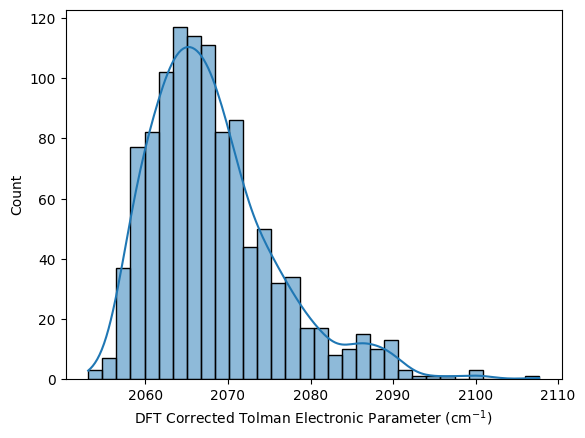

Mean ± std. dev. = 2068.116930032497 ± 7.705046277931219
Number of structures: 1078


In [ ]:
y_pred = only_real_phosphines_df["TEP"].tolist()
sns.histplot(data = y_pred, kde = True)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.show()

print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

## Combine all DBs into one

In [ ]:
unbiased_mono = pd.read_csv("removed_dups_db_TEP.csv")
biased_mono = pd.read_csv("biased_phosphine_db.csv")
unbiased_bidentate = pd.read_csv("bidentate_with_tep.csv")
realigands_phosphines = pd.read_csv("direct_from_realigands_phosphines.csv")

In [ ]:
unbiased_mono =unbiased_mono.drop(["Unnamed: 0"],axis=1)
unbiased_mono["Original_DF"] = "Unbiased"

biased_mono =biased_mono.drop(["Unnamed: 0"],axis=1)
biased_mono["Original_DF"] = "Biased"

unbiased_bidentate =unbiased_bidentate.drop(["Unnamed: 0"],axis=1)
unbiased_bidentate["Original_DF"] = "Bidentate"

realigands_phosphines =realigands_phosphines.drop(["Unnamed: 0"],axis=1)
realigands_phosphines["Original_DF"] = "ReaLigands"

In [ ]:
fullDf= pd.concat([unbiased_mono, biased_mono, unbiased_bidentate, realigands_phosphines])

In [ ]:
fullDf["Original_DF"].value_counts()

Biased        76076
Unbiased      42025
Bidentate     31666
ReaLigands     1078
Name: Original_DF, dtype: int64

In [ ]:
fullDf.to_csv("full_db.csv")

In [ ]:
fullDf = pd.read_csv("full_db.csv")

Mean ± std. dev. = 2072.2277353623817 ± 8.084382389866414
Number of structures: 150845


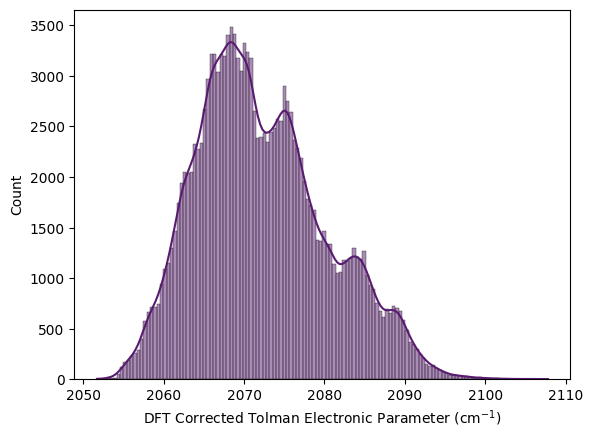

In [ ]:
fig, ax = plt.subplots()
y_pred = fullDf["TEP"]
sns.histplot(
    data=fullDf, x='TEP', ax=ax, kde = True, color='#591B70'
)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.savefig("combined_db_graph.png",dpi=500)


print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

Mean ± std. dev. = 2072.2277353623817 ± 8.084382389866414
Number of structures: 150845


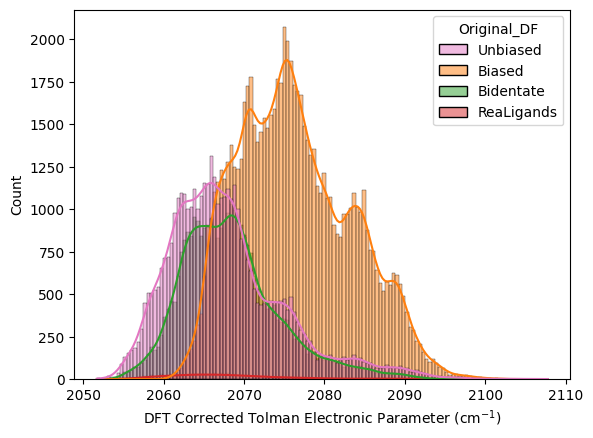

In [ ]:
fig, ax = plt.subplots()
y_pred = fullDf["TEP"]
sns.histplot(
    data=fullDf, x='TEP', hue="Original_DF", ax=ax, kde = True, palette=["C6", "C1", "C2","C3"]
)
plt.xlabel('DFT Corrected Tolman Electronic Parameter (cm$^{-1}$)')
plt.savefig("combined_db_by_color_graph.png",dpi=500)


print(f"Mean ± std. dev. = {np.mean(y_pred)} ± {np.std(y_pred)}")
print(f"Number of structures: {len(y_pred)}")

In [ ]:
font = {'family' : 'Sans Serif',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

## PCA, UMAP on DFT Data to train the model

In [ ]:
justin_dft = pd.read_csv("justin_dft_smiles_names.csv")

In [ ]:
justin_dft["SMILES"] =justin_dft["SMILES"].str.replace("@","")

In [ ]:
justin_dft["Can_Smiles"] = justin_dft.apply(makeCanonical,axis=1)
limited_df = justin_dft.dropna().drop_duplicates("Can_Smiles")


[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not removing hydrogen atom without neighbors
[00:17:16] WARNING: not r

In [ ]:
limited_df["value"] = limited_df.apply(findParameters,axis=1)

[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:36] WARNING: not removing hydrogen atom without neighbors
[00:18:37] WARNING: not removing hydrogen atom without neighbors
[00:18:37] WARNING: not removing hydrogen atom without neighbors
[00:18:37] WARNING: not removing hydrogen atom without neighbors
[00:18:37] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not removing hydrogen atom without neighbors
[00:18:38] WARNING: not r

In [ ]:
split = pd.DataFrame()
split[listOfRdKITDescriptors] = limited_df['value'].apply(pd.Series)
justin_df_with_tep = pd.concat([limited_df["SMILES"],split],axis=1).dropna()
justin_df_with_tep["TEP"] = justin_df_with_tep.apply(findTEP,axis=1)

In [ ]:
justin_df_with_tep.to_csv("justin_dft_with_tep.csv")

In [ ]:
from sklearn.decomposition import PCA

data = justin_df_with_tep.dropna().drop(["SMILES","TEP"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
pca.fit(scaled_df_data)

principalComponents = pca.fit_transform(scaled_df_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, justin_df_with_tep.dropna().reset_index()[['TEP']]], axis = 1)

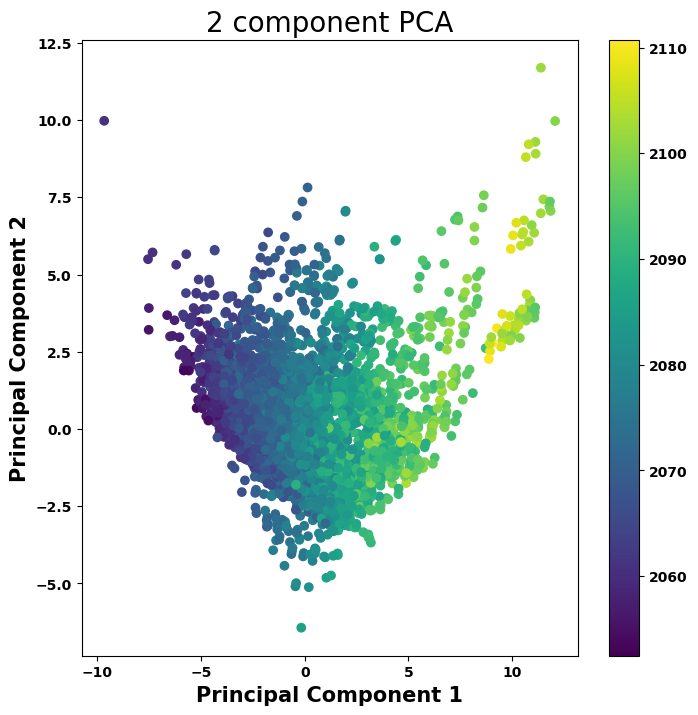

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


im = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'],c=finalDf['TEP'] )

fig.colorbar(im)
plt.savefig("PCA_justin_data.png",dpi=500)

[0.34543447 0.53074536]


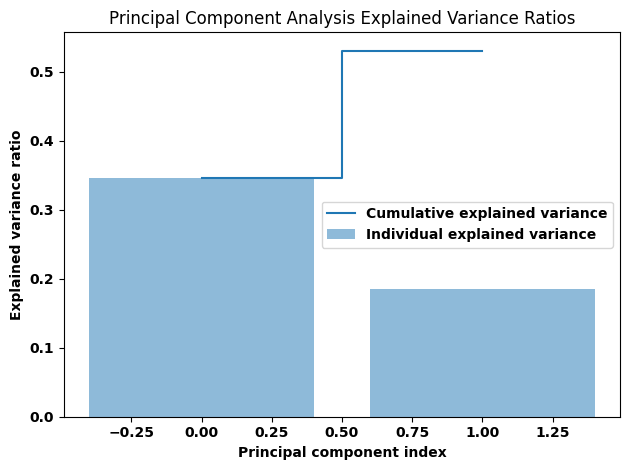

In [ ]:
import matplotlib.pyplot as plt

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print(cum_sum_eigenvalues)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Principal Component Analysis Explained Variance Ratios")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
import umap
reducer = umap.UMAP(random_state=42)


data = justin_df_with_tep.dropna().drop(["SMILES"],axis=1)

scaled_df_data = StandardScaler().fit_transform(data)

embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(5204, 2)

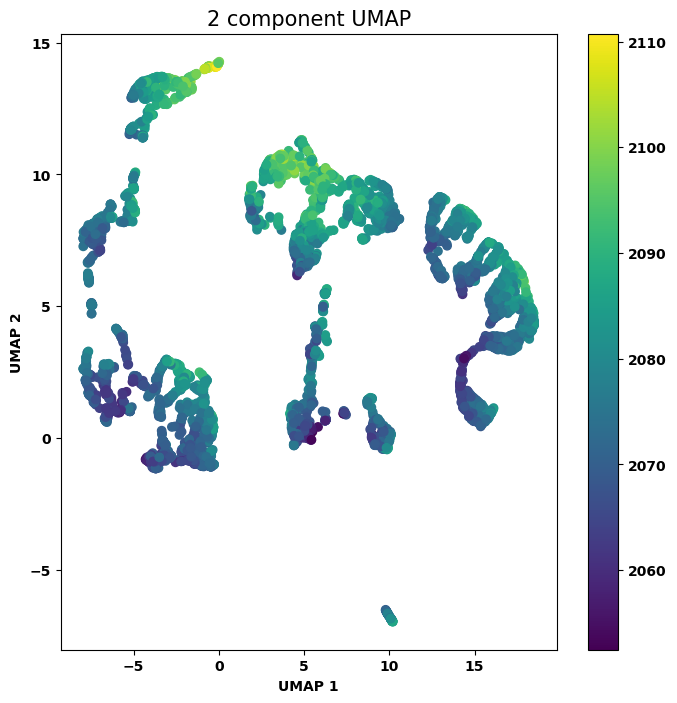

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('UMAP 1', fontsize = 10)
ax.set_ylabel('UMAP 2', fontsize = 10)
ax.set_title('2 component UMAP', fontsize = 15)


im = ax.scatter(embedding[:, 0], embedding[:, 1],
                c=finalDf['TEP'])

fig.colorbar(im)

plt.savefig("UMAP_justin_data.png",dpi=500)